In [1]:
import pandas as pd

In [2]:
import tqdm

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
def short2phi(x):
    i2p = np.pi / 2**16;
    return float(x) * i2p;
def phi2short(x):
    p2i = 2**16 / np.pi;
    return round(x*p2i)

In [130]:
doubs = [
          0, 1, 0, 4, 0, 16, ##BPIX1 (3)
     1, 2, 1, 4, 1, 16, ##BPIX2 (6)
     2, 3, 2, 4, 2, 16, ##BPIX3 & Forward (9)

     4 ,5 ,5 ,6 ,6 ,7 ,7 ,8 ,8 ,9 ,9 ,10,10,11, ##POS (16)
     16,17,17,18,18,19,19,20,20,21,21,22,22,23, ##NEG (23)

     0, 2, 0, 5, 0, 17, 0, 6, 0, 18,## BPIX1 Jump (28)
     1, 3, 1, 5, 1, 17, 1, 6, 1, 18,## BPIX2 Jump (33)

     11,12,12,13,13,14,14,15, ##Late POS (37)
     23,24,24,25,25,26,26,27, ##Late NEG (41)

     4, 6, 5, 7, 6, 8, 7, 9, 8, 10,9 ,11,10,12, ##POS Jump (48)
     16,18,17,19,18,20,19,21,20,22,21,23,22,24, ##NEG Jump (55)*/
    ]

In [323]:
data_tuples_trips.to_csv("tuples_phase2_trips",sep=";")
data_tuples.to_csv("tuples_phase2",sep=";")

In [325]:
!head tuples_phase2_trips

;Size;UsedHits;Hits;Dummy
0;41722;157360;187008;187009
1;43242;159093;184280;184281
2;32022;120863;169861;169862
3;53892;196227;202134;202135
4;39903;150229;191284;191285
5;24489;93471;144880;144881
6;31475;121677;162650;162651
7;30393;115060;164929;164930
8;38175;144586;180909;180910


In [402]:
!mkdir stats

Text(0.5, 1.0, '<Hits> per track')

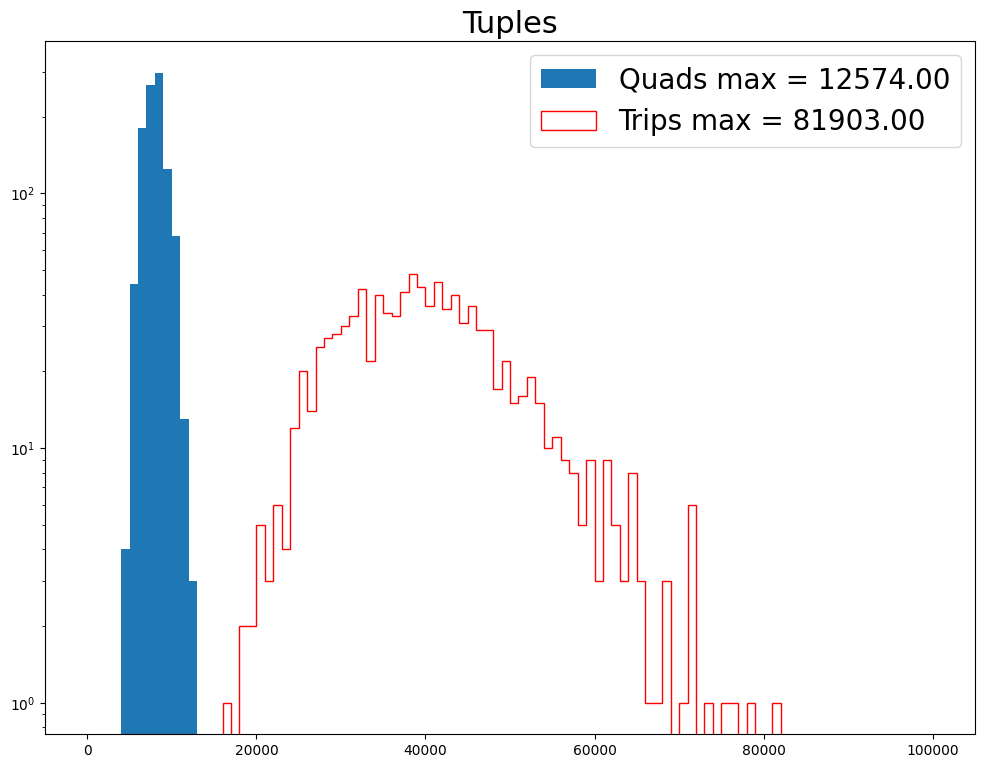

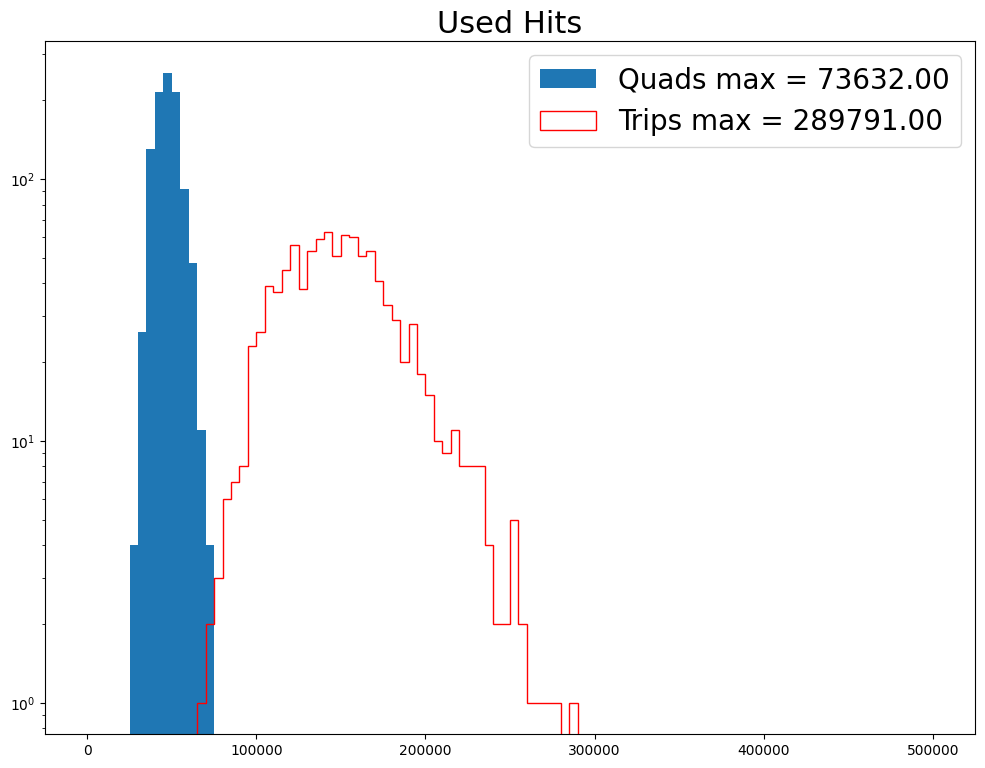

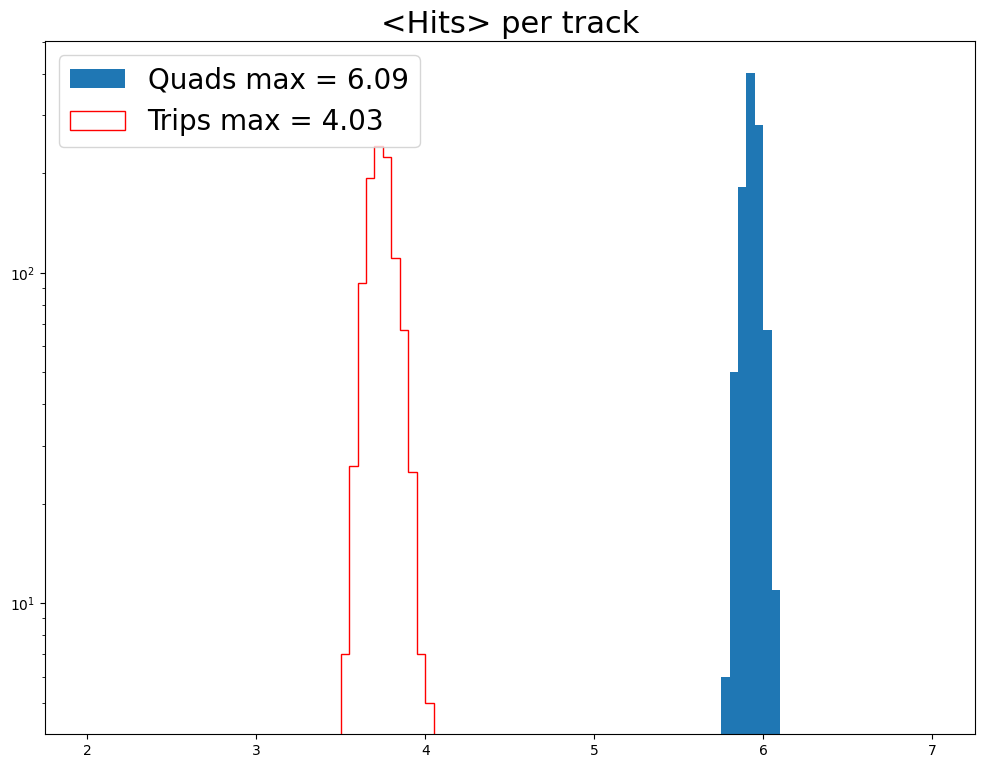

In [327]:
data_tuples = pd.read_csv("tuples_phase2", sep=";",error_bad_lines=False)
data_tuples_trips = pd.read_csv("tuples_phase2_trips", sep=";",error_bad_lines=False)

data = data_tuples
plt.hist(data["Size"].values,bins=100,log=True,range=(0,1e5),label="Quads max = %.2f"%data["Size"].max());
data = data_tuples_trips
plt.hist(data["Size"].values,bins=100,log=True,range=(0,1e5),histtype="step", color="red", label="Trips max = %.2f"%data["Size"].max());
plt.legend(fontsize=20)
plt.title("Tuples",fontsize=22)

plt.figure()
data = data_tuples
plt.hist(data["UsedHits"].values,bins=100,log=True,range=(0,5e5),label="Quads max = %.2f"%data["UsedHits"].max());
data = data_tuples_trips
plt.hist(data["UsedHits"].values,bins=100,log=True,range=(0,5e5),histtype="step", color="red", label="Trips max = %.2f"%data["UsedHits"].max());
plt.legend(fontsize=20)
plt.title("Used Hits",fontsize=22)

plt.figure()
data = data_tuples
plt.hist(data["UsedHits"].values/data["Size"].values,bins=100,log=True,range=(2,7),label="Quads max = %.2f"%(data["UsedHits"]/data["Size"].values).max());
data = data_tuples_trips
plt.hist(data["UsedHits"].values/data["Size"].values,bins=100,histtype="step", color="red", log=True,range=(2,7),label="Trips max = %.2f"%(data["UsedHits"]/data["Size"].values).max());
plt.legend(fontsize=20)
plt.title("<Hits> per track",fontsize=22)

In [403]:
data_tuples.to_csv("stats/data_tuples_quads.csv")
data_tuples_trips.to_csv("stats/data_tuples_trips.csv")

Text(0.5, 1.0, 'Cells')

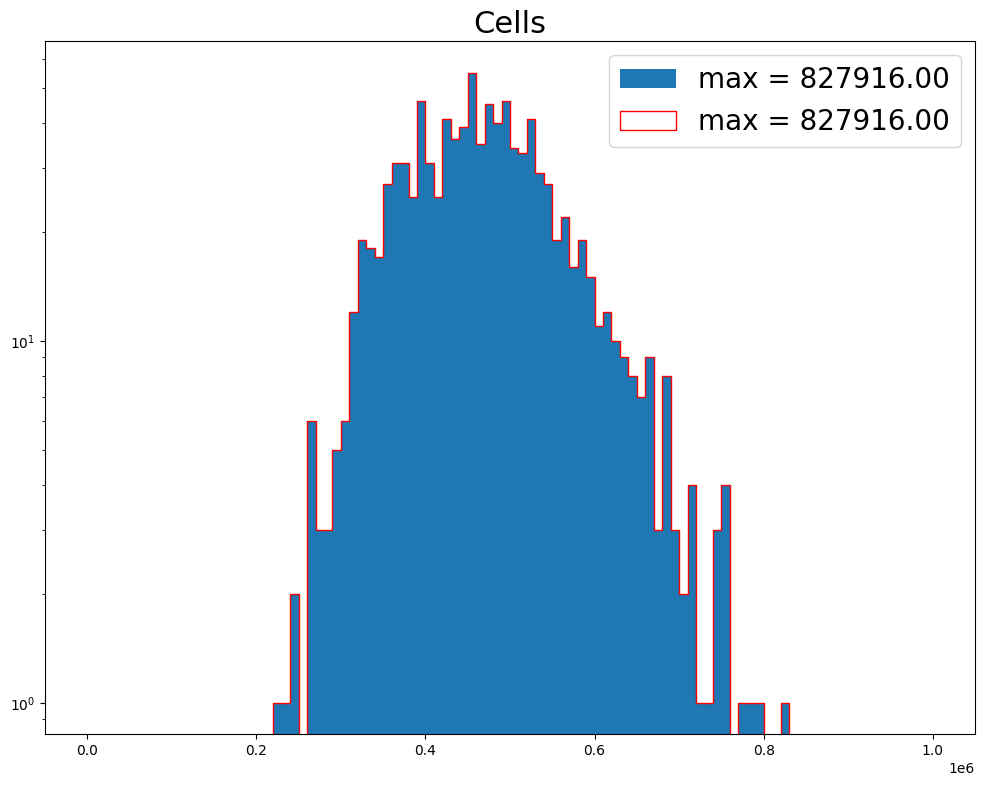

In [187]:
data_cells = pd.read_csv("cells_phase2",names = ["Size",""],error_bad_lines=False)
data_cells_trips = pd.read_csv("cells_phase2_triplets",names = ["Size",""],error_bad_lines=False)


data = data_cells
plt.hist(data["Size"].values,bins=100,log=True,range=(0,1e6),label="max = %.2f"%data["Size"].max());
data = data_cells_trips
plt.hist(data["Size"].values,bins=100,log=True,range=(0,1e6),label="max = %.2f"%data["Size"].max(),histtype="step",color="red");

plt.legend(fontsize=20)
plt.title("Cells",fontsize=22)

In [404]:
data_cells.to_csv("stats/data_cells_quads.csv")
data_cells_trips.to_csv("stats/data_cells_trips.csv")

## Det Id Map

In [369]:
det_id_map = pd.read_csv("det_ids_map_Phase2",sep=";",names = ["dummy","module_id","detid"])
det_id_map = det_id_map.drop("dummy",axis=1)

In [405]:
det_id_map.to_csv("stats/det_id_map.csv")

In [370]:
layerStarts =[0,
                                                       108,
                                                       324,
                                                       504,  
                                                       756,
                                                       864,
                                                       972,
                                                       1080,
                                                       1188,
                                                       1296,
                                                       1404,
                                                       1512,
                                                       1620,
                                                       1796,
                                                       1972,
                                                       2148, 
                                                       2324,
                                                       2432,
                                                       2540,
                                                       2648,
                                                       2756,
                                                       2864,
                                                       2972,
                                                       3080,
                                                       3188,
                                                       3364,
                                                       3540,
                                                       3716]

In [371]:
det_id_map["layer"] = 0
for i,L in enumerate(layerStarts):
    det_id_map.loc[(det_id_map["module_id"] >= L),"layer"] = i

In [372]:
det_id_map

,module_id,detid,layer
0,0,303042564,0
1,1,303042568,0
2,2,303042572,0
3,3,303042576,0
4,4,303042580,0
...,...,...,...
3887,3887,347100336,27
3888,3888,347100340,27
3889,3889,347100344,27
3890,3890,347100348,27


## Track doublets

In [398]:
hitcols = ["x","y","z","phi","r","key","pdg","sizeY","sizeX","moduleId"]
pixel_doublets_columns = ["dummy"] + [ f + "One" for f in hitcols]
pixel_doublets_columns = pixel_doublets_columns + [ f + "Two" for f in hitcols] + ["layerOne","layerTwo","matched","pt","matchedHits","nHits","isTriplet"]

In [399]:
pixeltrack_doublets = pd.read_csv("phase2_triplets",sep=";", names=pixel_doublets_columns,error_bad_lines=False)
pixeltrack_doublets = pixeltrack_doublets.drop(["dummy"],axis=1)

In [400]:
pixeltrack_doublets.head()

,xOne,yOne,zOne,phiOne,rOne,keyOne,pdgOne,sizeYOne,sizeXOne,moduleIdOne,...,sizeYTwo,sizeXTwo,moduleIdTwo,layerOne,layerTwo,matched,pt,matchedHits,nHits,isTriplet
0,2.64760,0.760105,-3.86388,2916,2.75455,140929,-211,2047,2047,303042576,...,2047,2047,304095244,-1,-2,1,1.67946,3,4,NaN
1,5.67305,1.704770,-6.90723,3045,5.92366,140929,-211,2047,2047,304095244,...,-2047,2047,305139724,-1,-2,1,1.67946,3,4,NaN
2,9.84563,3.118800,-11.13710,3199,10.32780,140929,-211,-2047,2047,305139724,...,2047,2047,306192392,-1,-2,1,1.67946,3,4,NaN
3,2.65091,0.745473,-1.21598,2859,2.75373,147618,-211,2047,2047,303042580,...,2047,2047,304095248,-1,-2,0,-1.00000,0,4,NaN
4,5.66747,1.718690,-5.18039,3071,5.92234,144083,-211,2047,2047,304095248,...,-2047,2047,305143816,-1,-2,0,-1.00000,0,4,NaN


In [376]:
matched = (pixeltrack_doublets["pt"] > 0)
#

In [378]:
#good = pixeltrack_doublets[matched]
#bad = pixeltrack_doublets[~matched].sample(n=(good.shape[0]))#/len(pixeltrack_doublets)
#pixeltrack_doublets = pd.concat([good,bad]).sample(frac=1.0)

In [379]:
pixeltrack_doublets["layerOne"] = 0
pixeltrack_doublets["layerTwo"] = 0
for i,L in tqdm.tqdm(enumerate(det_id_map.detid.values)):
    pixeltrack_doublets.loc[(pixeltrack_doublets["moduleIdOne"] == L),"layerOne"] = det_id_map["layer"].values[i]
    pixeltrack_doublets.loc[(pixeltrack_doublets["moduleIdTwo"] == L),"layerTwo"] = det_id_map["layer"].values[i]

3892it [00:58, 66.60it/s]


In [380]:
real_doublets = (pixeltrack_doublets["layerOne"]!= pixeltrack_doublets["layerTwo"]) #vegetarian cut

In [381]:
matched = (pixeltrack_doublets["pt"] > 0.3)
min_pt = (pixeltrack_doublets["pt"] > 0.5)

In [382]:
print("Number of doublets: %d"%len(pixeltrack_doublets))

Number of doublets: 1079542


In [383]:
layerPairs = pixeltrack_doublets[real_doublets][["layerOne","layerTwo"]].value_counts().keys().values
layerPairsMap = dict(zip(layerPairs,[((pixeltrack_doublets[real_doublets]["layerOne"]==L[0]) & (pixeltrack_doublets[real_doublets]["layerTwo"]==L[1])) for L in layerPairs] ))

In [387]:
pixeltrack_doublets["phiOneFloat"] = [short2phi(x) for x in pixeltrack_doublets["phiOne"].values]
pixeltrack_doublets["phiTwoFloat"] = [short2phi(x) for x in pixeltrack_doublets["phiTwo"].values]

In [388]:
pixeltrack_doublets["deltaPhiFloat"] = np.abs(pixeltrack_doublets["phiTwoFloat"]-pixeltrack_doublets["phiOneFloat"])

In [389]:
pixeltrack_doublets.loc[pixeltrack_doublets["deltaPhiFloat"] >= np.pi,"deltaPhiFloat"] =  2*np.pi - pixeltrack_doublets.loc[pixeltrack_doublets["deltaPhiFloat"] > np.pi,"deltaPhiFloat"]

In [390]:
pixeltrack_doublets["deltaPhi"] = [phi2short(f) for f in pixeltrack_doublets["deltaPhiFloat"]]

In [78]:
pixeltrack_doublets["dZ"] = pixeltrack_doublets["zTwo"] - pixeltrack_doublets["zOne"]
pixeltrack_doublets["dR"] = pixeltrack_doublets["rTwo"] - pixeltrack_doublets["rOne"]
pixeltrack_doublets["dC"] = np.abs(pixeltrack_doublets["sizeYTwo"] - pixeltrack_doublets["sizeYOne"])
pixeltrack_doublets["cCut"] = np.abs(pixeltrack_doublets["sizeYOne"] - round(np.abs((pixeltrack_doublets["dZ"]) / (pixeltrack_doublets["dR"])) * dzdrFact + 0.5))

In [384]:
pixeltrack_doublets.head(n=-1)

,xOne,yOne,zOne,phiOne,rOne,keyOne,pdgOne,sizeYOne,sizeXOne,moduleIdOne,...,pdgTwo,sizeYTwo,sizeXTwo,moduleIdTwo,layerOne,layerTwo,matched,pt,matchedHits,nHits
0,2.81796,0.005400,-6.94791,21,2.81797,1.0,-211.0,31,24,303042572,...,-211.0,32,19,304091144,0,1,1,1.57093,4,5
1,6.43215,0.102482,-14.15590,166,6.43297,1.0,-211.0,32,19,304091144,...,-211.0,16,8,344212484,1,16,1,1.57093,4,5
2,11.85810,0.440672,-24.96960,387,11.86630,1.0,-211.0,16,8,344212484,...,-211.0,8,16,344208388,16,16,1,1.57093,4,5
3,12.48210,0.493465,-26.21960,412,12.49190,1.0,-211.0,8,16,344208388,...,-211.0,8,8,344474628,16,17,1,1.57093,4,5
4,2.80900,0.045117,-10.89830,168,2.80936,144559.0,321.0,22,20,303042572,...,321.0,23,20,304091140,0,1,1,1.39849,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079536,1.66942,-2.194600,-13.44460,-9600,2.75740,155113.0,-211.0,80,14,303083528,...,211.0,16,24,344728688,0,18,0,-1.00000,0,4
1079537,5.35159,-7.515990,-40.34260,-9929,9.22657,157341.0,211.0,16,24,344728688,...,-211.0,8,13,344999020,18,19,0,-1.00000,0,4
1079538,6.89529,-9.988470,-52.28960,-10081,12.13730,154703.0,-211.0,8,13,344999020,...,211.0,8,8,345261164,19,20,0,-1.00000,0,4
1079539,1.68000,-2.185250,-10.41060,-9546,2.75640,156813.0,-211.0,63,8,303083532,...,-211.0,15,8,344732756,0,18,0,-1.00000,0,4


In [385]:
layerPairs

array([(0, 1), (1, 2), (2, 3), (17, 18), (5, 6), (16, 17), (4, 5),
       (18, 19), (6, 7), (19, 20), (7, 8), (20, 21), (8, 9), (21, 22),
       (9, 10), (22, 23), (10, 11), (0, 16), (0, 4), (1, 16), (1, 4),
       (2, 4), (2, 16), (0, 5), (0, 17), (1, 5), (1, 17), (0, 6), (0, 18),
       (1, 6), (1, 18), (0, 2)], dtype=object)

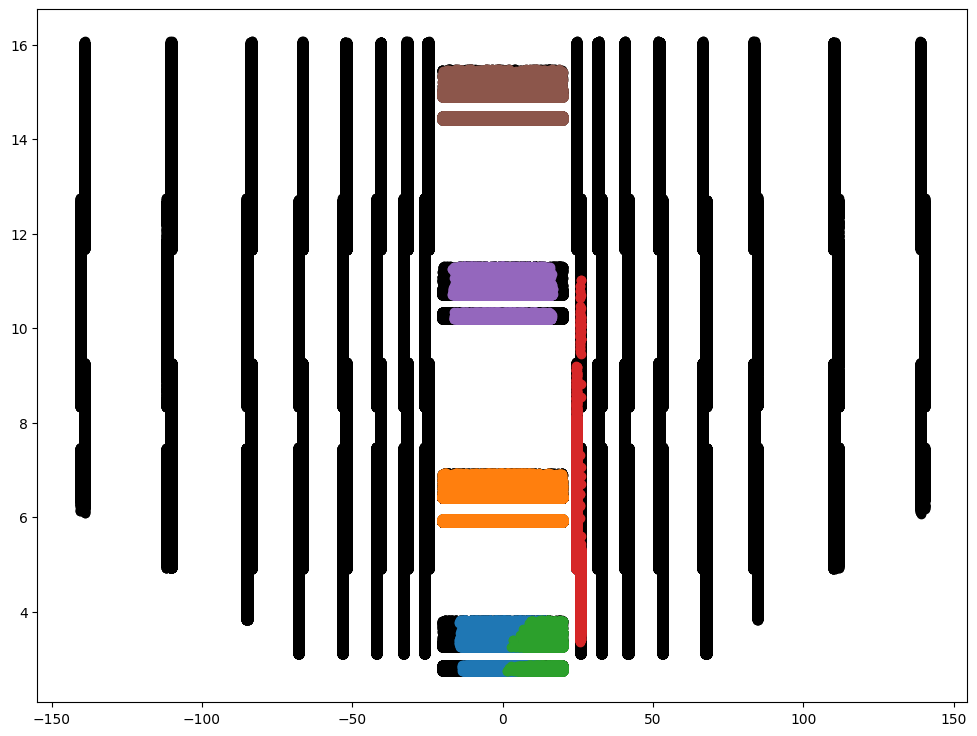

In [386]:
plt.plot(pixeltrack_doublets["zOne"],pixeltrack_doublets["rOne"],"o",color="black")
plt.plot(pixeltrack_doublets["zTwo"],pixeltrack_doublets["rTwo"],"o",color="black")
cut = layerPairsMap[(0,1)] & real_doublets
plt.plot(pixeltrack_doublets[cut]["zOne"],pixeltrack_doublets[cut]["rOne"],"o")
plt.plot(pixeltrack_doublets[cut]["zTwo"],pixeltrack_doublets[cut]["rTwo"],"o")
cut = matched & layerPairsMap[(0,4)] & real_doublets
plt.plot(pixeltrack_doublets[cut]["zOne"],pixeltrack_doublets[cut]["rOne"],"o")
plt.plot(pixeltrack_doublets[cut]["zTwo"],pixeltrack_doublets[cut]["rTwo"],"o")
cut = matched & layerPairsMap[(2,3)] & real_doublets
plt.plot(pixeltrack_doublets[cut]["zOne"],pixeltrack_doublets[cut]["rOne"],"o")
plt.plot(pixeltrack_doublets[cut]["zTwo"],pixeltrack_doublets[cut]["rTwo"],"o")

In [391]:
cuts = ["zOne"]#,"zTwo","rOne","rTwo"]
ZMin = []
for c in cuts: 
    print("\n%s - all"%c) 
    minZ = []
    for i in range(0,len(doubs)-1,2):
        L = (doubs[i],doubs[i+1])
        try:
            cut = layerPairsMap[L] & real_doublets
            zOneMin = pixeltrack_doublets[cut][c].min()
            #cut = matched & cut
            #zOneMaxMatched = pixeltrack_doublets[cut]["zOne"].max()
            ZMin.append(round(zOneMin-1.5))
            print("%.1f"%round(zOneMin-1.5),end=",")
        except:
            ZMin.append(-999)
            print("-999.",end=",")
    


zOne - all
-16.0,0.0,-22.0,-17.0,5.0,-22.0,-18.0,11.0,-22.0,23.0,30.0,39.0,50.0,65.0,82.0,109.0,-28.0,-35.0,-44.0,-55.0,-70.0,-87.0,-113.0,-8.0,1.0,-22.0,5.0,-22.0,-999.,9.0,-22.0,13.0,-22.0,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,

In [ ]:
for i in range(0,len(minZ)):
    L = (doubs[2*i],doubs[2*i+1])
    print("%s - %d"%(L,minZ[i]))

In [392]:
cuts = ["zOne"]#,"zTwo","rOne","rTwo"]
ZMax = []
for c in cuts: 
    print("\n%s - all"%c) 
    minZ = []
    for i in range(0,len(doubs)-1,2):
        L = (doubs[i],doubs[i+1])
        try:
            cut = layerPairsMap[L] & real_doublets
            zOneMin = pixeltrack_doublets[cut][c].max()
            #cut = matched & cut
            #zOneMaxMatched = pixeltrack_doublets[cut]["zOne"].max()
            ZMax.append(round(zOneMin+1.5))
            print("%.1f"%round(zOneMin+1.5),end=",")
        except:
            ZMax.append(-999)
            print("-999.",end=",")
    


zOne - all
17.0,22.0,0.0,17.0,22.0,-5.0,18.0,22.0,-11.0,28.0,35.0,44.0,55.0,70.0,87.0,113.0,-23.0,-30.0,-39.0,-50.0,-65.0,-82.0,-109.0,7.0,22.0,-2.0,22.0,-4.0,-999.,22.0,-9.0,22.0,-13.0,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,-999.,

In [188]:
#for i in range(0,len(MaxZ)):
#    L = (doubs[2*i],doubs[2*i+1])
#    print("%s - %d"%(L,MaxZ[i]))

In [150]:
print("\ndRMax - all") 
dRMin = []
for i in range(0,len(doubs)-1,2):
    L = (doubs[i],doubs[i+1])
    try:
        cut = layerPairsMap[L] & real_doublets
        zOneMin = np.max(pixeltrack_doublets[cut]["rTwo"] - pixeltrack_doublets[cut]["rOne"])
        
        dRMin.append(round(zOneMin+1.5))
        print("%.1f"%round(zOneMin+1.5),end=",")
    except:
        dRMin.append(-999)
        print("-999.",end=",") 


dRMax - all
5.0,5.0,5.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,5.0,6.0,5.0,-999.,5.0,5.0,5.0,5.0,-999.,8.0,8.0,8.0,8.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,9.0,9.0,9.0,8.0,8.0,8.0,11.0,9.0,9.0,9.0,8.0,8.0,8.0,11.0,
dRMin - matched


In [189]:
#for i in range(0,len(dRMin)):
#    L = (doubs[2*i],doubs[2*i+1])
#    print("%s - %d"%(L,dRMin[i]))

In [134]:
print("\ndZ - all") 
dRMin = []
for i in range(0,len(doubs)-1,2):
    L = (doubs[i],doubs[i+1])
    try:
        cut = layerPairsMap[L] & real_doublets
        zOneMin = np.min(pixeltrack_doublets[cut]["zTwo"] - pixeltrack_doublets[cut]["zOne"])
        #cut = matched & cut
        #zOneMaxMatched = pixeltrack_doublets[cut]["zOne"].max()
        dRMin.append(round(zOneMin-1.5))
        print("%.1f"%round(zOneMin-1.5),end=",")
    except:
        print("-999.",end=",")


dZ - all
-18.0,3.0,-22.0,-14.0,3.0,-20.0,-10.0,3.0,-13.0,4.0,6.0,8.0,11.0,14.0,23.0,25.0,-10.0,-12.0,-15.0,-18.0,-20.0,-30.0,-32.0,-999.,10.0,-26.0,19.0,-31.0,-999.,10.0,-23.0,19.0,-28.0,32.0,23.0,27.0,32.0,-38.0,-29.0,-33.0,-37.0,13.0,17.0,23.0,28.0,40.0,52.0,61.0,-19.0,-24.0,-29.0,-35.0,-47.0,-59.0,-67.0,
dZ - matched


0.9943280108554072
0.9974340432731736


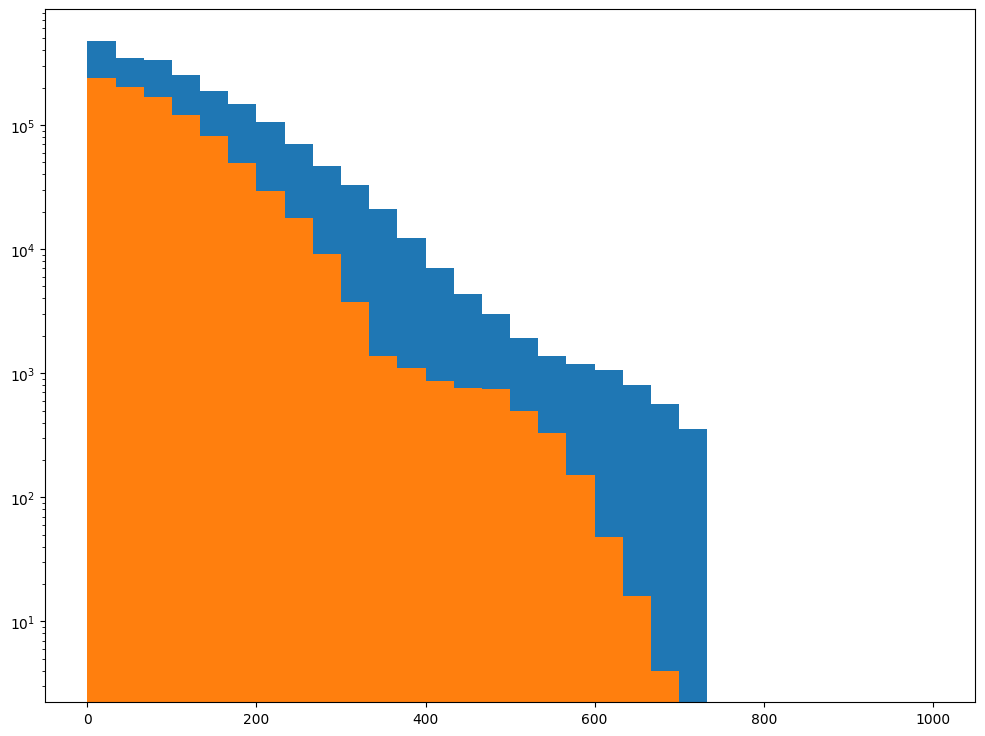

In [43]:
phicut = 500
plt.hist(pixeltrack_doublets["deltaPhi"],range=(0,1000),log=True,bins=30);
print(pixeltrack_doublets[pixeltrack_doublets["deltaPhi"]<phicut].shape[0] / pixeltrack_doublets.shape[0])
plt.hist(pixeltrack_doublets[matched & min_pt]["deltaPhi"],range=(0,1000),log=True,bins=30);
print(pixeltrack_doublets[(matched & min_pt) & (pixeltrack_doublets["deltaPhi"]<phicut)].shape[0] / pixeltrack_doublets[min_pt & matched].shape[0])
#plt.hist(pixeltrack_doublets[matched & min_pt]["deltaPhi"],range=(0,1000),log=True,bins=30);

In [85]:
print("\ndPhi - all") 
dPhi = []
for i in range(0,len(doubs)-1,2):
    L = (doubs[i],doubs[i+1])
    try:
        cut = layerPairsMap[L] & real_doublets & pixeltrack_doublets["deltaPhi"] < 1000 
        zOneMin = np.min(pixeltrack_doublets[cut]["deltaPhi"])
        #cut = matched & cut
        #zOneMaxMatched = pixeltrack_doublets[cut]["zOne"].max()
        dPhi.append(round(zOneMin-10))
        print("%.1f"%round(zOneMin-10),end=",")
    except:
        print("-999.",end=",")
print("\ndPhi - matched")  
dPhiMatched = []
for i in range(0,len(doubs)-1,2):
    L = (doubs[i],doubs[i+1])
    try:
        cut = layerPairsMap[L] & real_doublets & matched & pixeltrack_doublets["deltaPhi"] < 1000
        zOneMin = np.min(pixeltrack_doublets[cut]["deltaPhi"])
        #cut = matched & cut
        #zOneMaxMatched = pixeltrack_doublets[cut]["zOne"].max()
        dPhiMatched.append(round(zOneMin-10))
        print("%.1f"%round(zOneMin-10),end=",")
    except:
        print("-999.",end=",")       


dPhi - all
-10.0,-10.0,-999.,-10.0,-10.0,-999.,-10.0,-10.0,-10.0,-10.0,-999.,-10.0,-10.0,-999.,-999.,-999.,-999.,-10.0,-10.0,
dPhi - matched
-10.0,-10.0,-999.,-10.0,-10.0,-999.,-10.0,-10.0,-10.0,-10.0,-999.,-10.0,-10.0,-999.,-999.,-999.,-999.,-10.0,-10.0,


dPhi - all
phi0p05,phi0p05,phi0p05,phi0p05,phi0p06,phi0p06,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,

<ipython-input-136-737380c0ae7a>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p06,phi0p06,phi0p06,phi0p06,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p05,phi0p06,phi0p06,phi0p06,phi0p05,phi0p06,phi0p06,phi0p07,phi0p06,phi0p06,phi0p06,phi0p06,phi0p06,phi0p06,phi0p07,

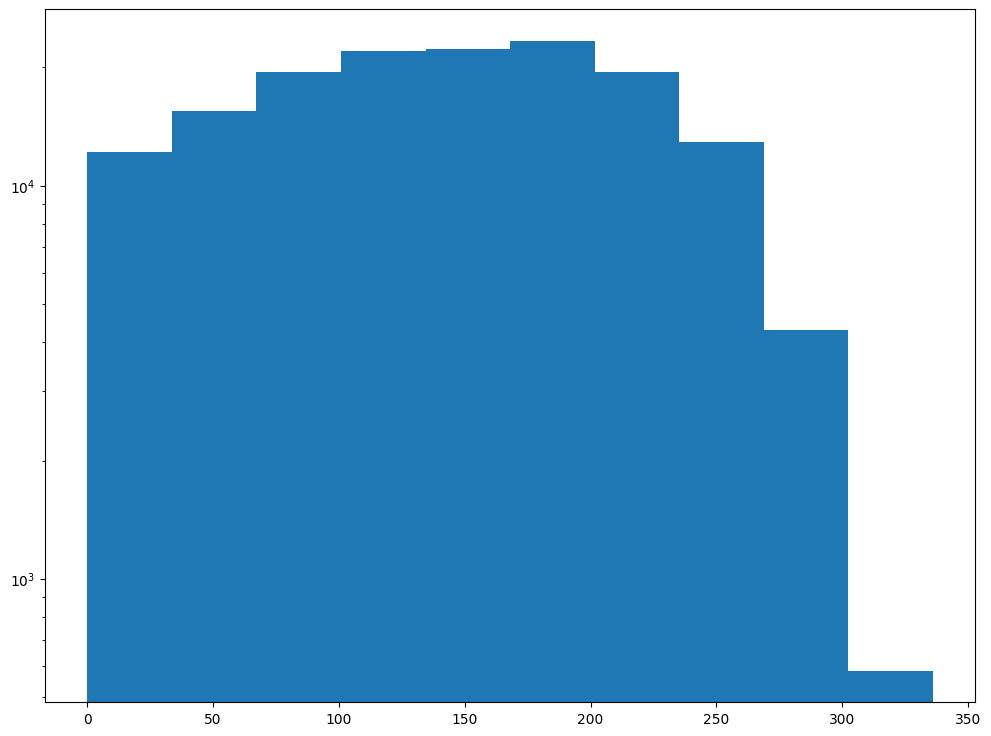

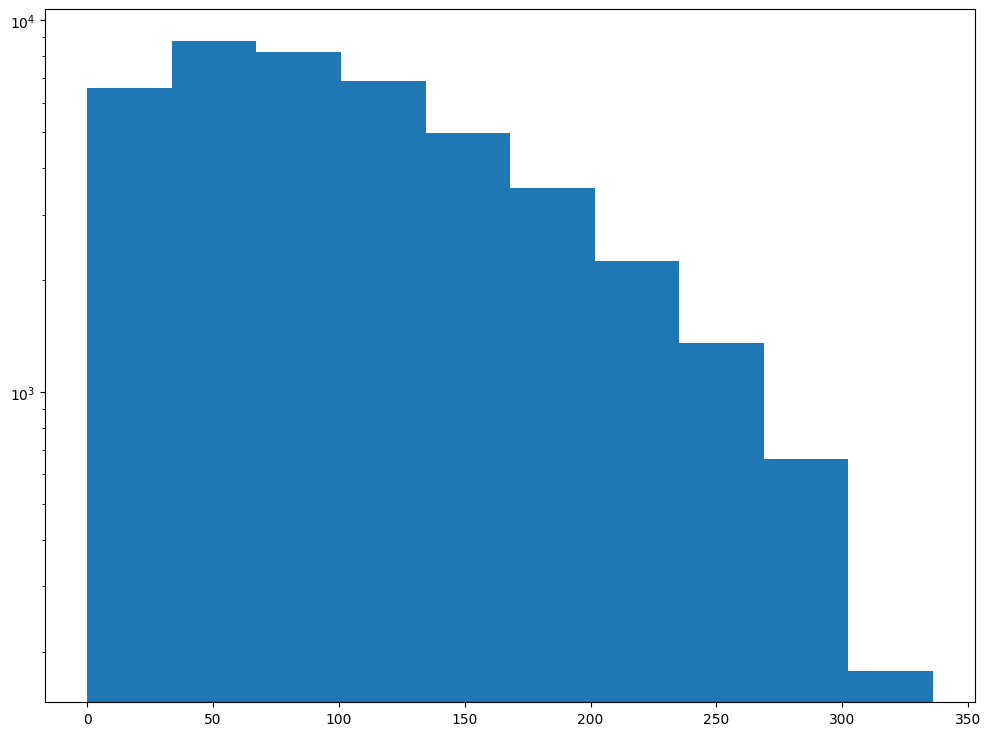

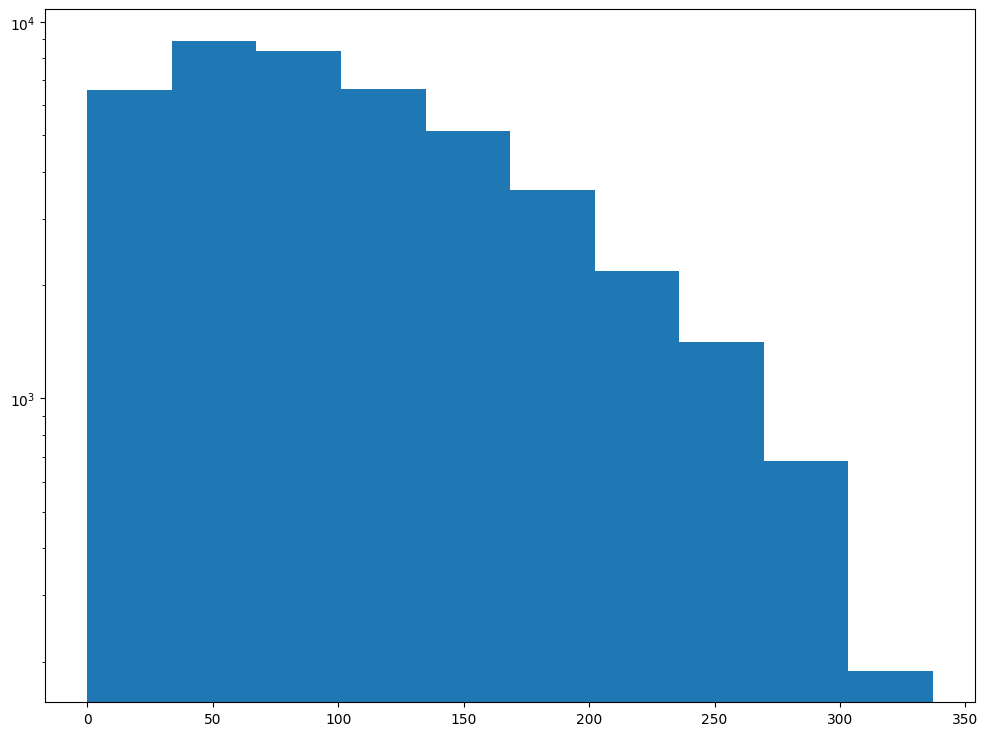

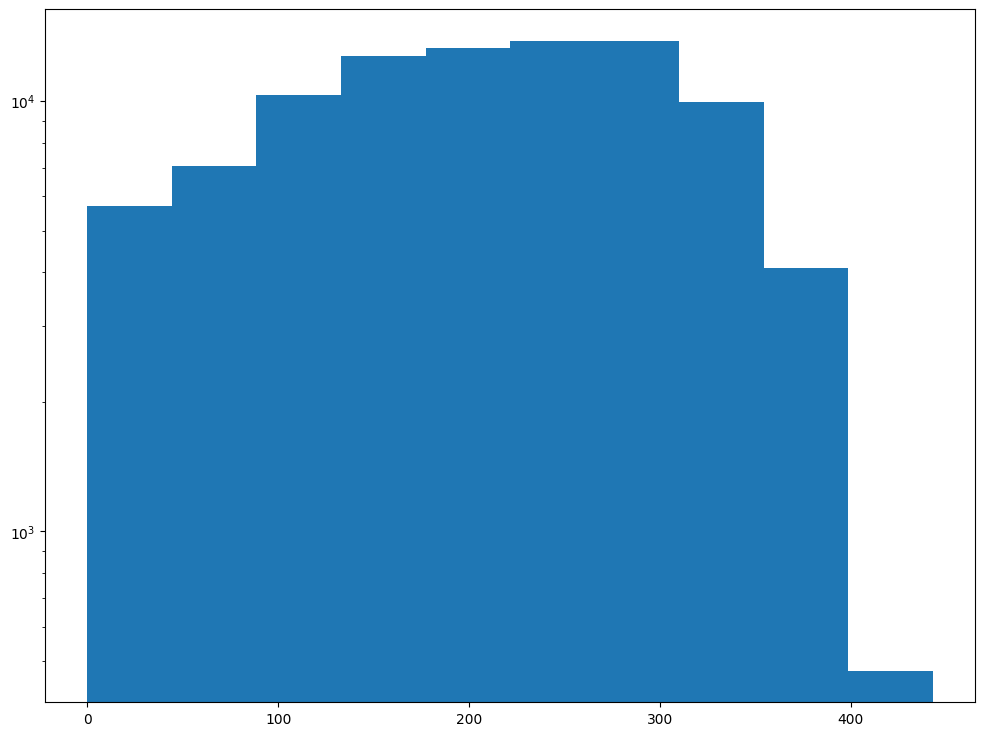

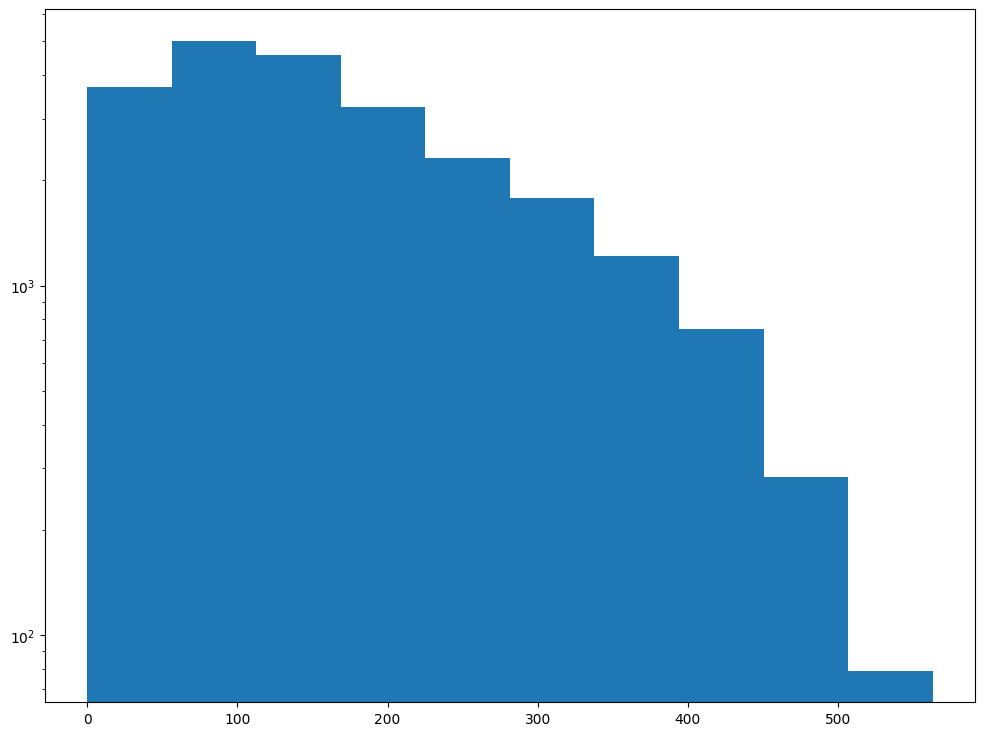

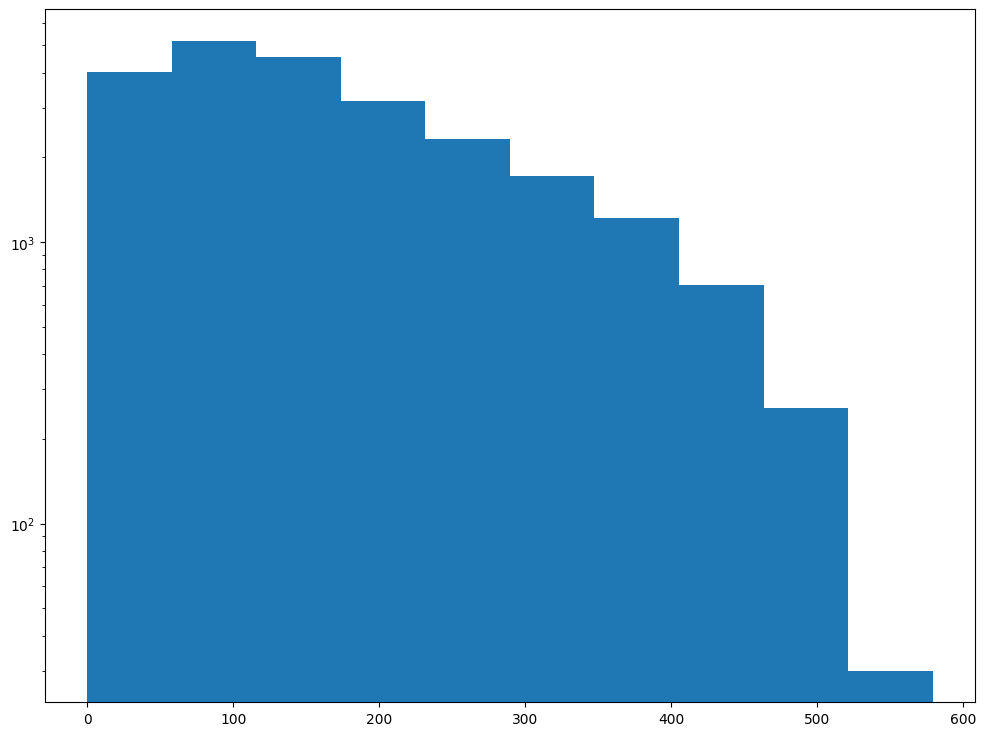

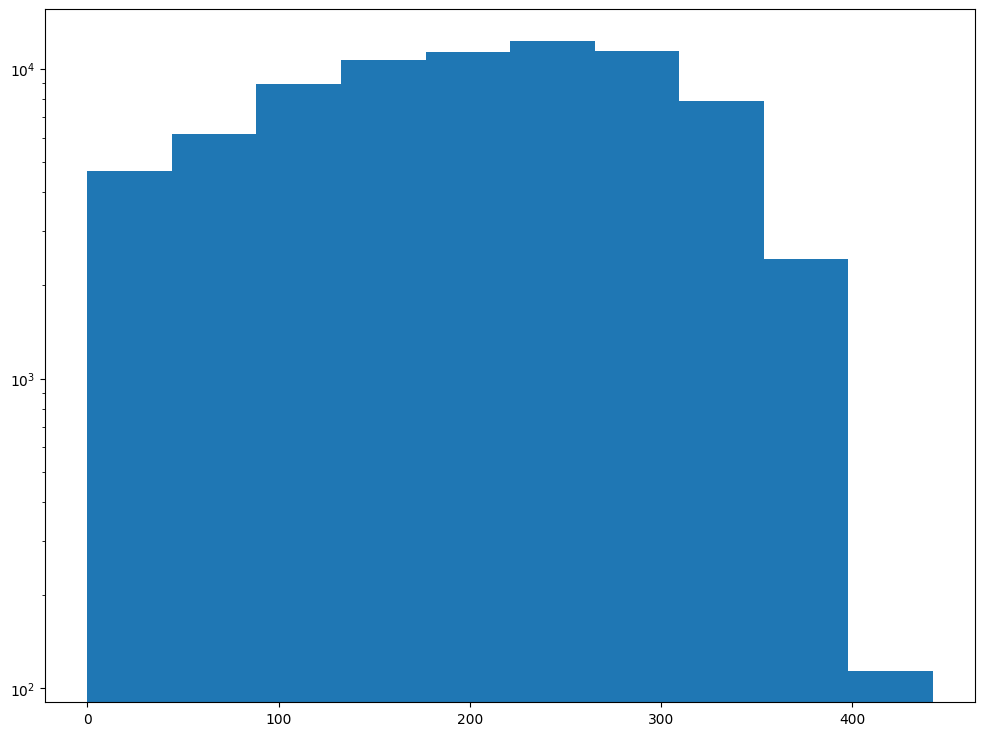

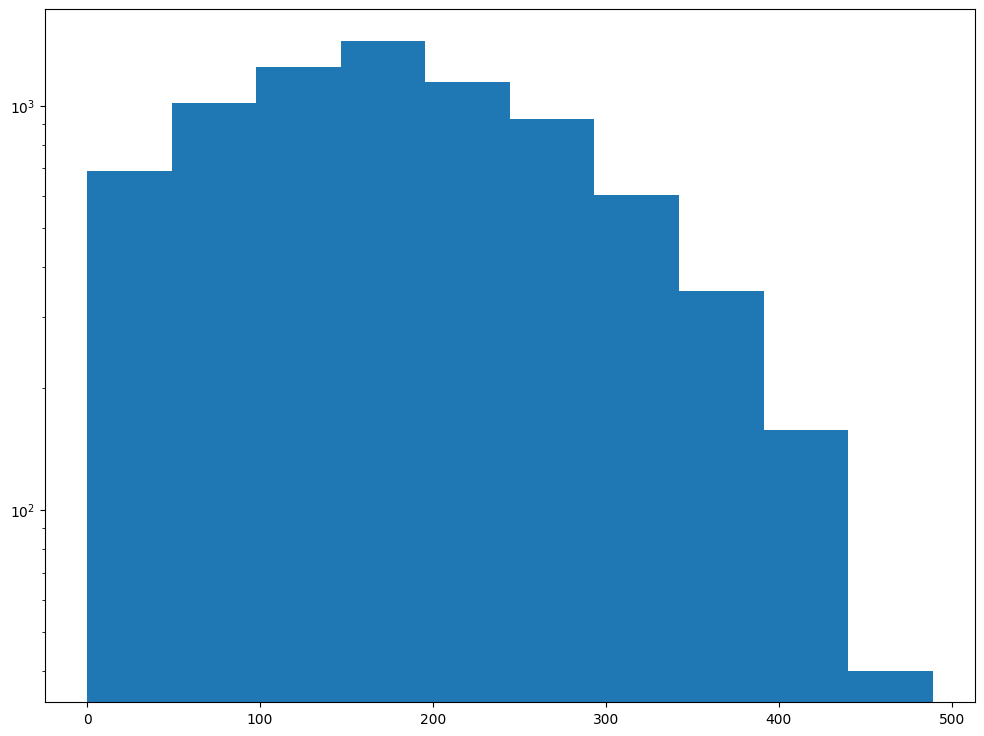

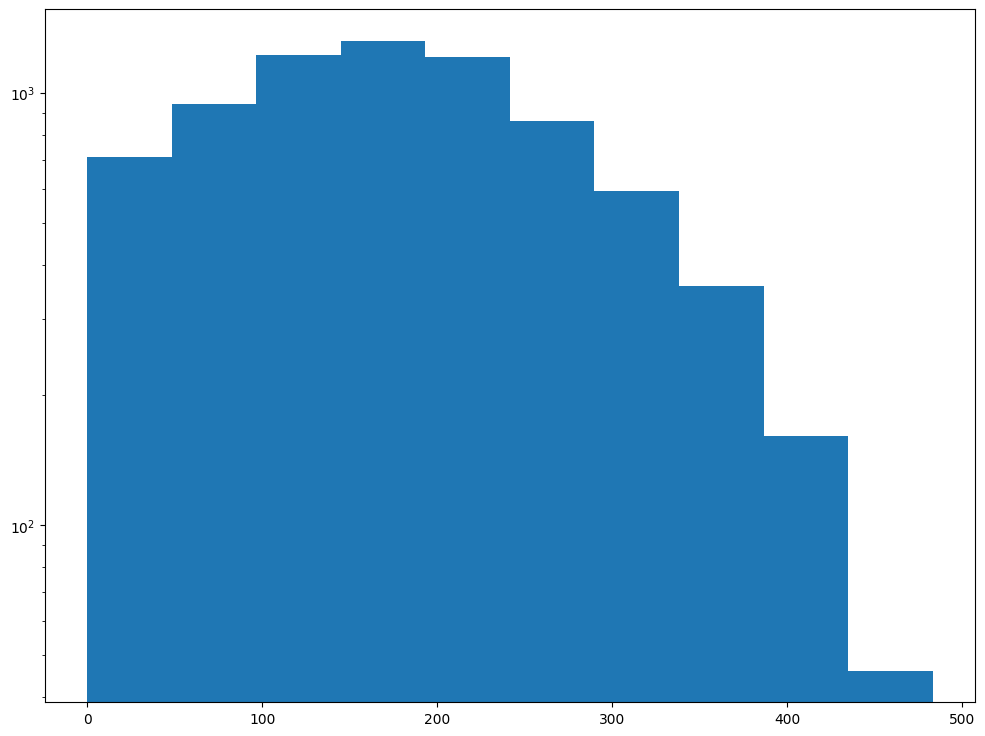

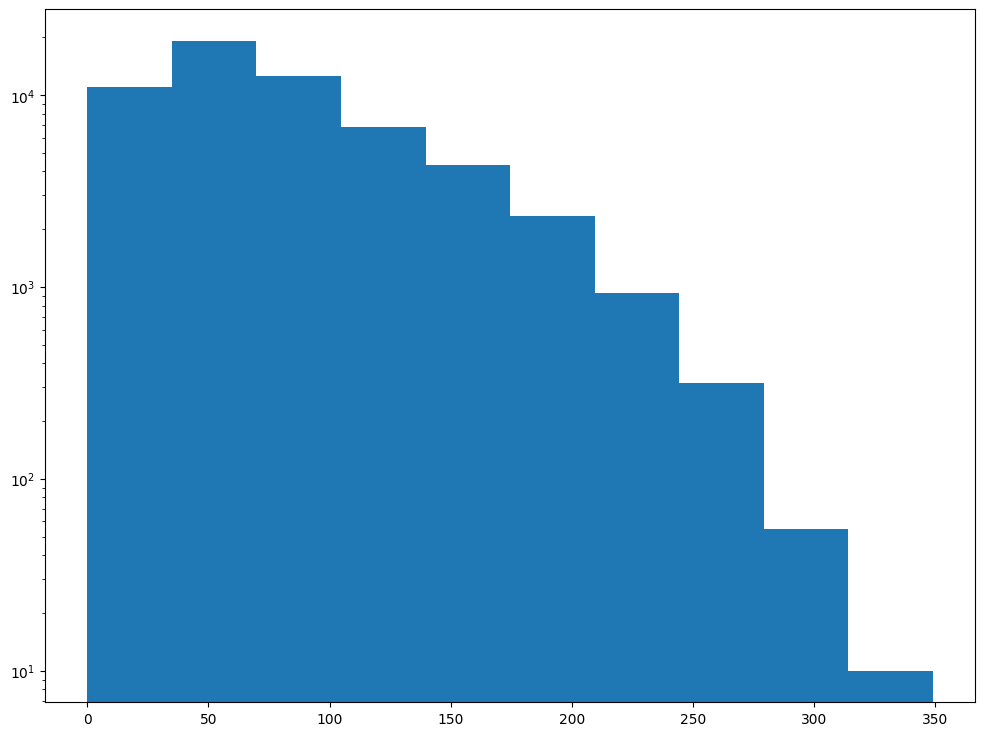

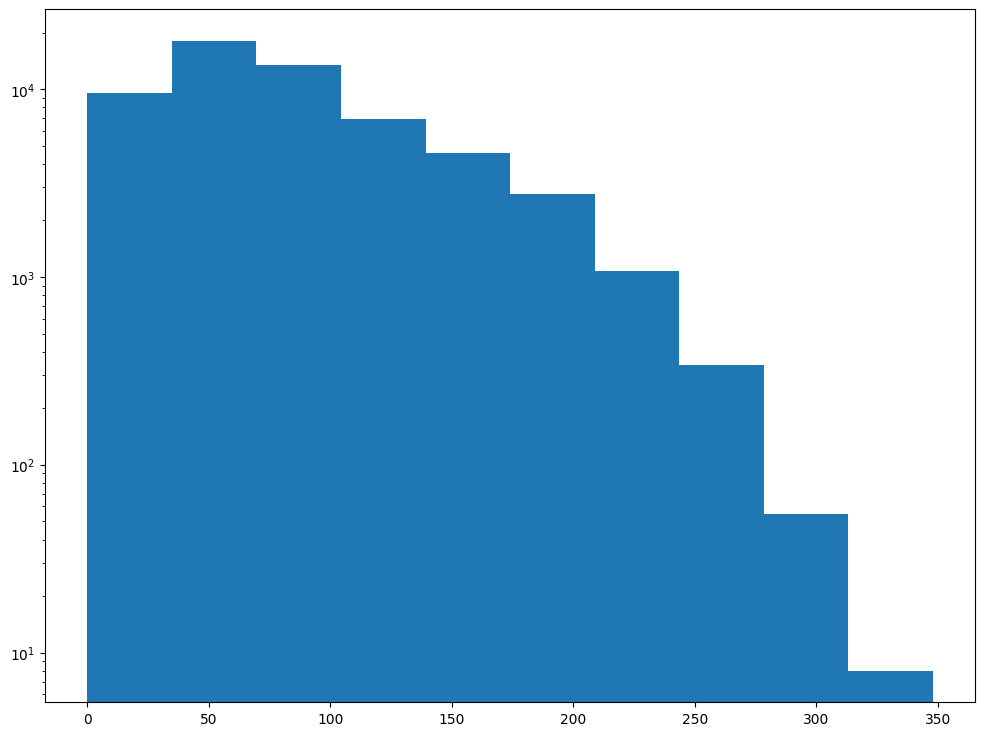

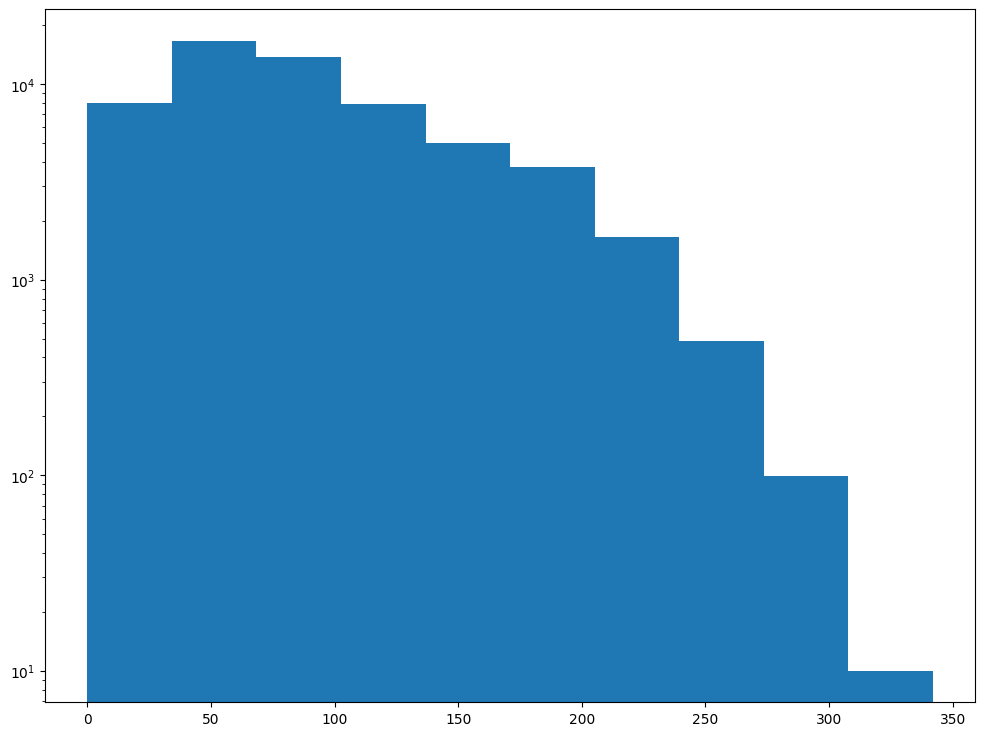

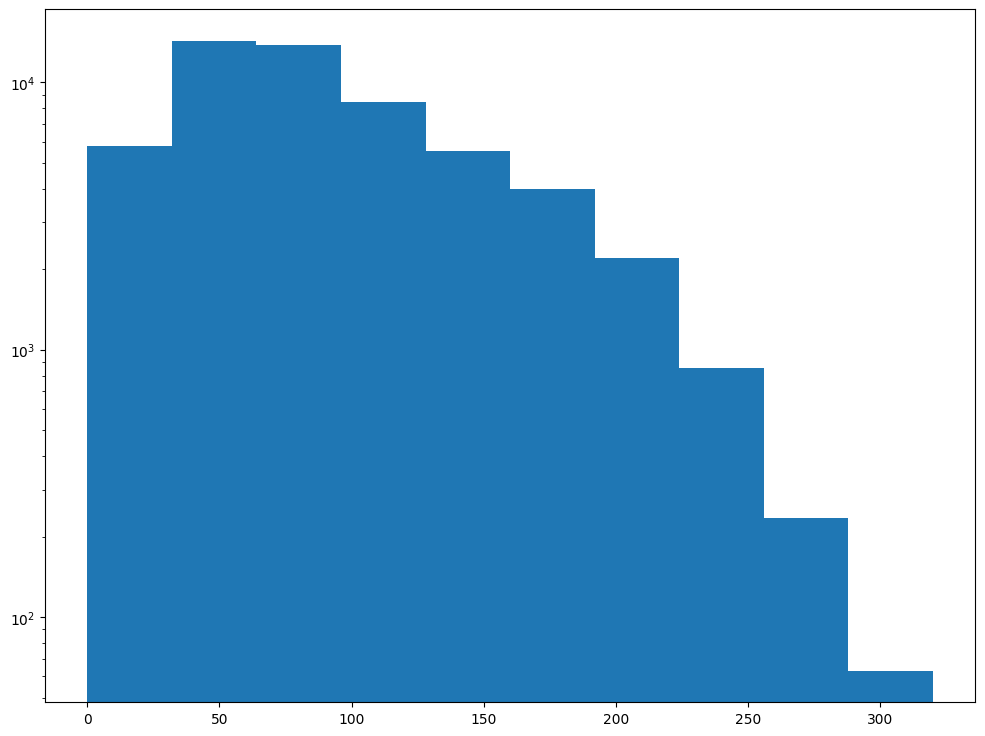

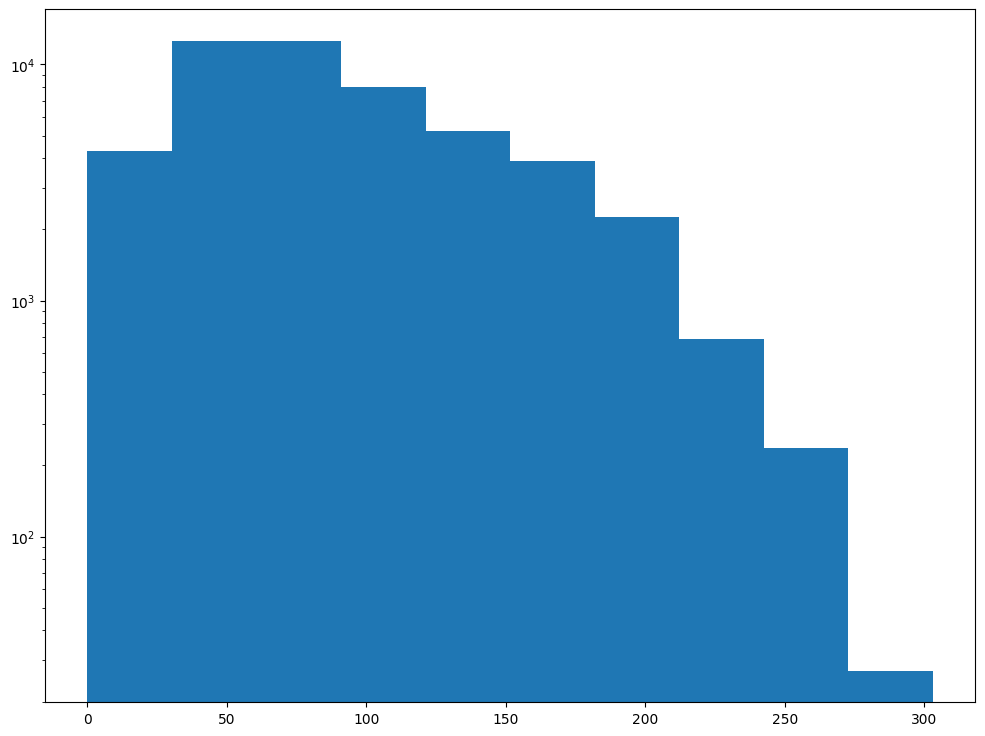

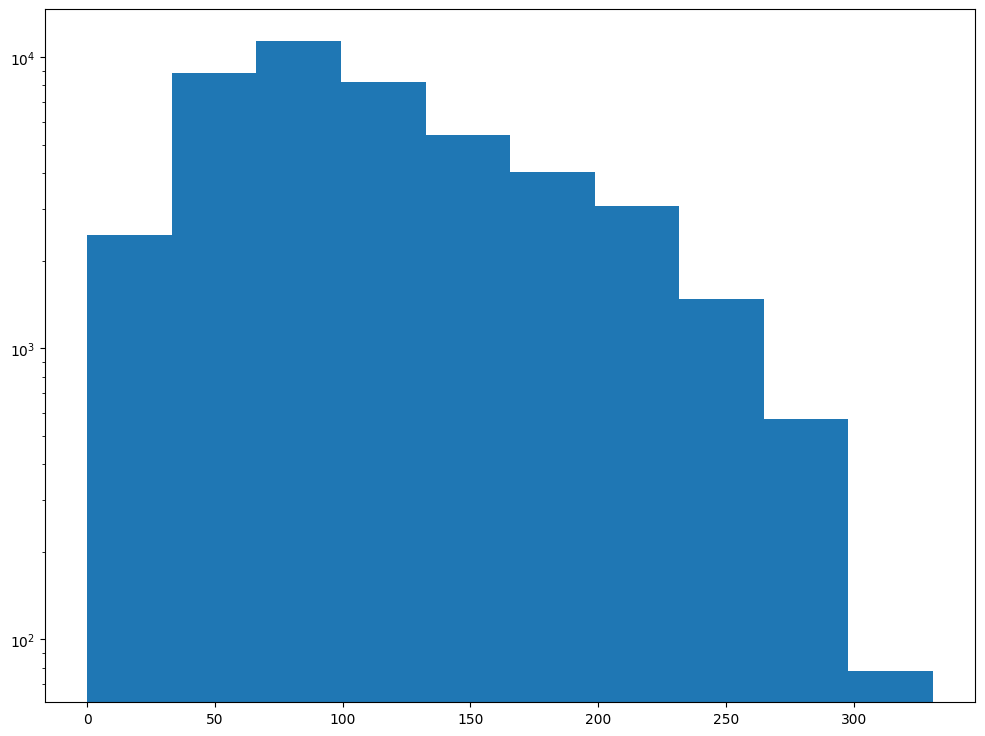

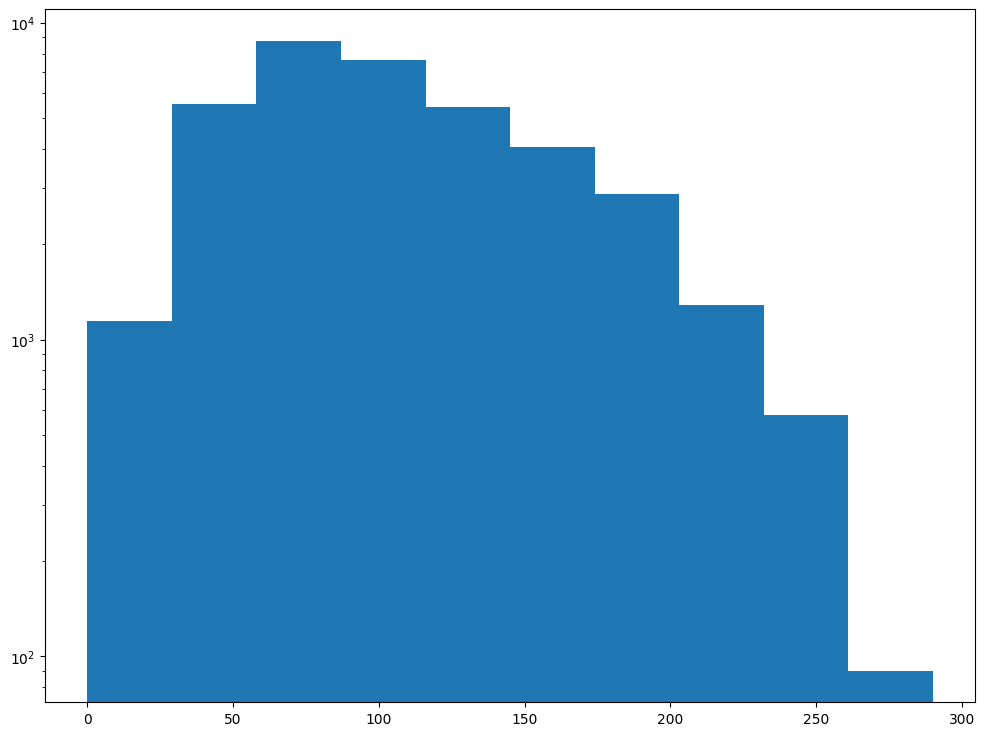

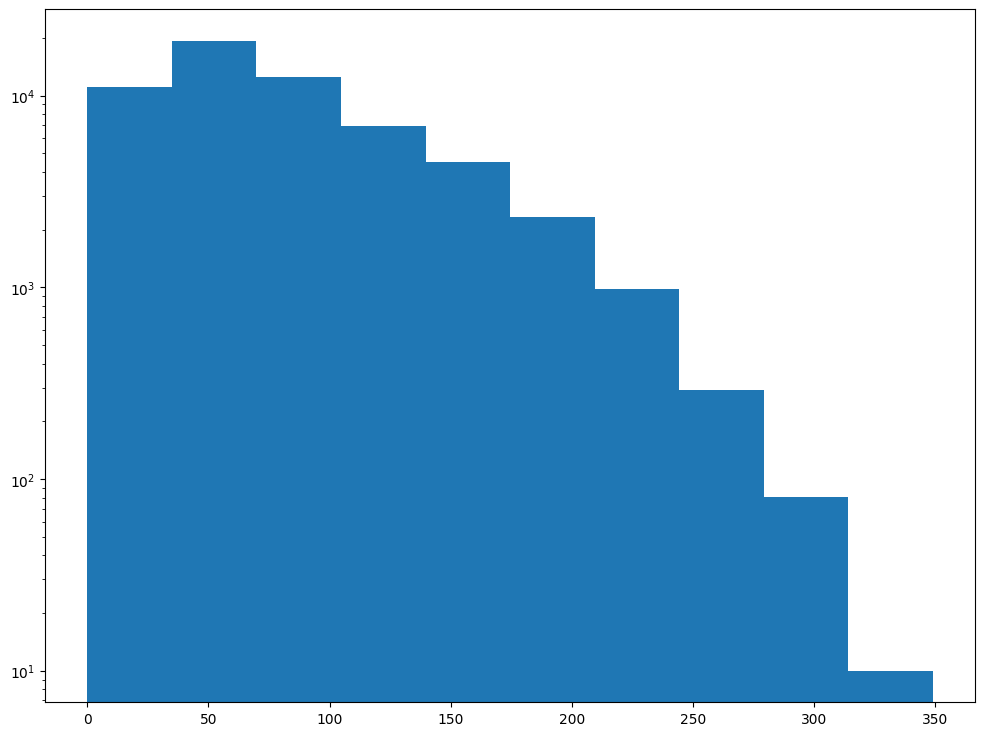

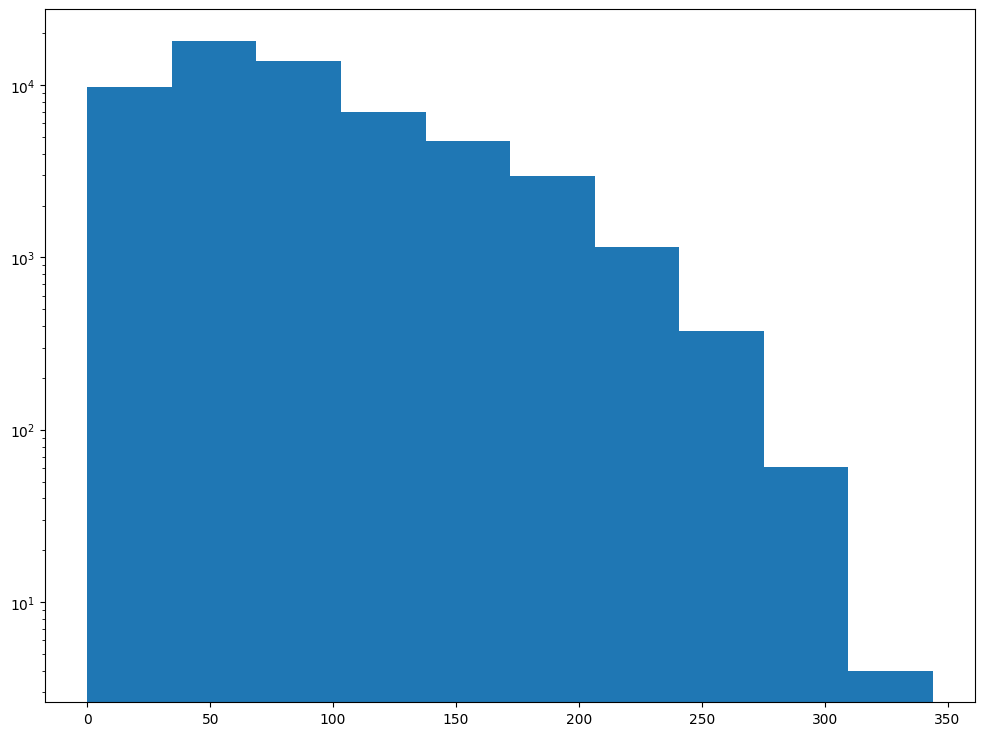

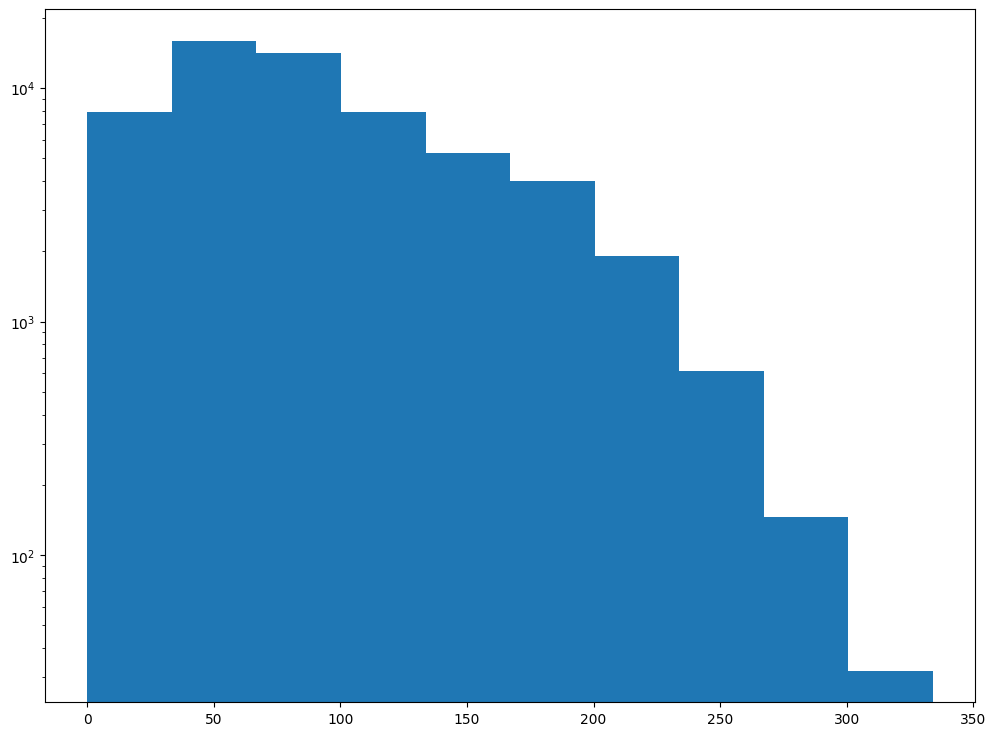

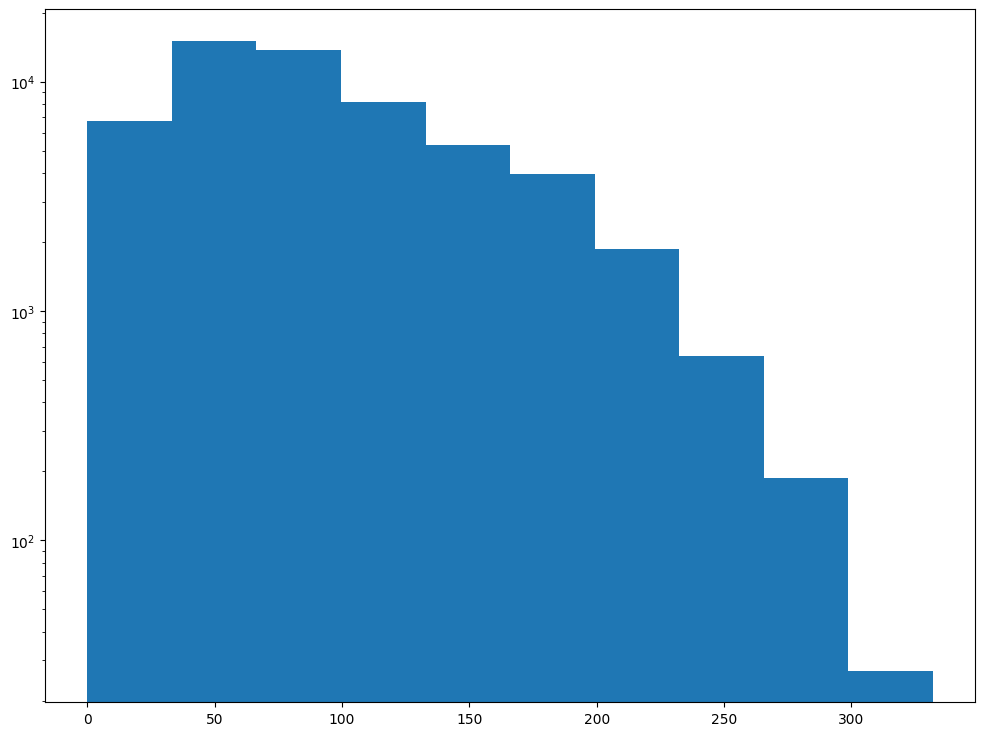

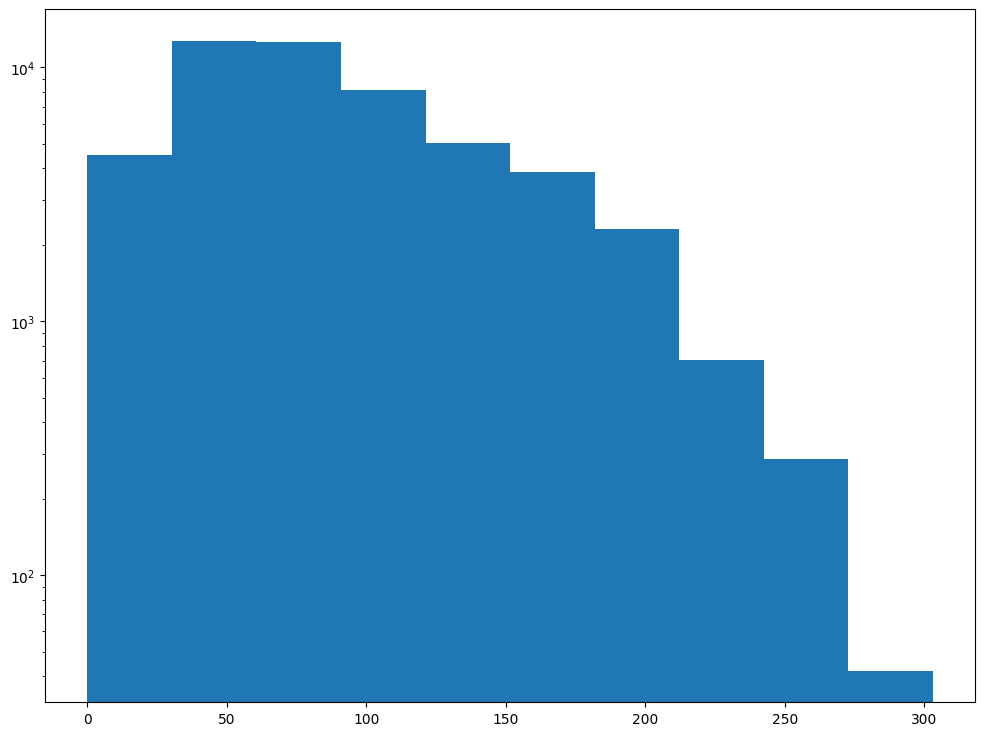

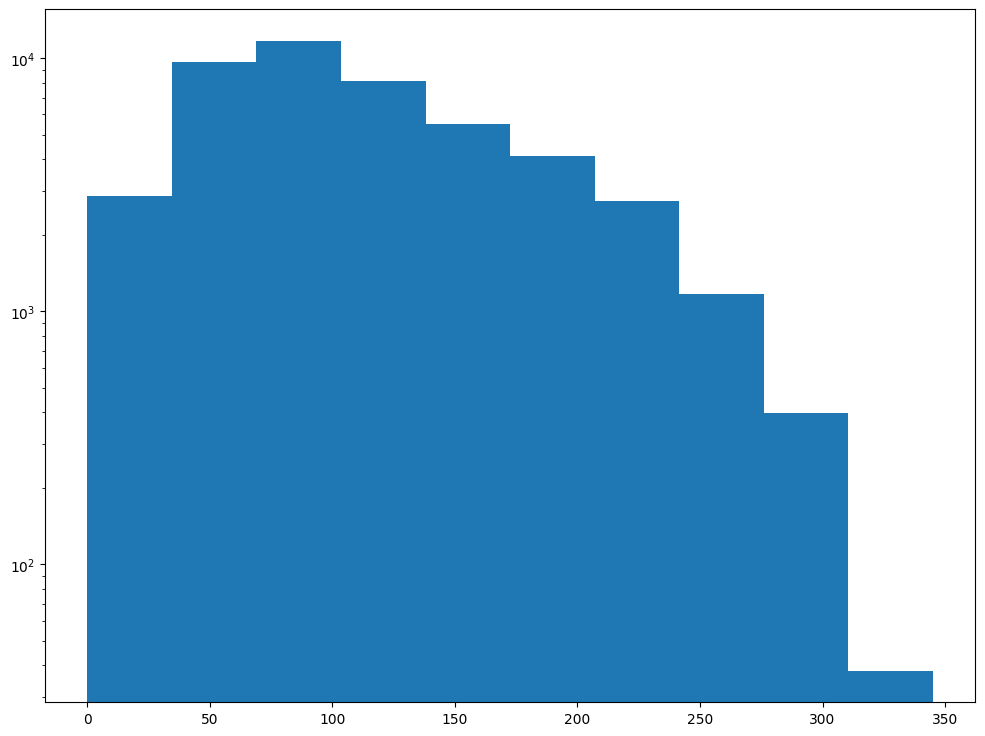

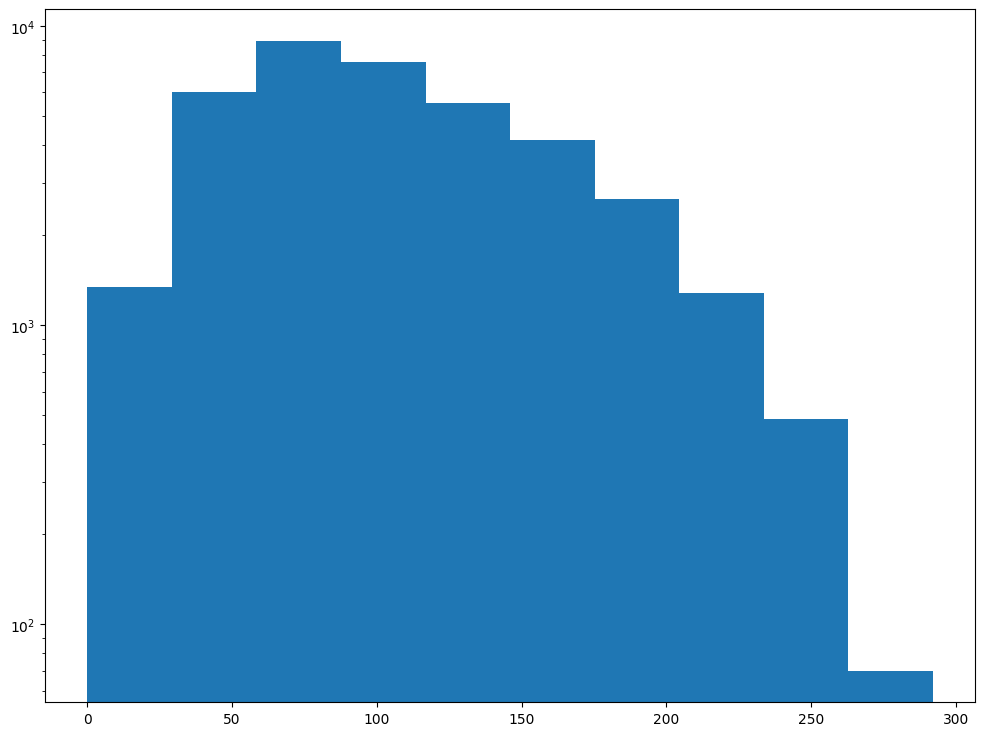

<Figure size 1200x900 with 0 Axes>

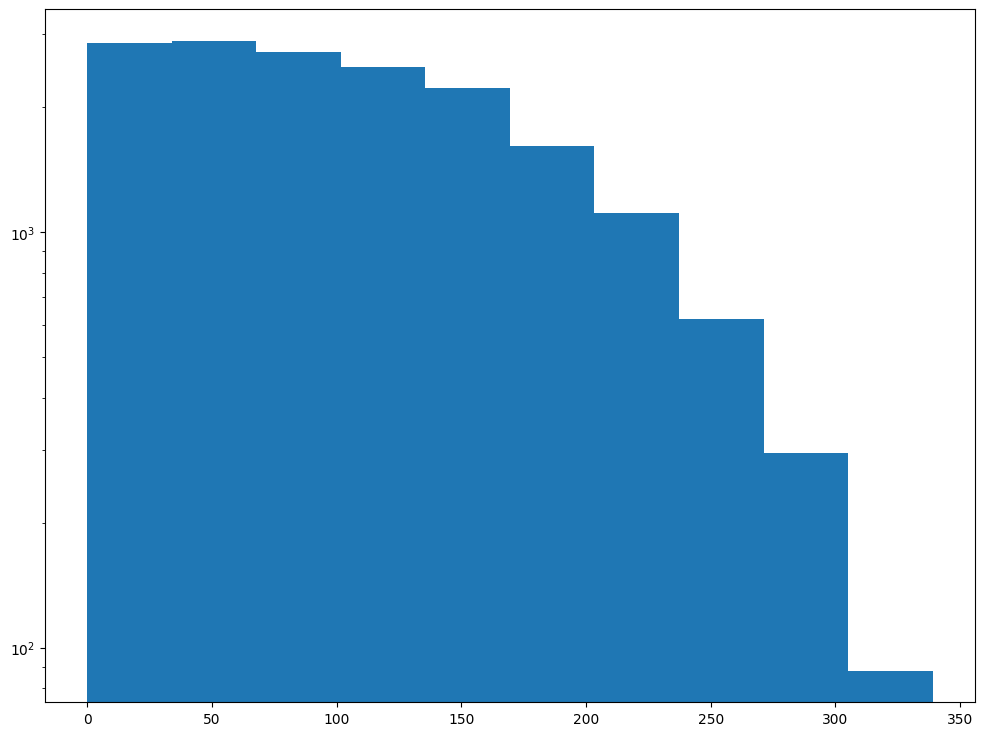

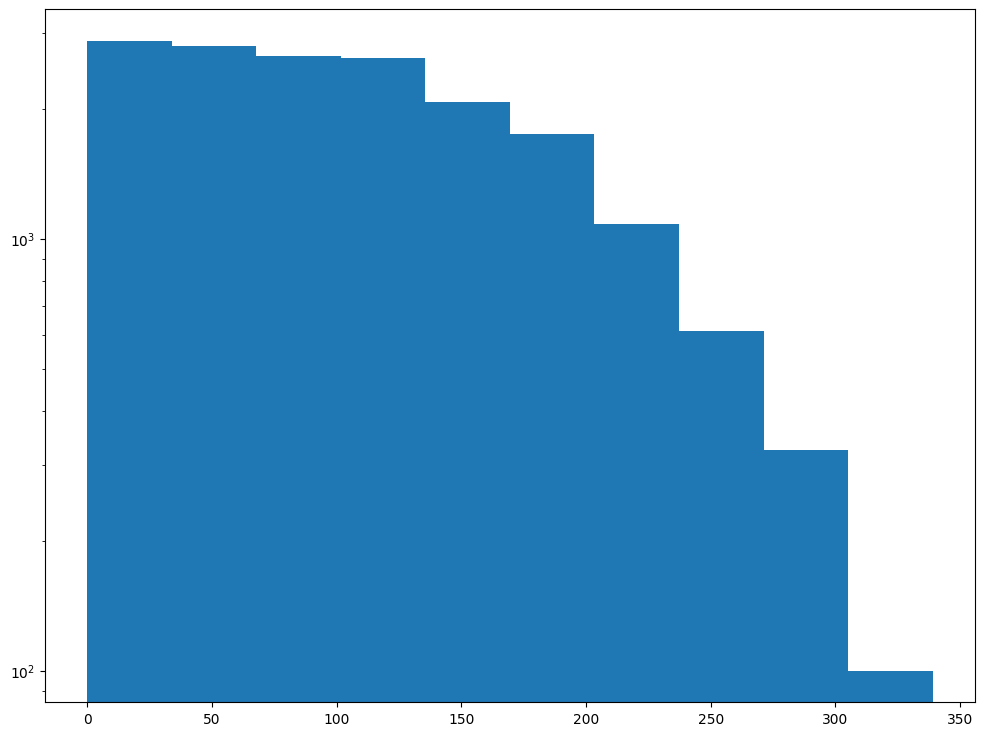

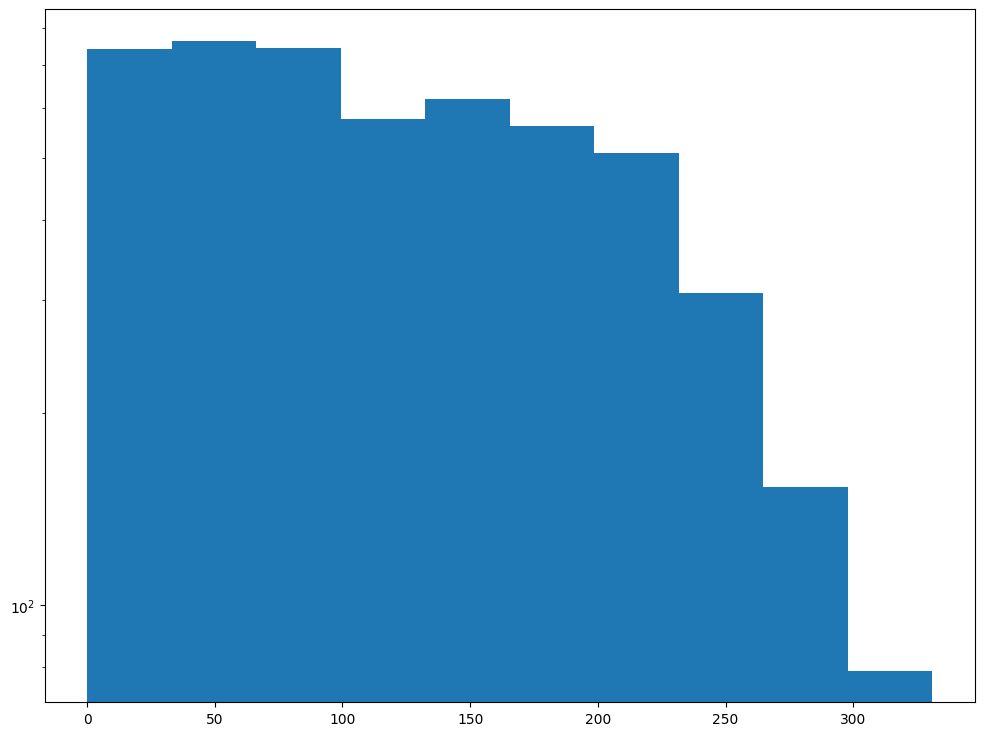

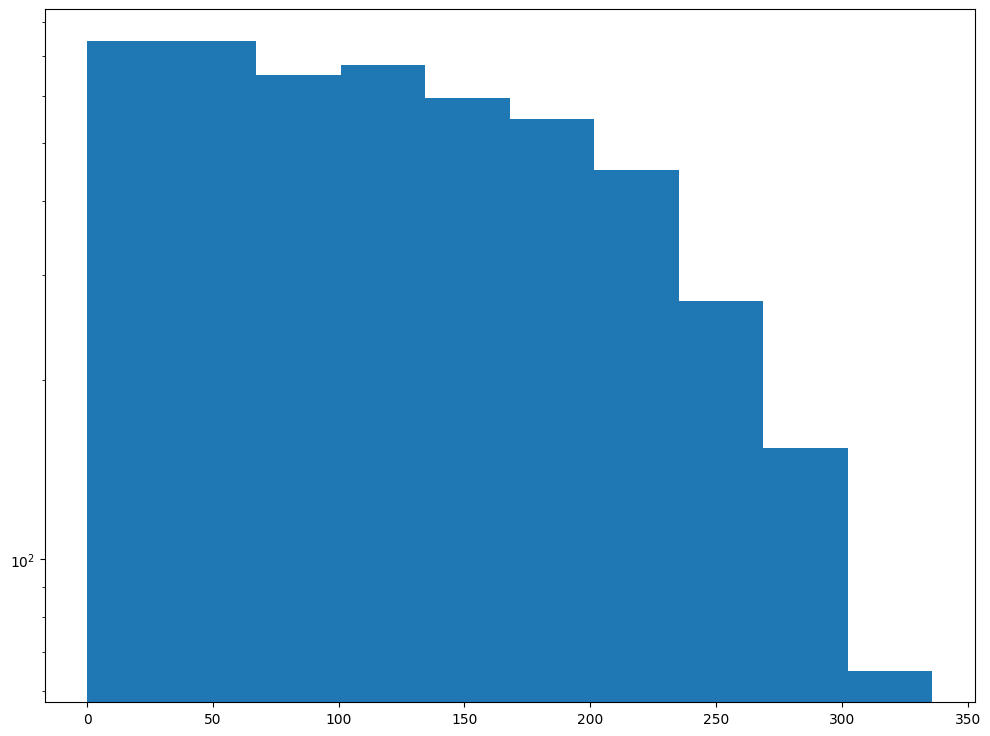

<Figure size 1200x900 with 0 Axes>

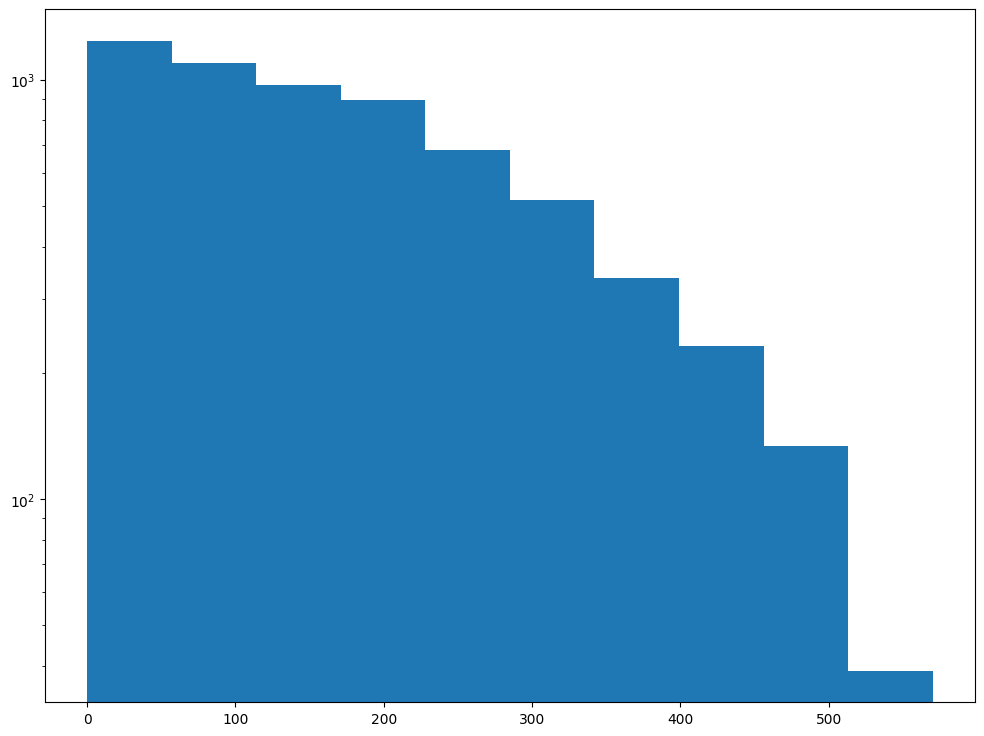

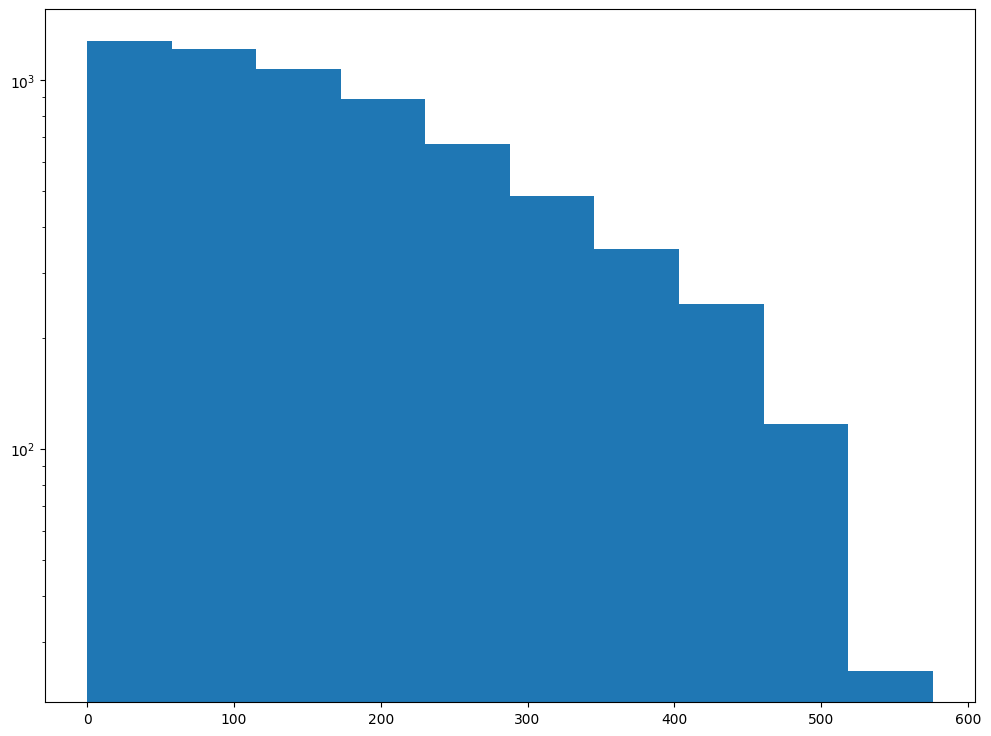

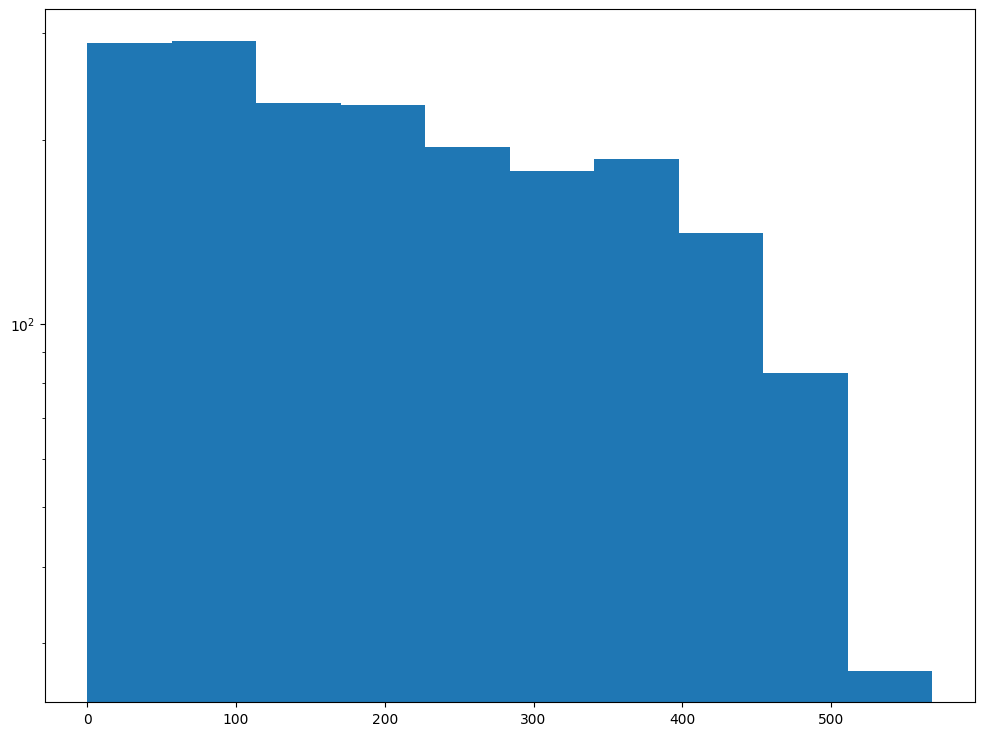

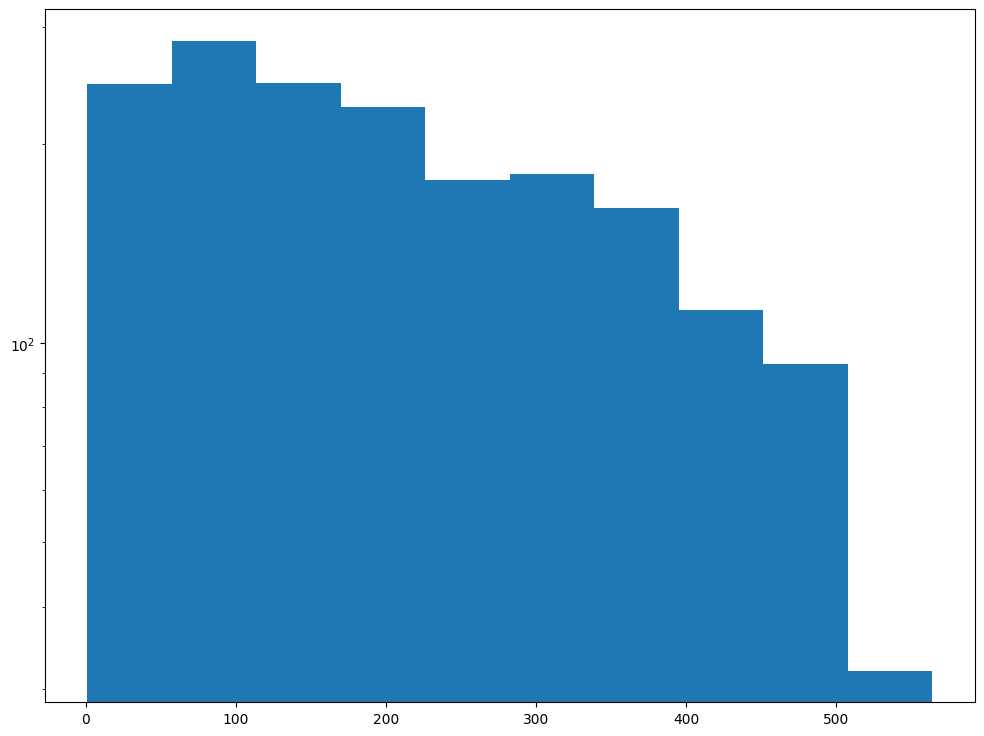

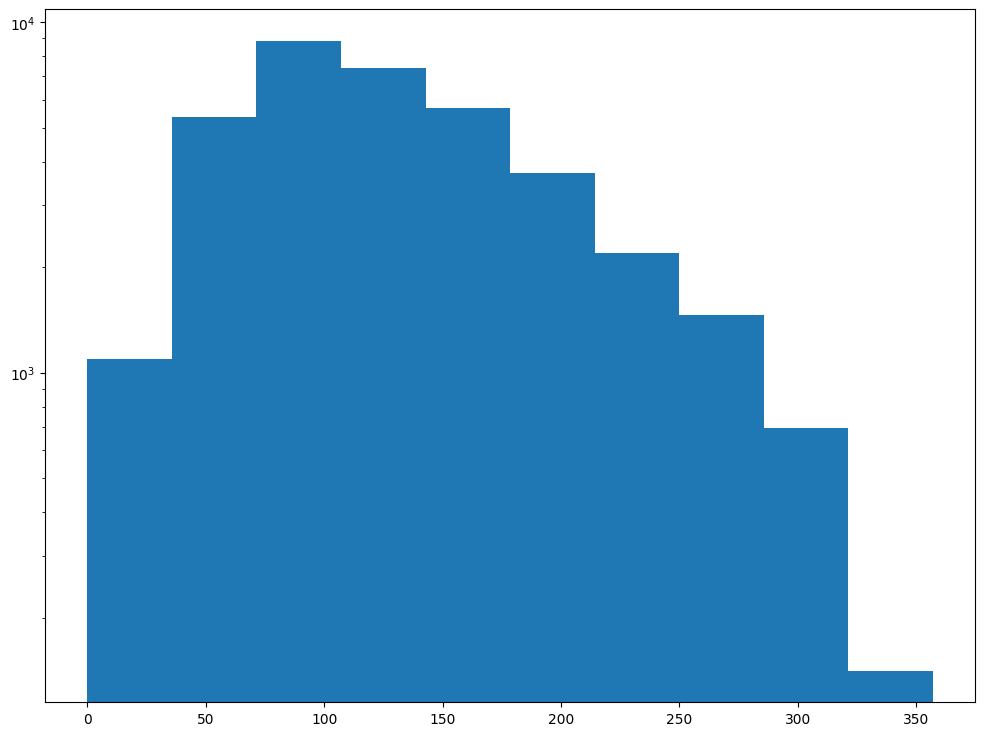

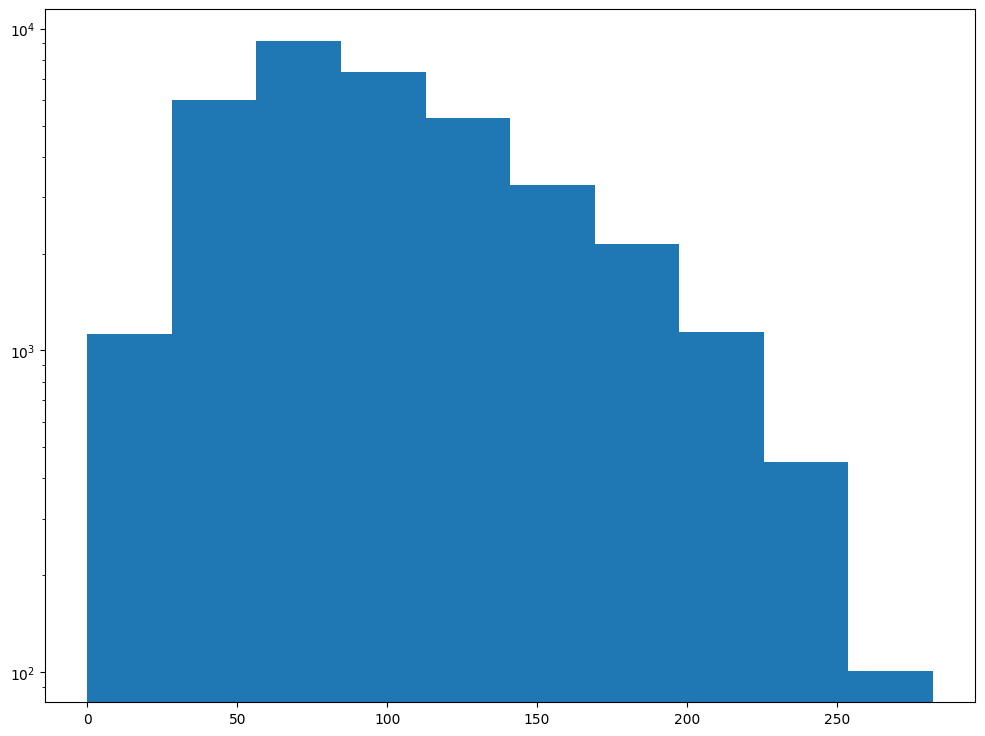

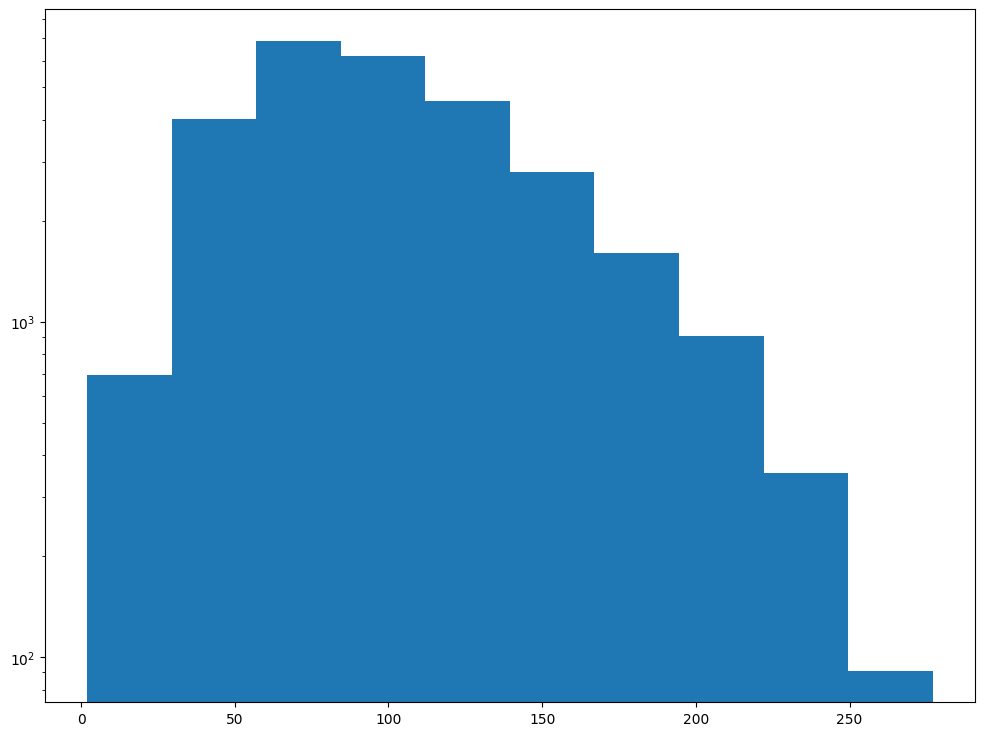

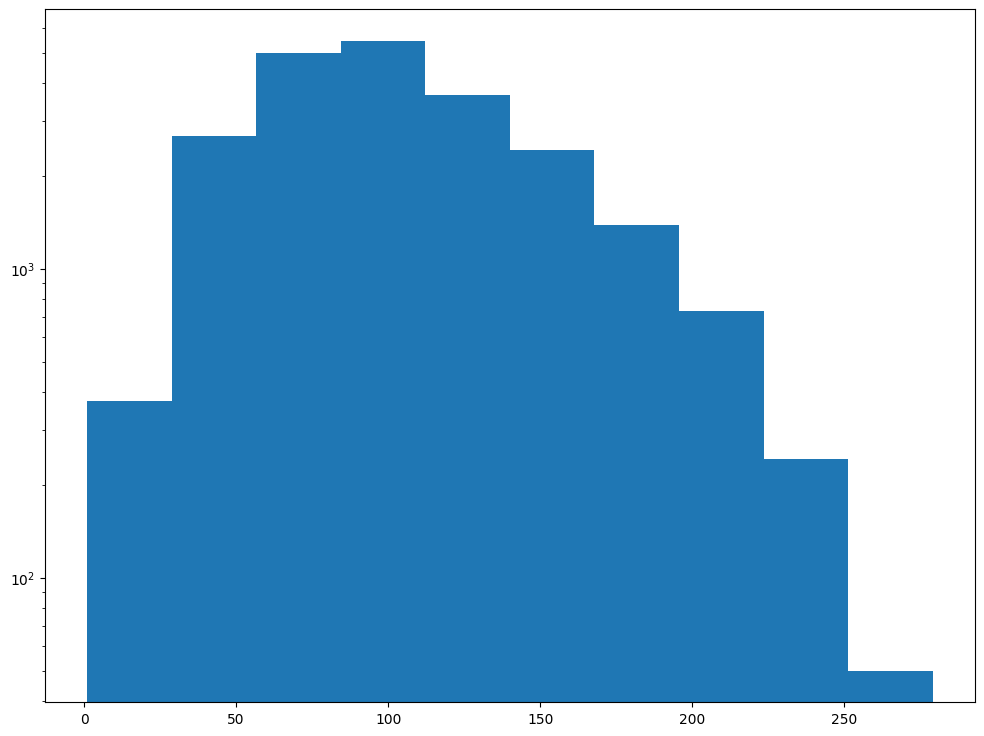

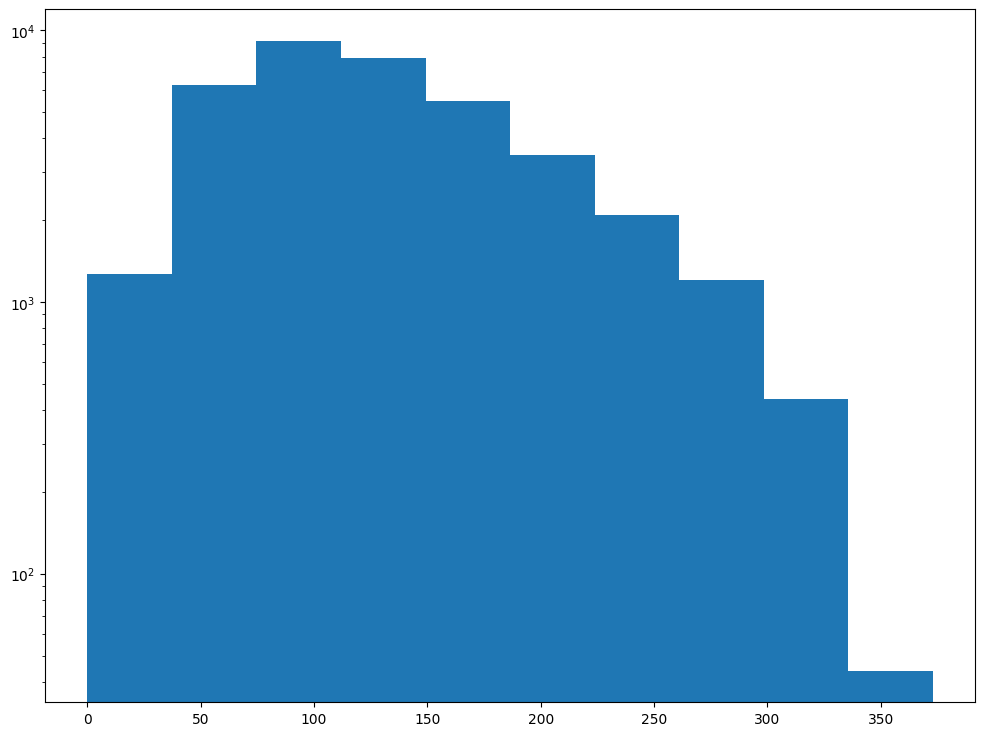

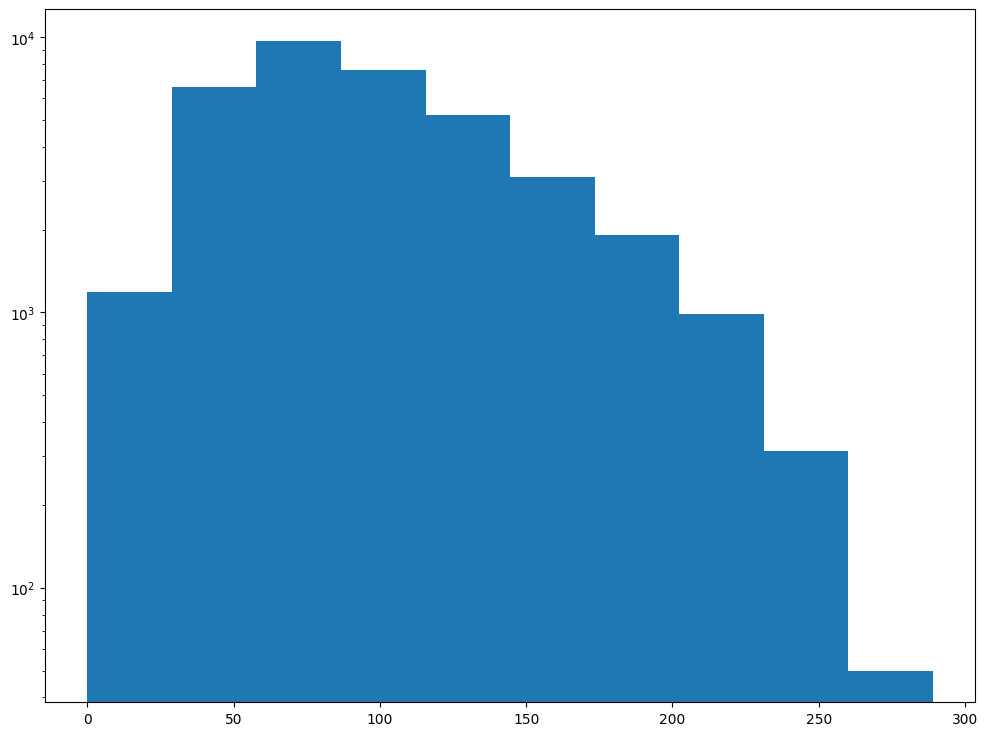

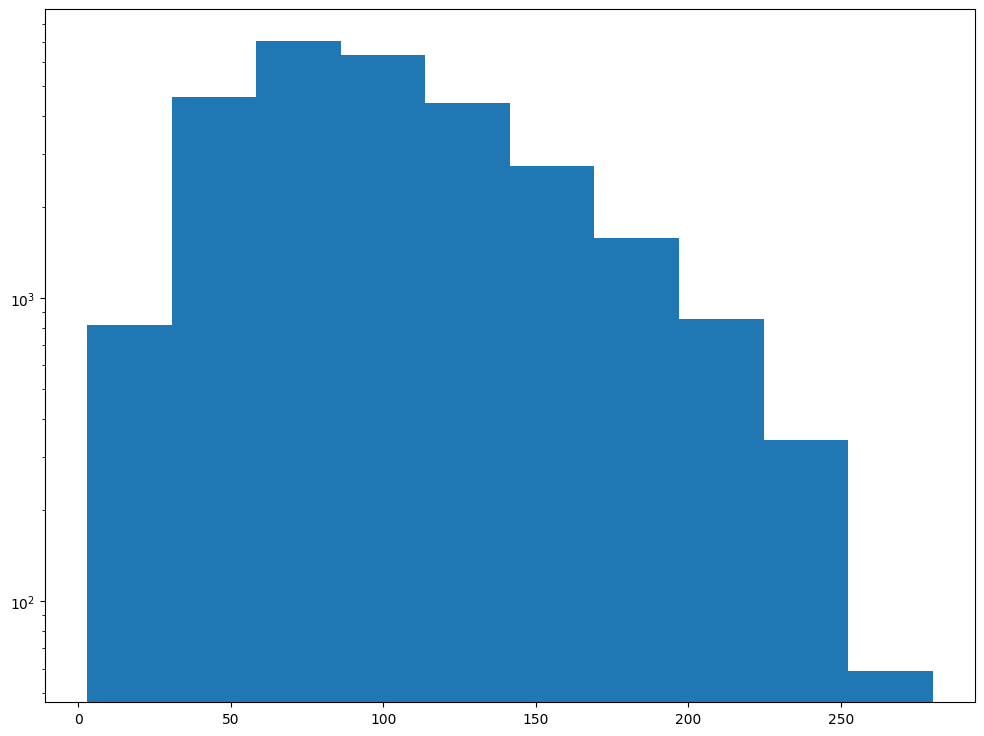

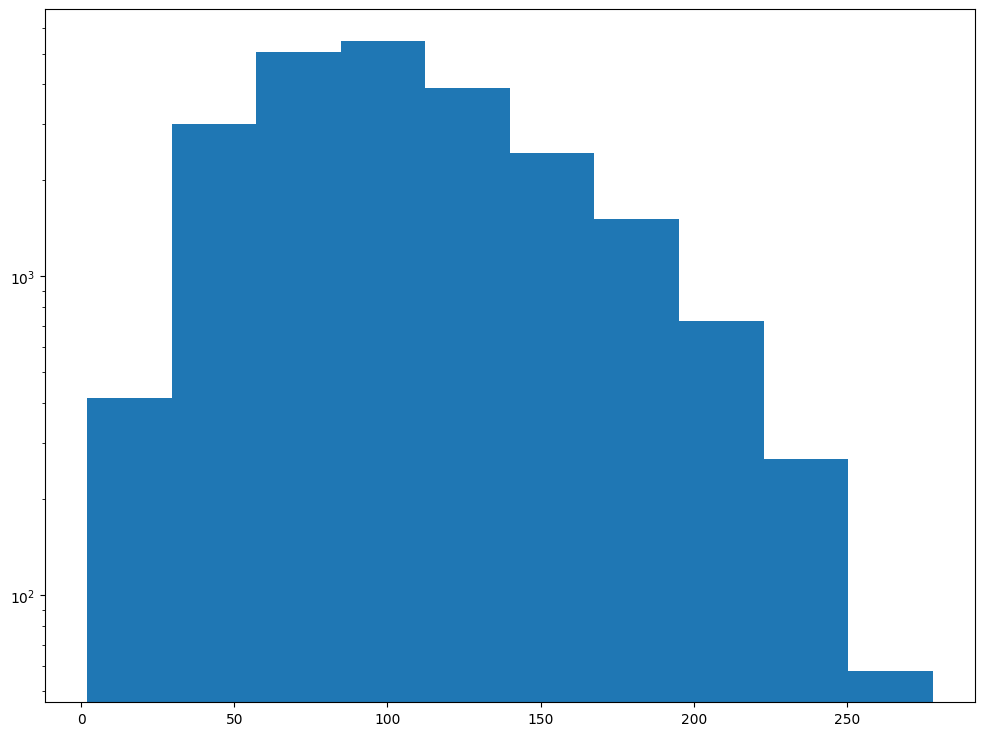

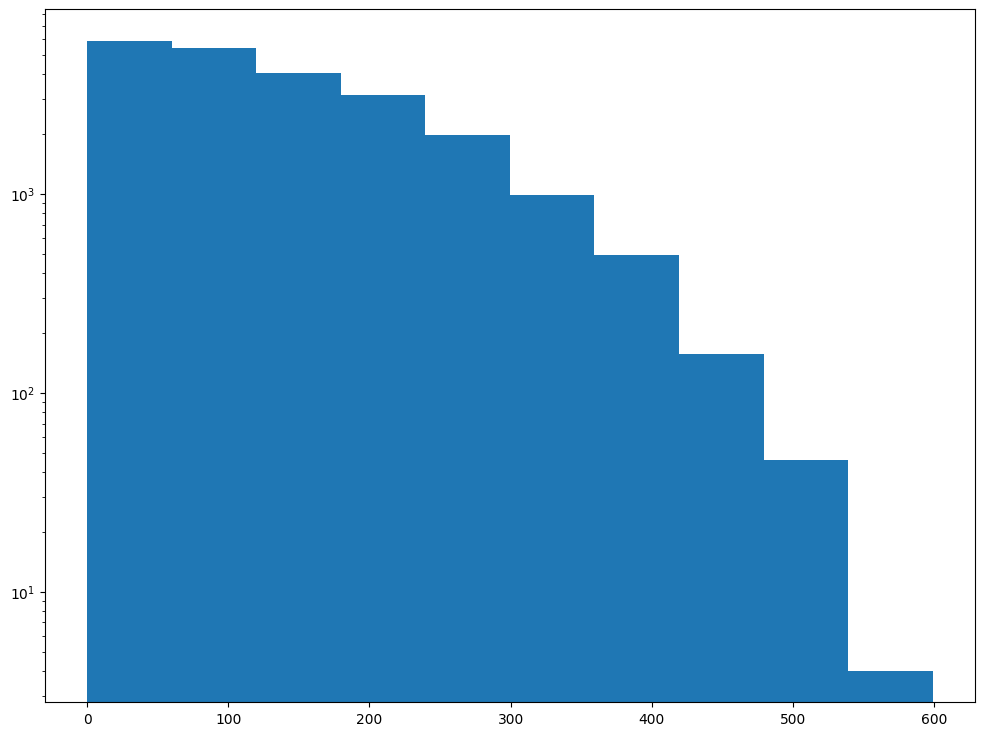

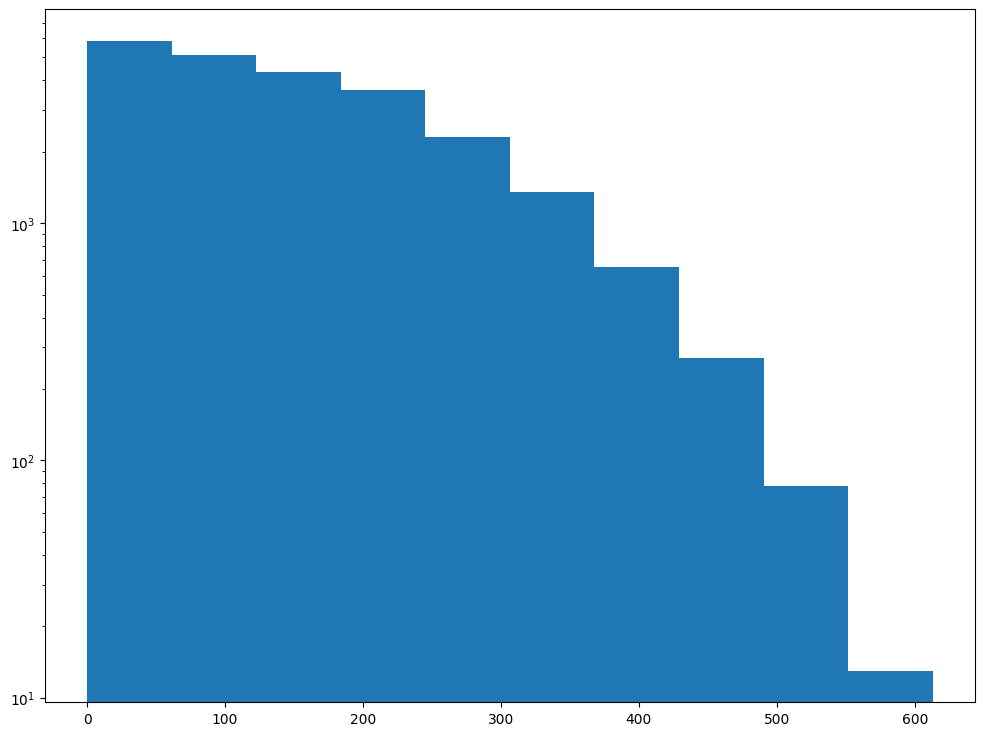

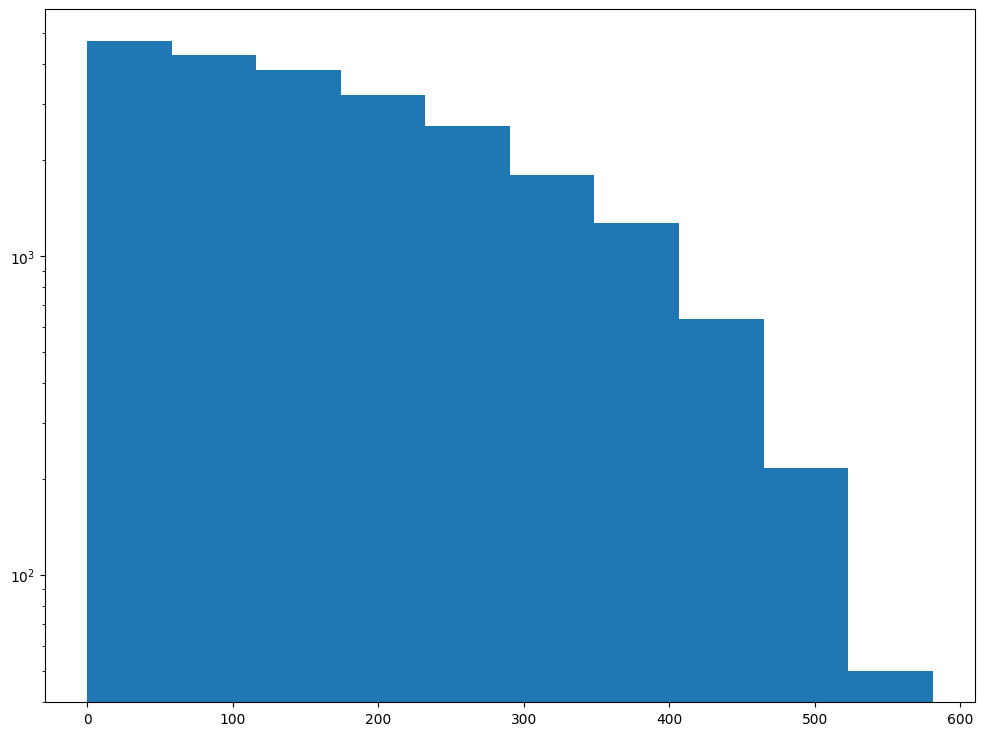

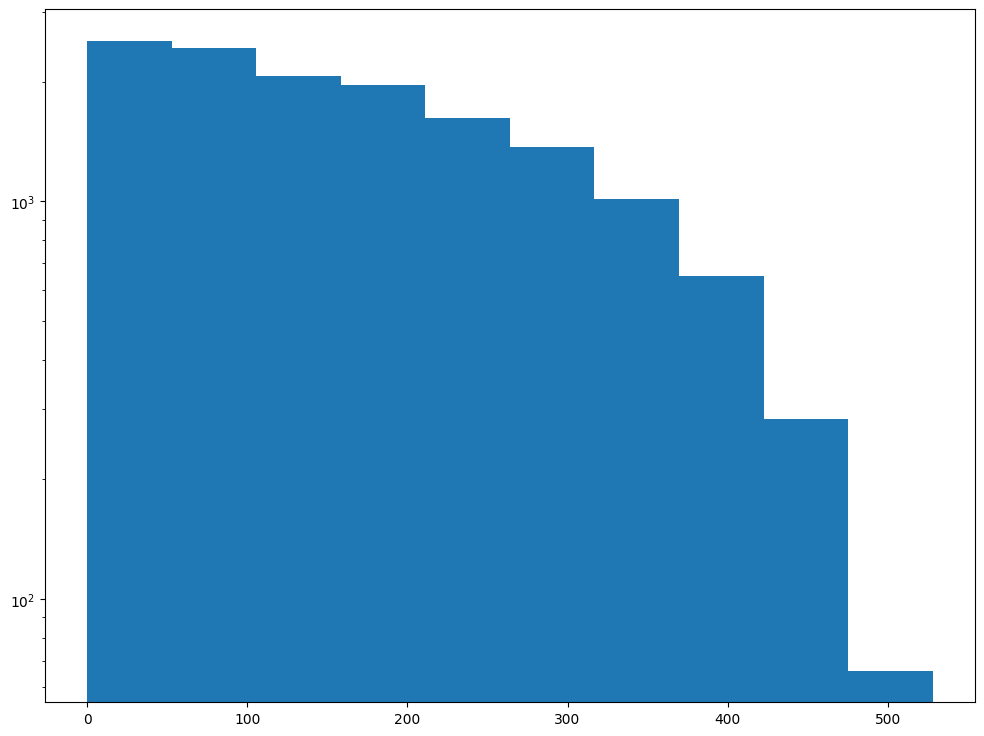

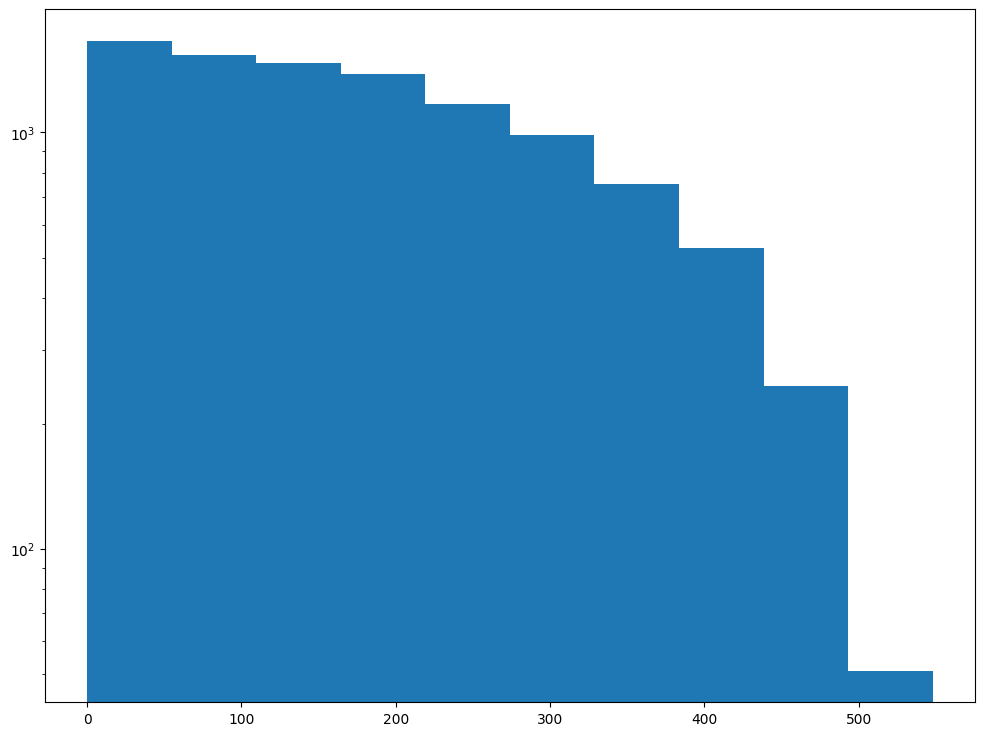

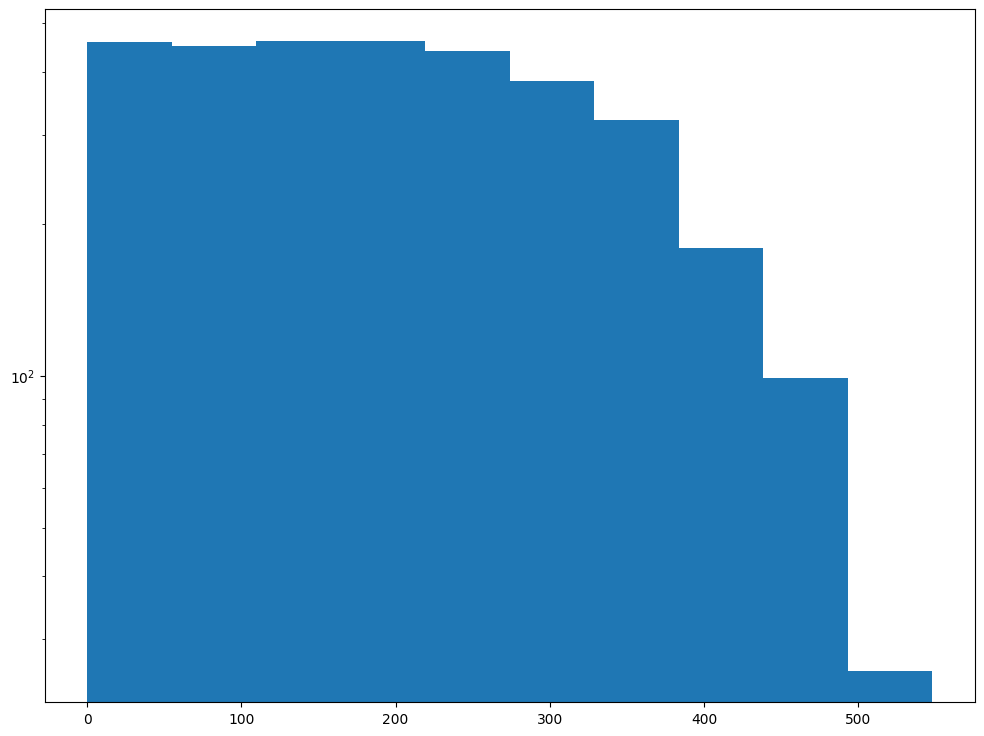

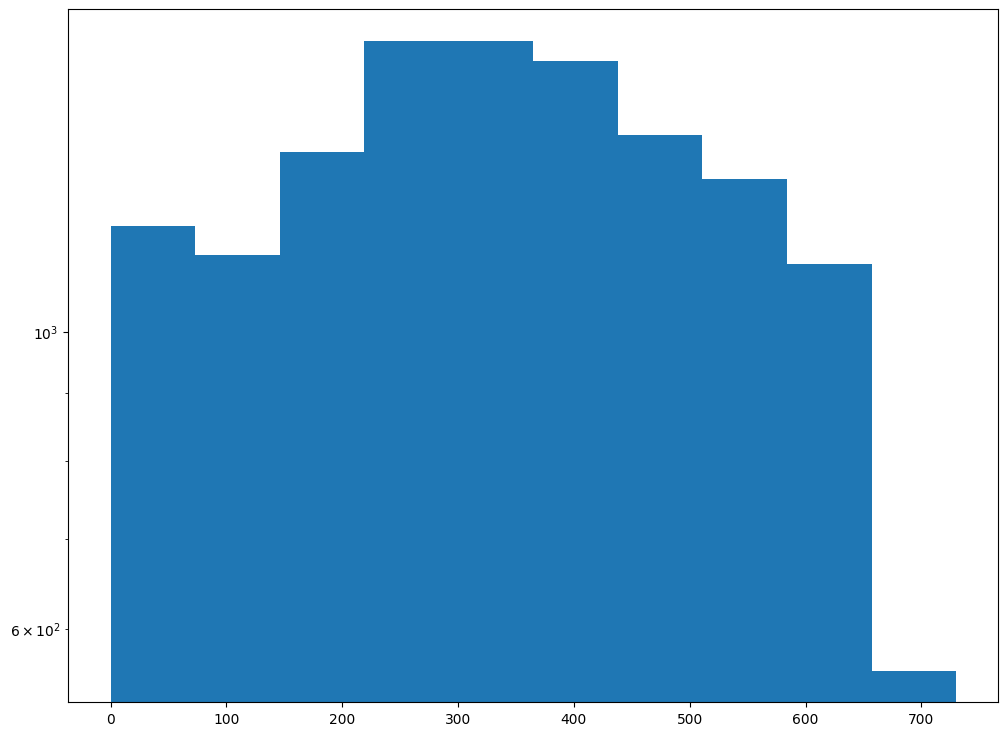

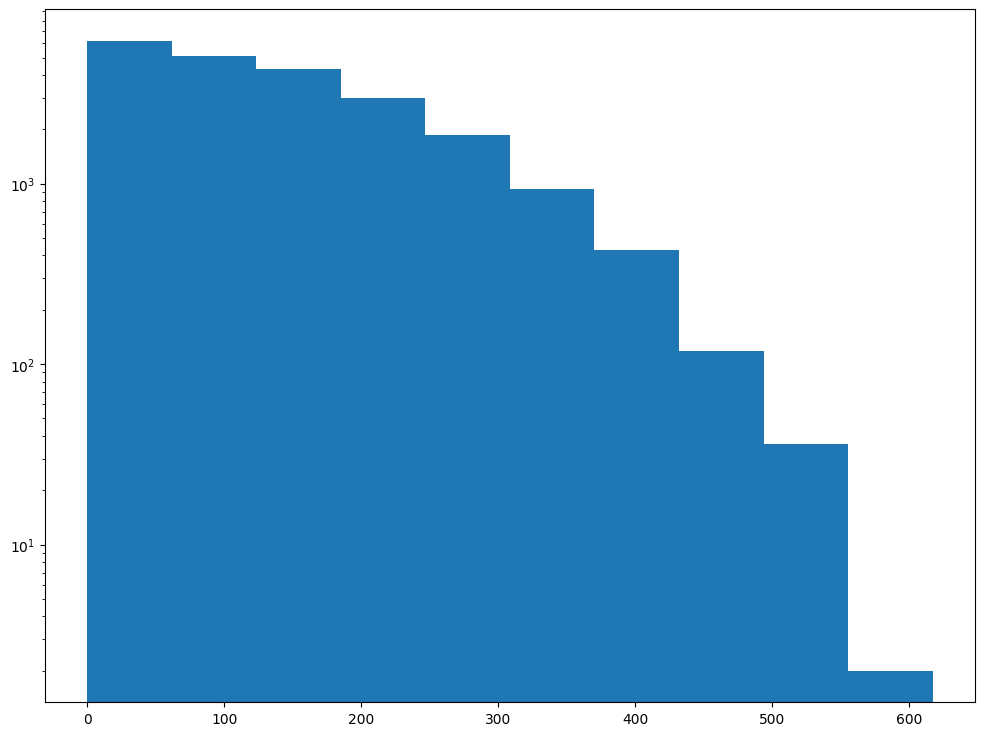

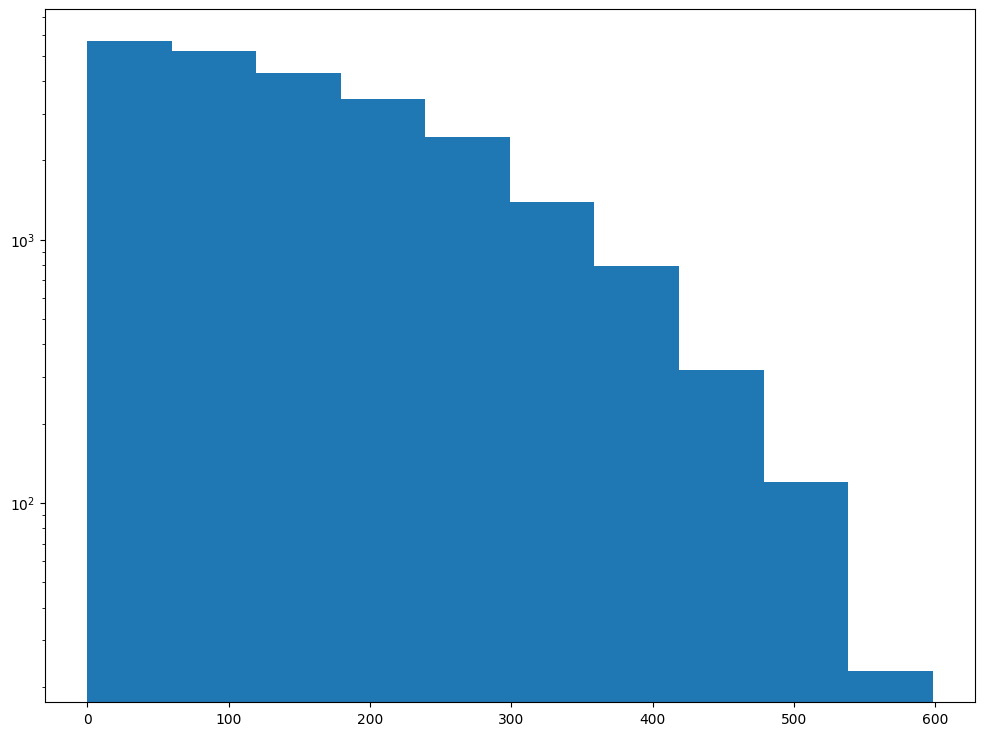

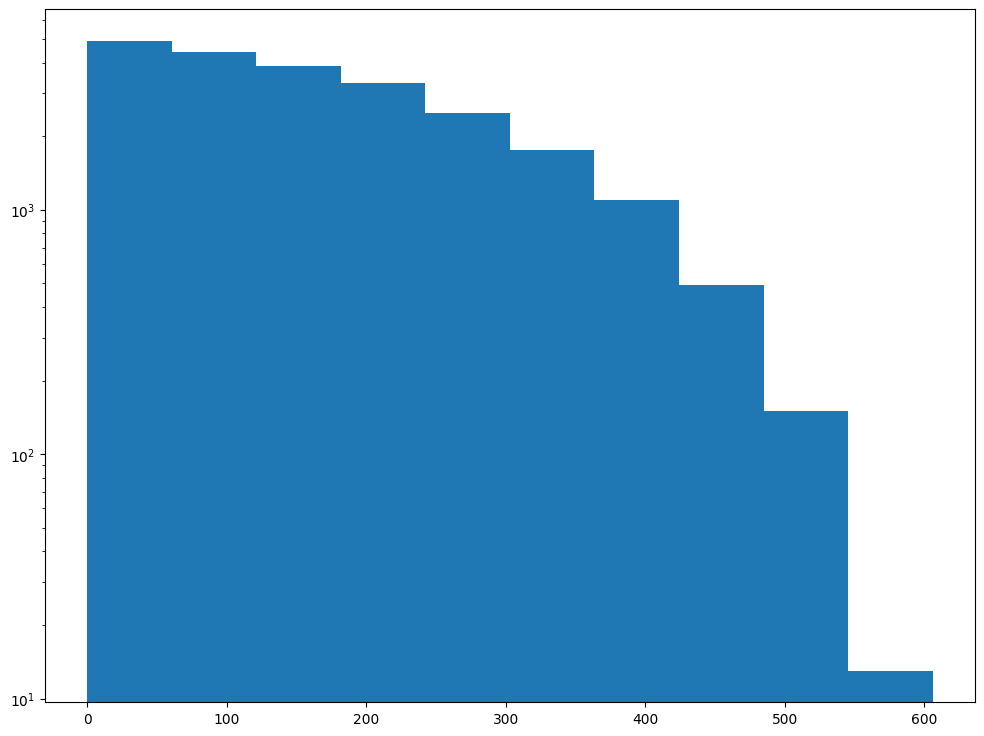

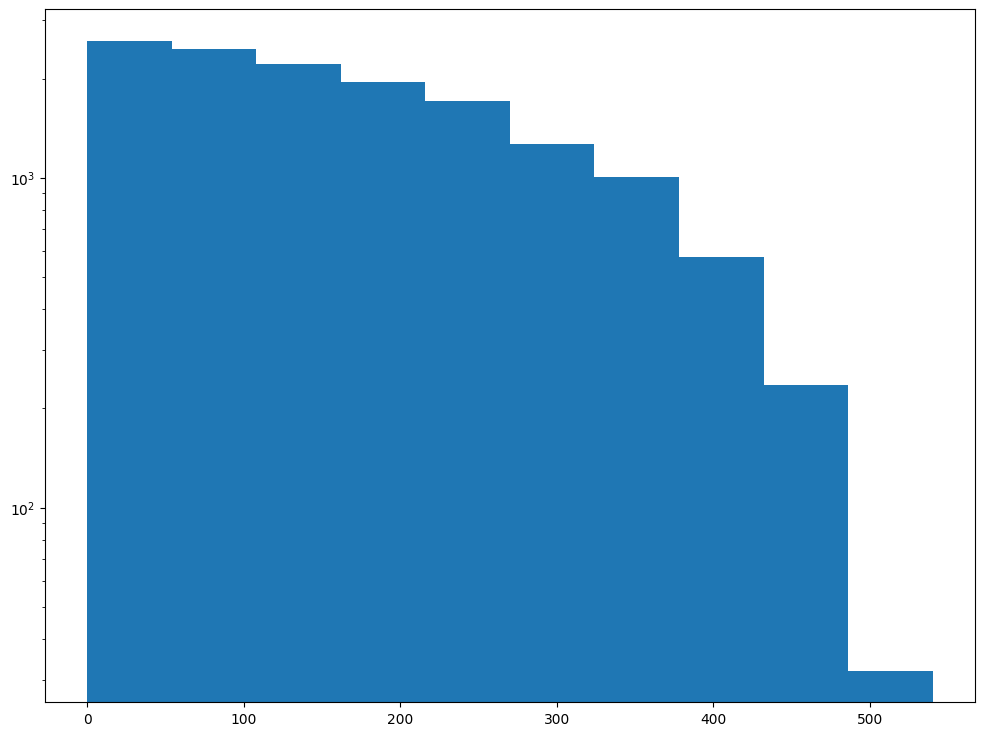

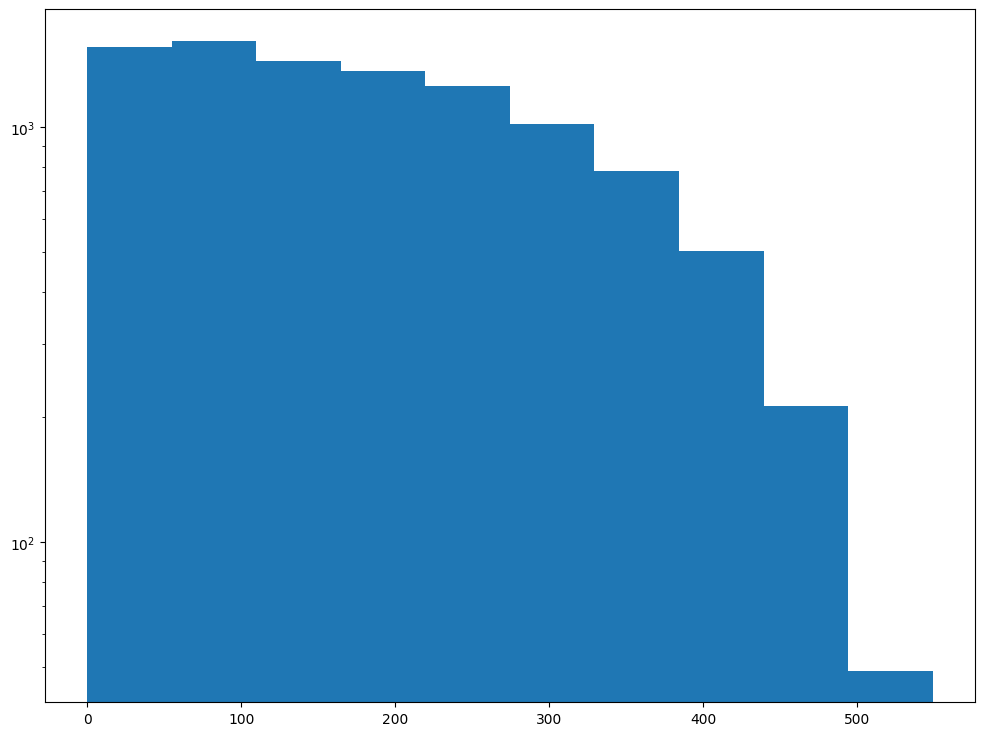

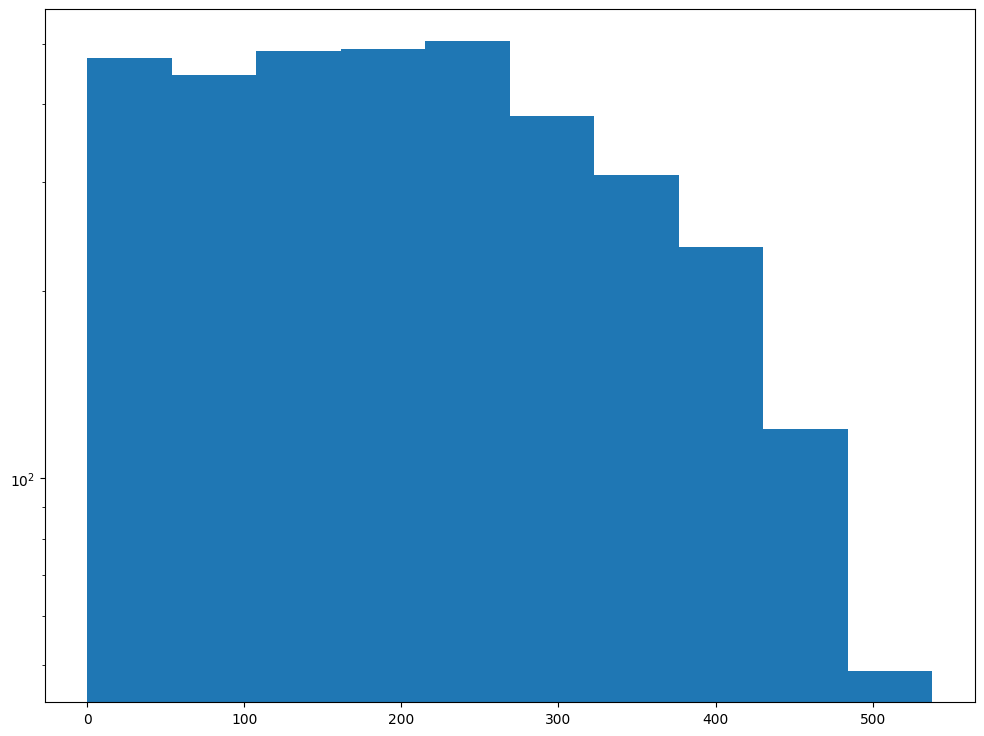

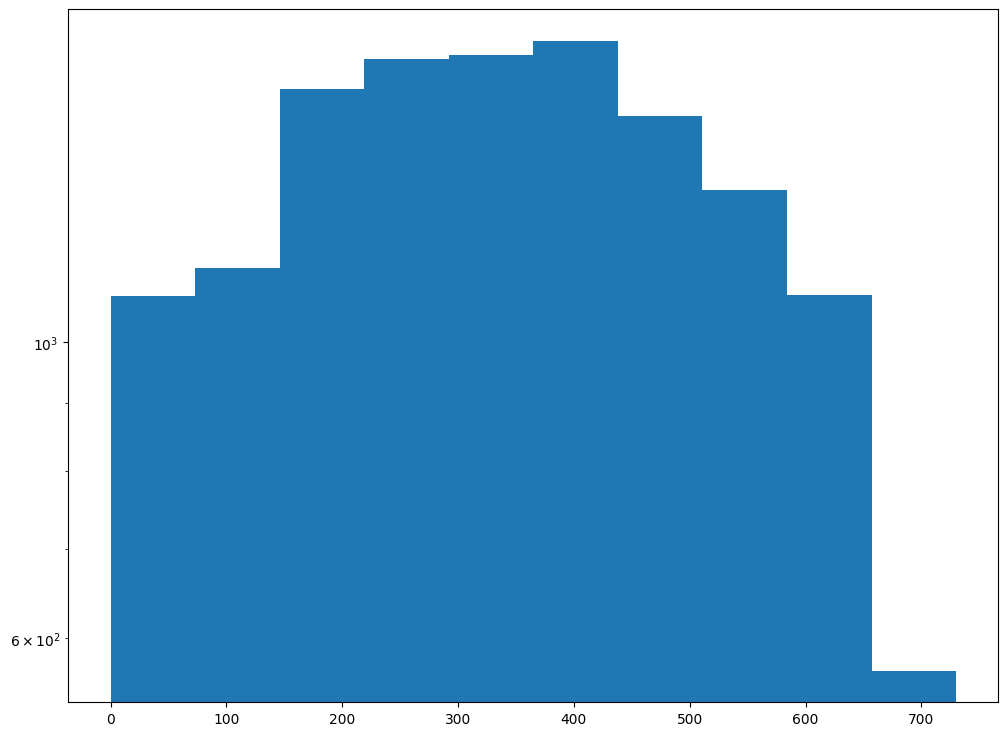

In [136]:
print("\ndPhi - all") 
dPhi = []
dPhiMatched = []
for i in range(0,len(doubs)-1,2):
    L = (doubs[i],doubs[i+1])
    plt.figure()
    try:
        cut = layerPairsMap[L] & real_doublets & (pixeltrack_doublets["deltaPhi"] < 1000)
        plt.hist(pixeltrack_doublets[cut]["deltaPhi"],log=True)
        zOneMax = np.max(pixeltrack_doublets[cut]["deltaPhi"])
        #cut = matched & cut
        #zOneMaxMatched = pixeltrack_doublets[cut]["zOne"].max()
        dPhi.append(round(zOneMax-10))


        cut = layerPairsMap[L] & real_doublets & (pixeltrack_doublets["deltaPhi"] < 1000)
        zOneMax = np.max(pixeltrack_doublets[cut]["deltaPhi"])
        #cut = matched & cut
        #zOneMaxMatched = pixeltrack_doublets[cut]["zOne"].max()
        dPhiMatched.append(round(zOneMax-10))
        #plt.hist(pixeltrack_doublets[cut]["deltaPhi"],log=True)
        #plt.plot([zOneMax,zOneMax],[1e1,1.5e4])
        #print("%.1f"%round(zOneMax-10),end=",")
        if(zOneMax-10<=522):
            print("phi0p05",end=",")
        elif(zOneMax-10<=626):
            print("phi0p06",end=",")
        else:
            print("phi0p07",end=",")
    except:
        #print("-999.",end=",")
        print("phi0p05",end=",")

Rejection:
0.24608790457052465
Efficiency:
0.9887309553144815


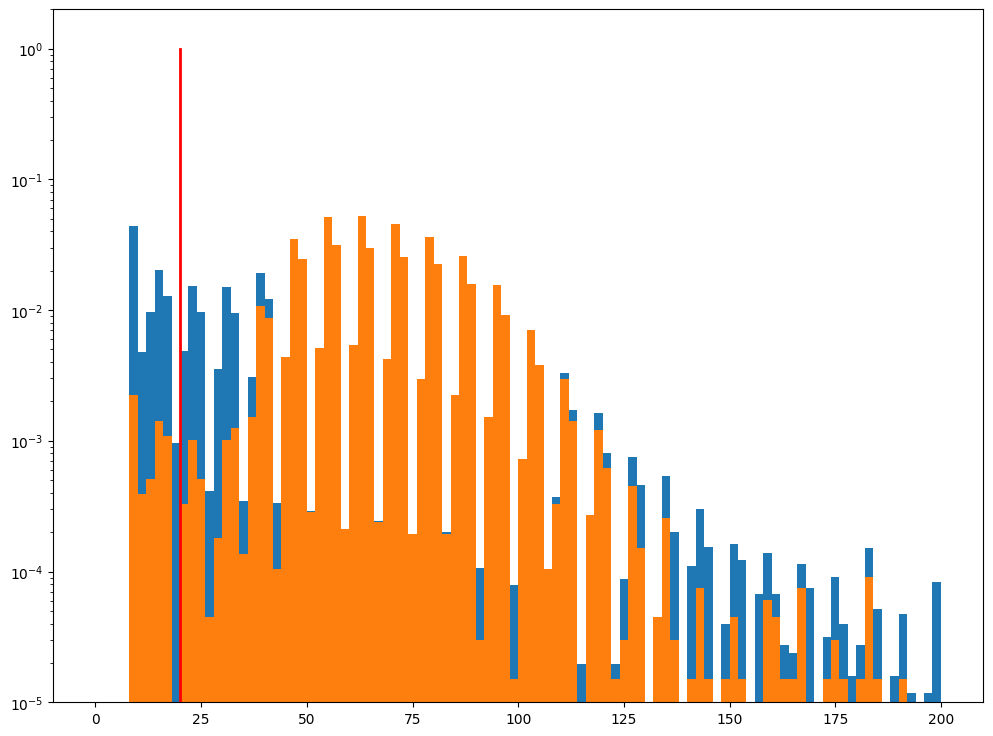

In [99]:
minSize = 20;
#clusterCut = (pixeltrack_doublets["sizeYOne"]>minYsizeB1) | (pixeltrack_doublets["sizeYOne"]<0);
cut = (pixeltrack_doublets["layerOne"]==0) & (pixeltrack_doublets["sizeYOne"]>=0) & (pixeltrack_doublets["sizeYTwo"]>=0) & (pixeltrack_doublets["layerTwo"]>3)
B = 100
R = (0,200)
plt.hist(pixeltrack_doublets[cut]["sizeYOne"],bins=B,range=R,log=True,density=True);
plt.hist(pixeltrack_doublets[cut & matched]["sizeYOne"],bins=B,range=R,log=True,density=True);

clusterCut = cut & (pixeltrack_doublets["sizeYOne"]>=minSize)

print("Rejection:")
print(1.0 - pixeltrack_doublets[clusterCut & (~matched)].shape[0] / pixeltrack_doublets[cut & (~matched)].shape[0])

print("Efficiency:")
print(pixeltrack_doublets[(matched) & clusterCut].shape[0] / pixeltrack_doublets[(matched & cut)].shape[0])


plt.ylim(1e-5,2)
plt.plot([minSize,minSize],[1e-5,1],"-",color="red",lw=2)

Rejection:
0.3421330238936653
Efficiency:
0.9952850592611817


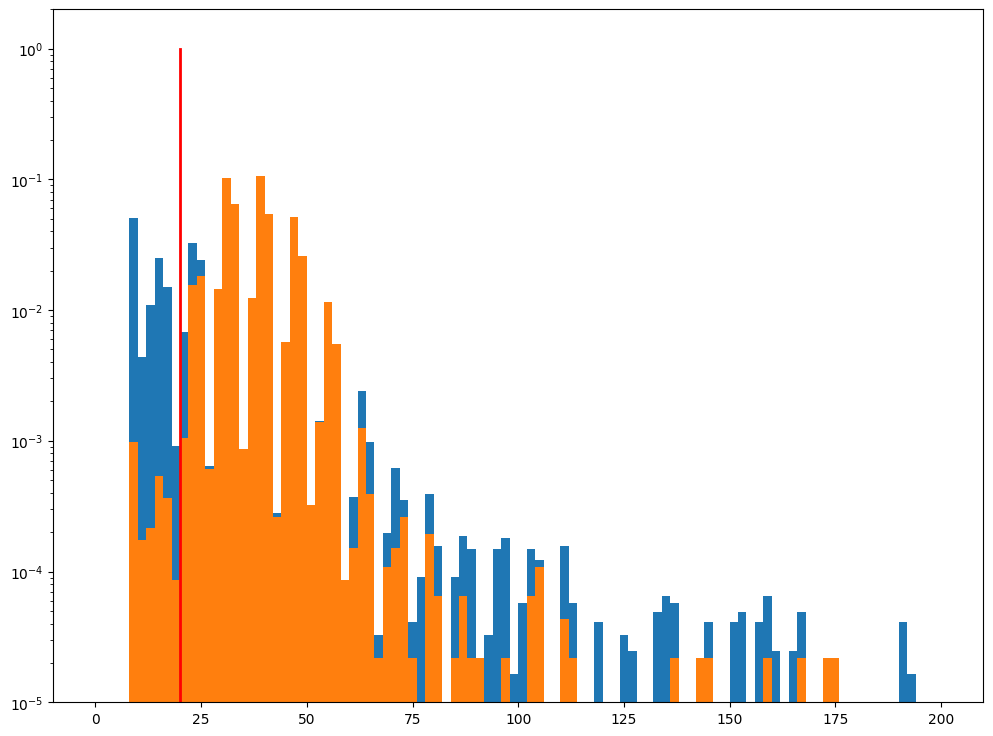

In [102]:
minSize = 20;
#clusterCut = (pixeltrack_doublets["sizeYOne"]>minYsizeB1) | (pixeltrack_doublets["sizeYOne"]<0);
cut = (pixeltrack_doublets["layerOne"]==1) & (pixeltrack_doublets["sizeYOne"]>=0) & (pixeltrack_doublets["sizeYTwo"]>=0) & (pixeltrack_doublets["layerTwo"]>3)
B = 100
R = (0,200)
plt.hist(pixeltrack_doublets[cut]["sizeYOne"],bins=B,range=R,log=True,density=True);
plt.hist(pixeltrack_doublets[cut & matched]["sizeYOne"],bins=B,range=R,log=True,density=True);

clusterCut = cut & (pixeltrack_doublets["sizeYOne"]>=minSize)

print("Rejection:")
print(1.0 - pixeltrack_doublets[clusterCut & (~matched)].shape[0] / pixeltrack_doublets[cut & (~matched)].shape[0])

print("Efficiency:")
print(pixeltrack_doublets[(matched) & clusterCut].shape[0] / pixeltrack_doublets[(matched & cut)].shape[0])


plt.ylim(1e-5,2)
plt.plot([minSize,minSize],[1e-5,1],"-",color="red",lw=2)

In [46]:
minYsizeB1 = 36;
minYsizeB2 = 28;
maxDYsize12 = 28;
maxDYsize = 20;
maxDYPred = 20;
dzdrFact = 8 * 0.0285 / 0.015; 

Rejection:
0.21590754176827887
Efficiency:
0.990581779079684


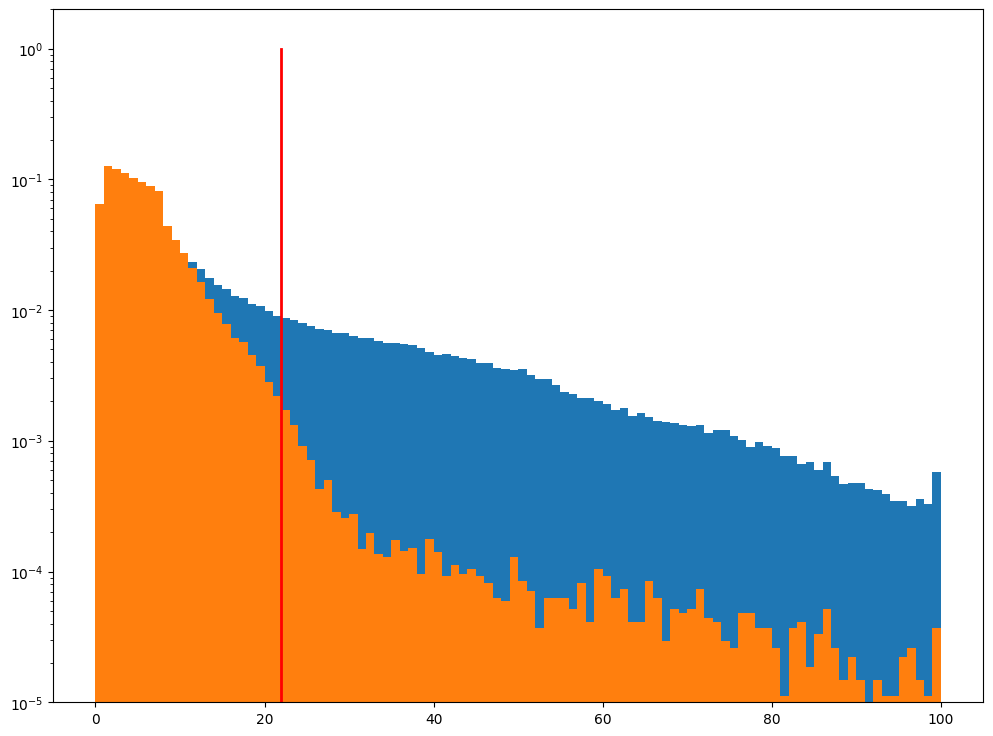

In [96]:
minSize = 22
cut = (pixeltrack_doublets["layerOne"]<4) & (pixeltrack_doublets["sizeYOne"]>0)
plt.hist(pixeltrack_doublets[cut]["cCut"],range=(0,100),log=True,bins=100,density=True);
plt.hist(pixeltrack_doublets[cut & matched]["cCut"],range=(0,100),log=True,bins=100,density=True);
plt.ylim(1,1e6)

clusterCut = cut & (pixeltrack_doublets["cCut"]<=minSize)

print("Rejection:")
print(1.0 - pixeltrack_doublets[clusterCut].shape[0] / pixeltrack_doublets[cut].shape[0])

print("Efficiency:")
print(pixeltrack_doublets[(matched) & clusterCut].shape[0] / pixeltrack_doublets[(matched & cut)].shape[0])



plt.ylim(1e-5,2)
plt.plot([minSize,minSize],[1e-5,1],"-",color="red",lw=2)

Rejection:
0.13553609758651375
Efficiency:
0.9903697722468948


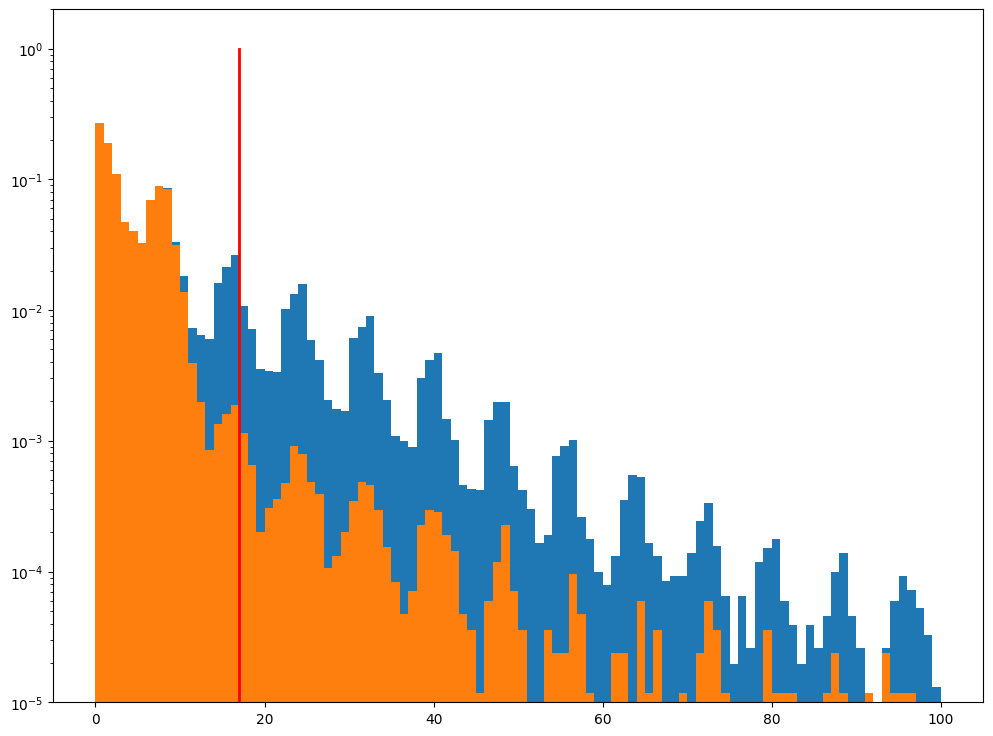

In [95]:
cut = (pixeltrack_doublets["layerOne"]==0) & (pixeltrack_doublets["layerTwo"]<4) & (pixeltrack_doublets["sizeYOne"]>0) & (pixeltrack_doublets["sizeYTwo"]>0)
plt.hist(pixeltrack_doublets[cut]["dC"],range=(0,100),log=True,bins=100,density=True);
plt.hist(pixeltrack_doublets[cut & matched]["dC"],range=(0,100),log=True,bins=100,density=True);
plt.ylim(1e-5,2)

minSize = 17 

clusterCut = cut & (pixeltrack_doublets["dC"]<=minSize)

print("Rejection:")
print(1.0 - pixeltrack_doublets[clusterCut].shape[0] / pixeltrack_doublets[cut].shape[0])

print("Efficiency:")
print(pixeltrack_doublets[(matched) & clusterCut].shape[0] / pixeltrack_doublets[(matched & cut)].shape[0])



plt.plot([minSize,minSize],[1e-5,1],"-",color="red",lw=2)

Rejection:
0.06213733936136134
Efficiency:
0.9914780180256421


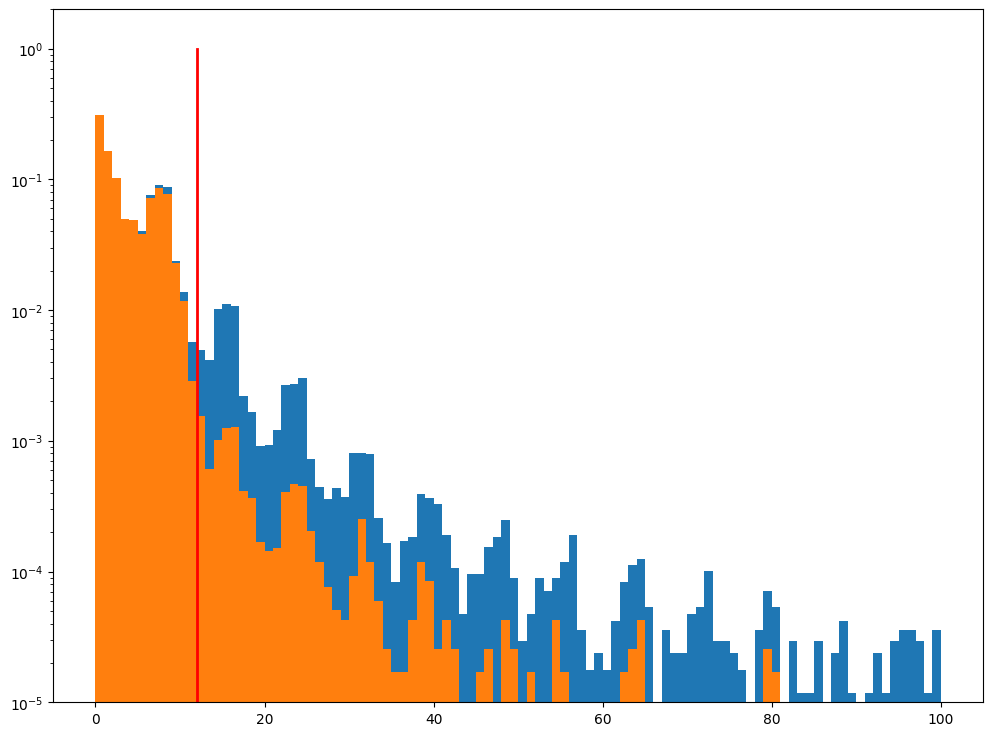

In [104]:
cut = (pixeltrack_doublets["layerOne"]>0) & (pixeltrack_doublets["layerTwo"]<4) & (pixeltrack_doublets["sizeYOne"]>0) & (pixeltrack_doublets["sizeYTwo"]>0)
plt.hist(pixeltrack_doublets[cut]["dC"],range=(0,100),log=True,bins=100,density=True);
plt.hist(pixeltrack_doublets[cut & matched]["dC"],range=(0,100),log=True,bins=100,density=True);
plt.ylim(1e-5,2)

minSize = 12

clusterCut = cut & (pixeltrack_doublets["dC"]<=minSize)

print("Rejection:")
print(1.0 - pixeltrack_doublets[clusterCut].shape[0] / pixeltrack_doublets[cut].shape[0])

print("Efficiency:")
print(pixeltrack_doublets[(matched) & clusterCut].shape[0] / pixeltrack_doublets[(matched & cut)].shape[0])



plt.plot([minSize,minSize],[1e-5,1],"-",color="red",lw=2)

## Tracks

In [340]:
hitcols = ["x","y","z","key","pdg","sizeY","sizeX","moduleId"]
pixel_tracks_columns = ["dummy"]
for i in range(18):
    pixel_tracks_columns = pixel_tracks_columns + [ f + str(i) for f in hitcols]
pixel_tracks_columns = pixel_tracks_columns + ["nHits","chi2","pt","eta","zip","tip","matchedHits"]

In [341]:
pixel_tracks = pd.read_csv("phase2_tracks",sep=";", names=pixel_tracks_columns,error_bad_lines=False)
pixel_tracks = pixel_tracks.drop(["dummy"],axis=1)

In [342]:
pixel_tracks.head()

,x0,y0,z0,key0,pdg0,sizeY0,sizeX0,moduleId0,x1,y1,...,sizeY17,sizeX17,moduleId17,nHits,chi2,pt,eta,zip,tip,matchedHits
0,2.81796,0.005400,-6.94791,1.0,-211.0,31,24,303042572,6.43215,0.102482,...,-999.9,-999.9,-999.9,5,1.092920,1.565320,-1.44059,-1.331380,0.004950,4
1,2.80900,0.045117,-10.89830,144559.0,321.0,22,20,303042572,6.44266,0.013236,...,-999.9,-999.9,-999.9,4,0.278682,1.401410,-1.28055,-6.233920,0.003759,3
2,2.80881,0.045948,-7.59433,128265.0,211.0,11,30,303042572,6.44266,0.013236,...,-999.9,-999.9,-999.9,4,0.917468,0.861522,-1.67269,-0.379794,0.048267,0
3,2.77935,0.176444,-7.05535,156824.0,-211.0,45,22,303042572,6.38315,0.518549,...,-999.9,-999.9,-999.9,6,0.476945,1.201490,-1.89045,1.956450,0.002341,5
4,2.75689,0.275962,-10.66220,145202.0,211.0,47,24,303042572,6.37399,0.596353,...,-999.9,-999.9,-999.9,4,11.413100,1.016650,-1.30349,-5.941200,0.068491,0


In [343]:
for I in tqdm.tqdm(range(18)):  

    pixel_tracks["layer"+str(I)] = 0

    for i,L in enumerate(det_id_map.detid.values):
        pixel_tracks.loc[(pixel_tracks["moduleId" + str(I)] == L),"layer" + str(I)] = det_id_map["layer"].values[i]


100%|██████████| 18/18 [01:37<00:00,  5.44s/it]


In [344]:
pixel_tracks["fraction"] = pixel_tracks["matchedHits"]/pixel_tracks["nHits"]
pixel_tracks["matched"] = pixel_tracks["fraction"]>=0.75
pixel_tracks.head()

,x0,y0,z0,key0,pdg0,sizeY0,sizeX0,moduleId0,x1,y1,...,layer10,layer11,layer12,layer13,layer14,layer15,layer16,layer17,fraction,matched
0,2.81796,0.005400,-6.94791,1.0,-211.0,31,24,303042572,6.43215,0.102482,...,0,0,0,0,0,0,0,0,0.800000,True
1,2.80900,0.045117,-10.89830,144559.0,321.0,22,20,303042572,6.44266,0.013236,...,0,0,0,0,0,0,0,0,0.750000,True
2,2.80881,0.045948,-7.59433,128265.0,211.0,11,30,303042572,6.44266,0.013236,...,0,0,0,0,0,0,0,0,0.000000,False
3,2.77935,0.176444,-7.05535,156824.0,-211.0,45,22,303042572,6.38315,0.518549,...,0,0,0,0,0,0,0,0,0.833333,True
4,2.75689,0.275962,-10.66220,145202.0,211.0,47,24,303042572,6.37399,0.596353,...,0,0,0,0,0,0,0,0,0.000000,False


In [345]:
matched_tracks = pixel_tracks["matched"]==True
chi_cut = pixel_tracks["chi2"]<15.0
fitted_tracks = pixel_tracks["pt"] > 0

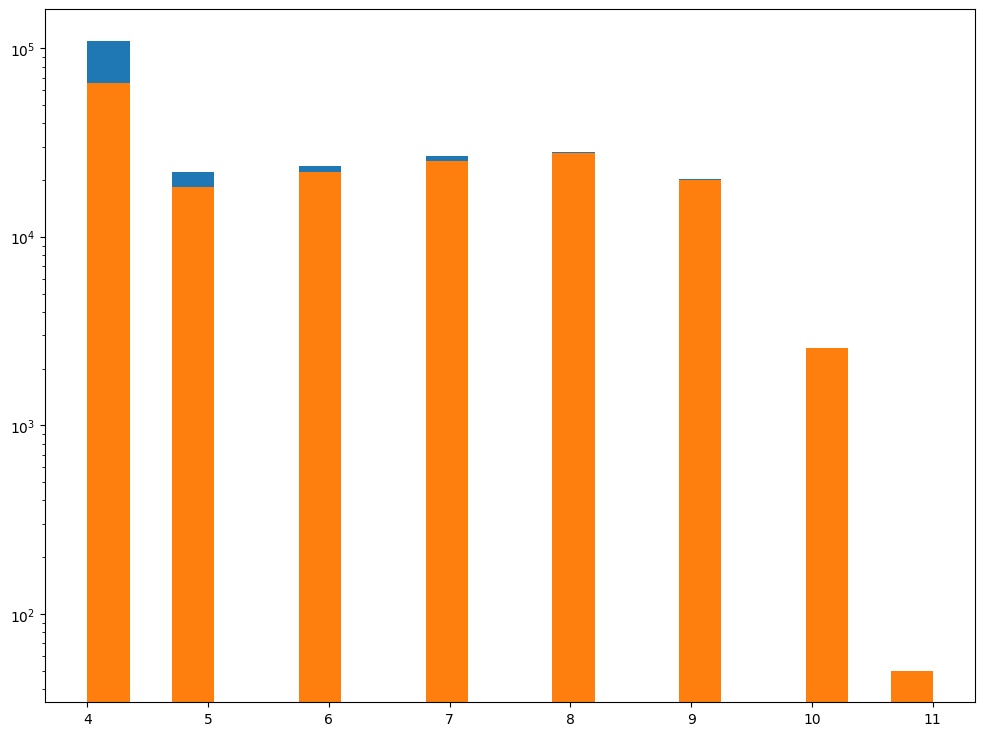

In [346]:
plt.hist(pixel_tracks["nHits"],bins=20,log=True);
plt.hist(pixel_tracks[matched_tracks]["nHits"],bins=20,log=True);

Rejection:
0.37263932783473364
Efficiency:
0.994736464603552


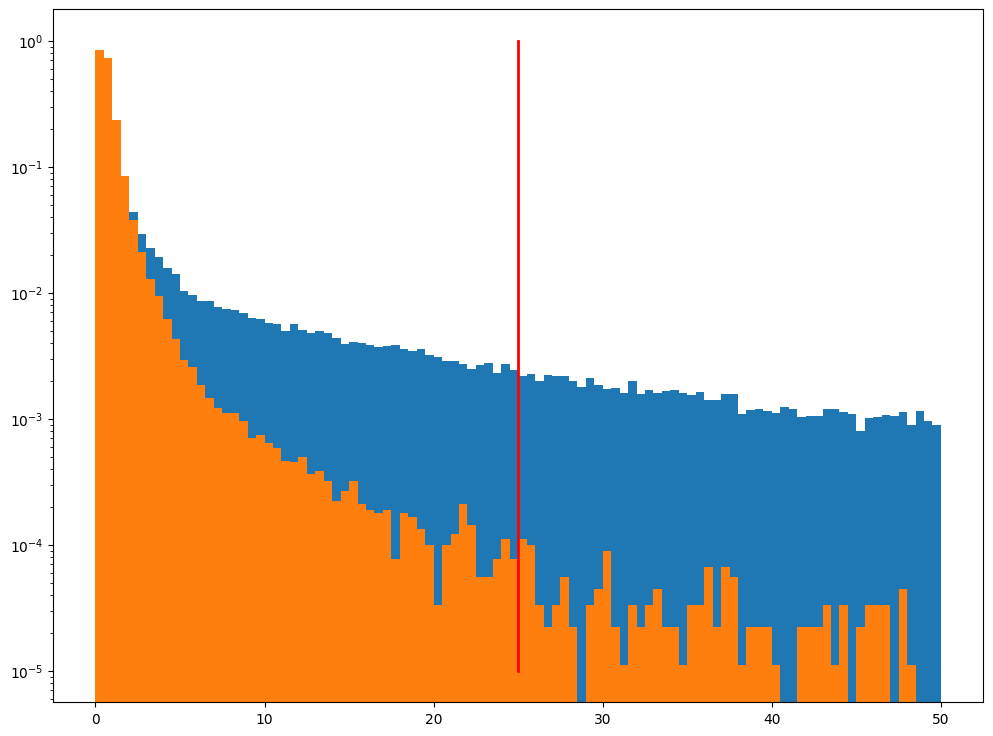

In [347]:
plt.hist(pixel_tracks["chi2"],bins=100,range=(0,50.),log=True,density=True);
plt.hist(pixel_tracks[matched_tracks]["chi2"],bins=100,range=(0,50.),log=True,density=True);

minSize = 25

chiCut = (pixel_tracks["chi2"]<=minSize)

print("Rejection:")
print(1.0 - pixel_tracks[chiCut & (~matched_tracks)].shape[0] / pixel_tracks[(~matched_tracks)].shape[0])

print("Efficiency:")
print(pixel_tracks[(matched_tracks) & chiCut & fitted_tracks].shape[0] / pixel_tracks[fitted_tracks & (matched_tracks)].shape[0])



plt.plot([minSize,minSize],[1e-5,1],"-",color="red",lw=2)

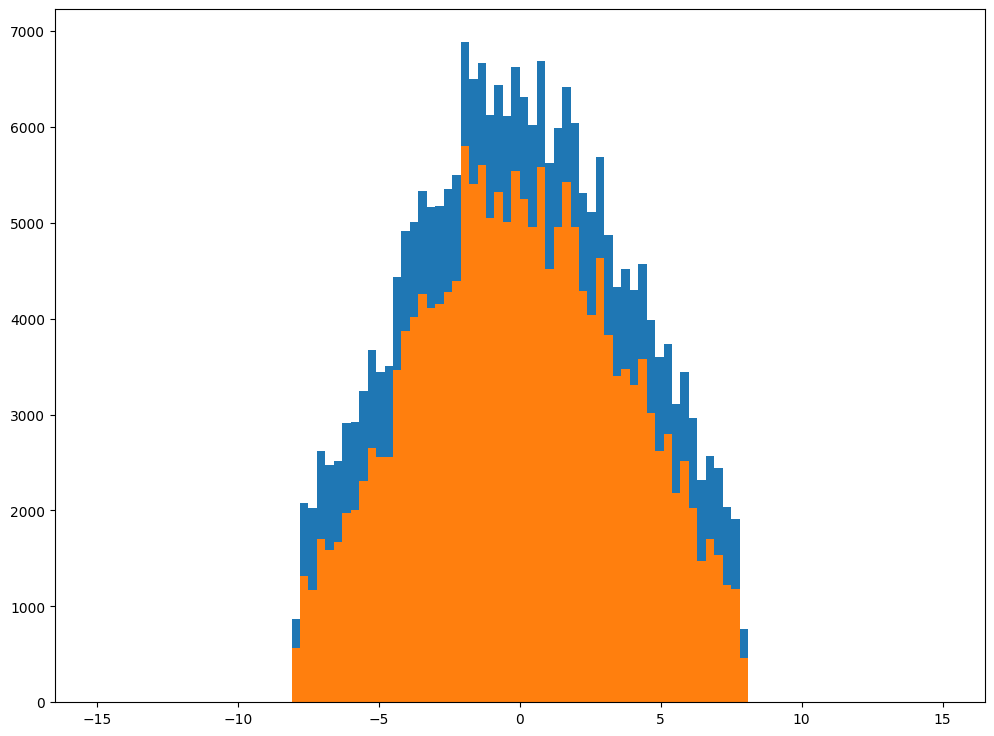

In [348]:
plt.hist(pixel_tracks[fitted_tracks]["zip"],bins=100,range=(-15,15.),log=False);
plt.hist(pixel_tracks[matched_tracks & fitted_tracks]["zip"],bins=100,range=(-15,15.),log=False);

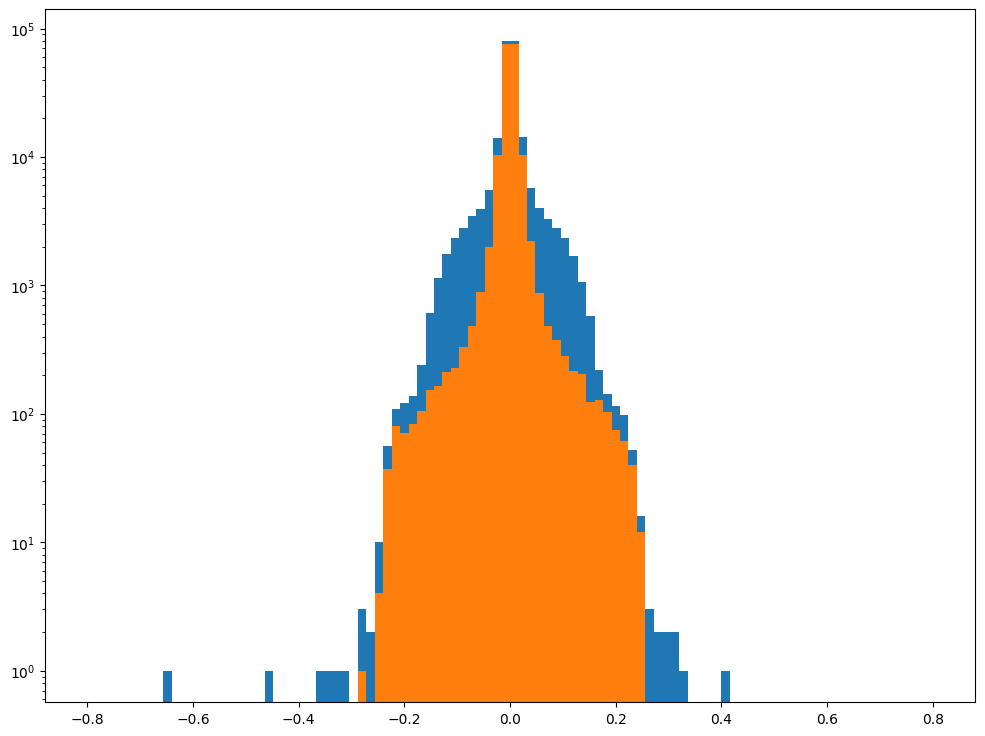

In [349]:
plt.hist(pixel_tracks[fitted_tracks]["tip"],bins=100,range=(-.8,.8),log=True);
plt.hist(pixel_tracks[fitted_tracks & matched_tracks]["tip"],bins=100,range=(-.8,.8),log=True);

<ipython-input-350-295eaff7e037>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(pixel_tracks[fitted_tracks][matched_tracks]["eta"],bins=100,range=(-4.5,4.5),log=False);


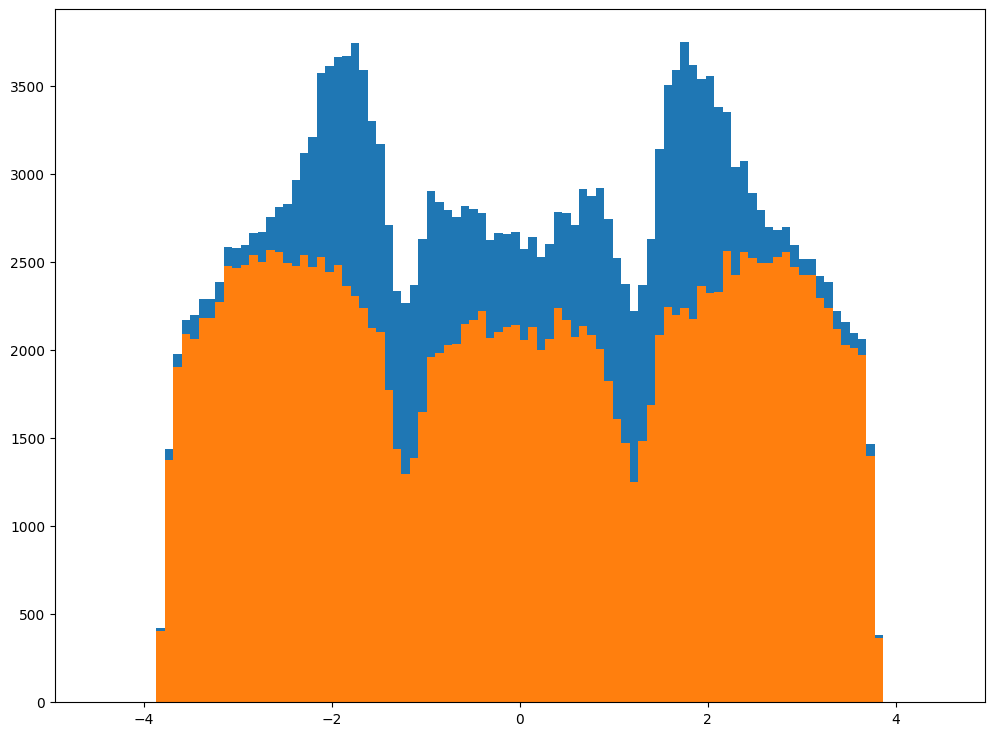

In [350]:
plt.hist(pixel_tracks[fitted_tracks]["eta"],bins=100,range=(-4.5,4.5),log=False);
plt.hist(pixel_tracks[fitted_tracks][matched_tracks]["eta"],bins=100,range=(-4.5,4.5),log=False);

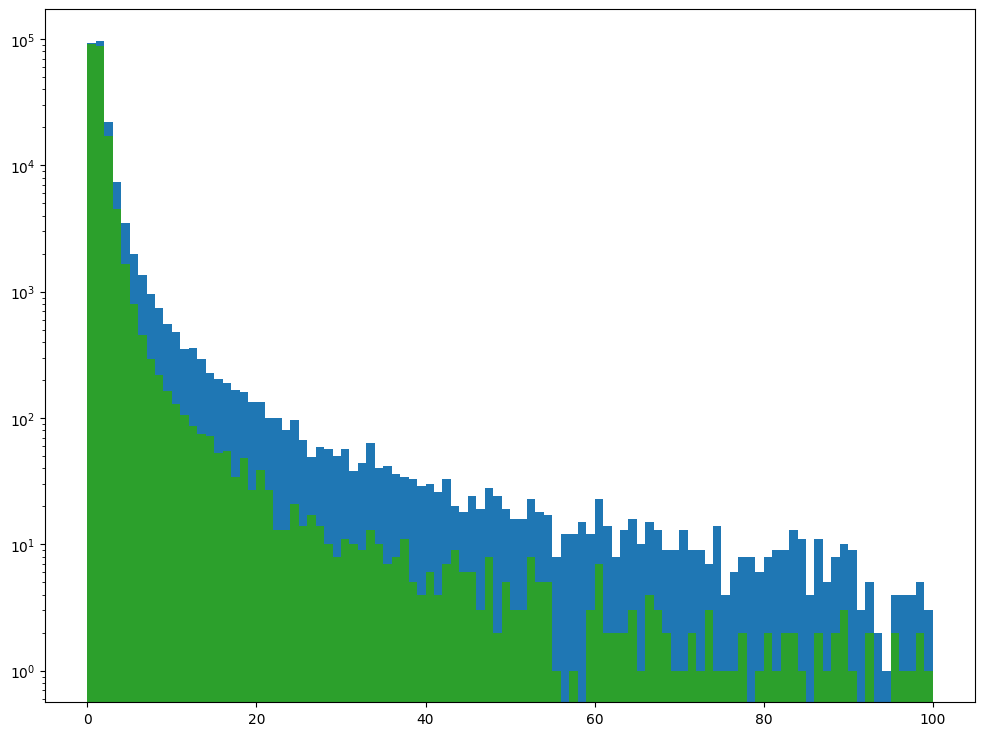

In [339]:
plt.hist(pixel_tracks["pt"],bins=100,range=(0,100.),log=True);
plt.hist(pixel_tracks[matched_tracks]["pt"],bins=100,range=(0.,100.),log=True);
plt.hist(pixel_tracks[chi_cut]["pt"],bins=100,range=(0,100.),log=True);

(0.0, 100.0)

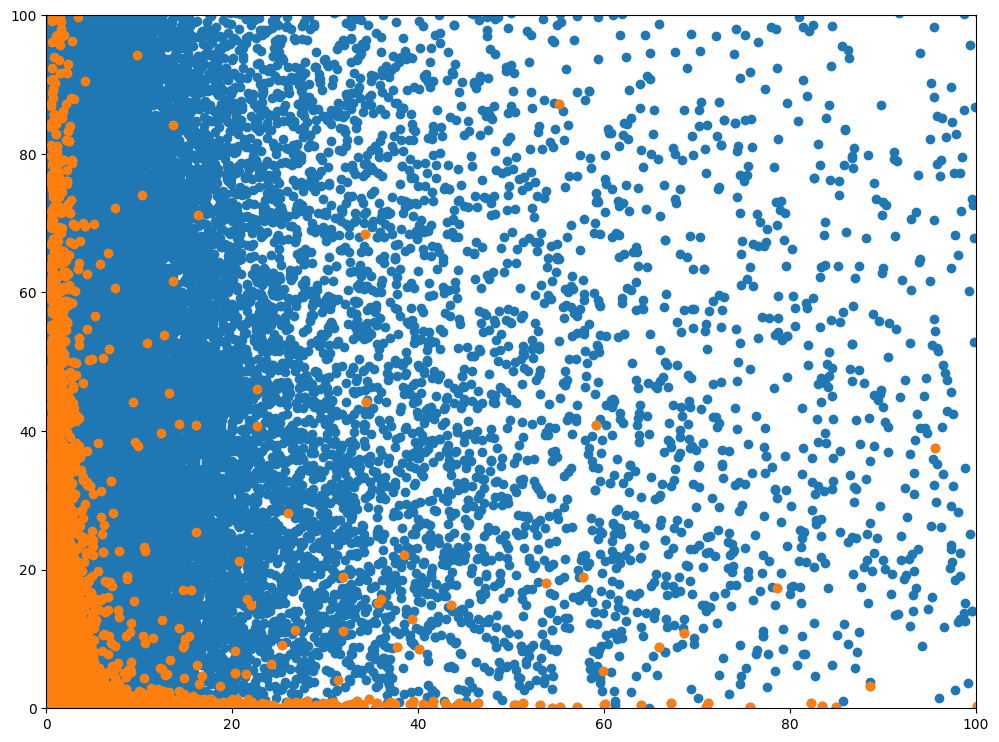

In [201]:
plt.plot(pixel_tracks["pt"],pixel_tracks["chi2"],"o")#,bins=100,range=((0,10.),(0,50)));
plt.plot(pixel_tracks[matched_tracks]["pt"],pixel_tracks[matched_tracks]["chi2"],"o")#,bins=100,range=((0.,10.),(0,50)));
plt.xlim(0,100.0)
plt.ylim(0,100.0)

In [219]:
import matplotlib

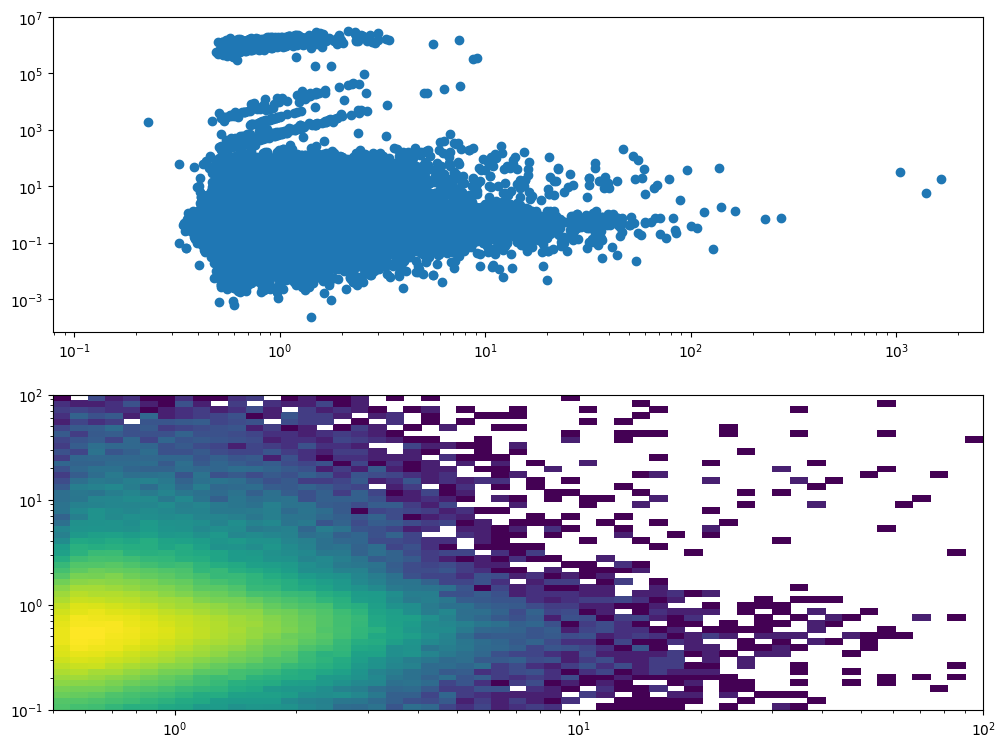

In [221]:
x = pixel_tracks[matched_tracks]["pt"]
y = pixel_tracks[matched_tracks]["chi2"]

n = 3000

x_bins = np.logspace(np.log10(0.5), np.log10(100), int(np.sqrt(n)))
y_bins = np.logspace(np.log10(0.1), np.log10(100), int(np.sqrt(n)))
H, xedges, yedges = np.histogram2d(x, y, bins=[x_bins, y_bins])

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, y, 'o')
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(212)
ax2.pcolormesh(xedges, yedges, H.T,norm=matplotlib.colors.LogNorm())
ax2.set_xscale('log')
ax2.set_yscale('log')

## Doublets Exclusion

In [351]:
pixel_tracks.head()

,x0,y0,z0,key0,pdg0,sizeY0,sizeX0,moduleId0,x1,y1,...,layer10,layer11,layer12,layer13,layer14,layer15,layer16,layer17,fraction,matched
0,2.81796,0.005400,-6.94791,1.0,-211.0,31,24,303042572,6.43215,0.102482,...,0,0,0,0,0,0,0,0,0.800000,True
1,2.80900,0.045117,-10.89830,144559.0,321.0,22,20,303042572,6.44266,0.013236,...,0,0,0,0,0,0,0,0,0.750000,True
2,2.80881,0.045948,-7.59433,128265.0,211.0,11,30,303042572,6.44266,0.013236,...,0,0,0,0,0,0,0,0,0.000000,False
3,2.77935,0.176444,-7.05535,156824.0,-211.0,45,22,303042572,6.38315,0.518549,...,0,0,0,0,0,0,0,0,0.833333,True
4,2.75689,0.275962,-10.66220,145202.0,211.0,47,24,303042572,6.37399,0.596353,...,0,0,0,0,0,0,0,0,0.000000,False


In [352]:
allLayerPairs = [(doubs[i],doubs[i+1]) for n,i in tqdm.tqdm(enumerate(range(0,len(doubs)-1,2)))]

55it [00:00, 519564.68it/s]


In [353]:
pixel_tracks["firstPair"] = -1
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    #print(i)
    cut = (pixel_tracks["layer0"] == i[0]) & (pixel_tracks["layer1"] == i[1]) 
    pixel_tracks.loc[cut,"firstPair"] = n

55it [00:00, 439.15it/s]


In [354]:
for n,i in enumerate(allLayerPairs):
    thisPair = "pair_%d_used"%n
    pixel_tracks.loc[cut,thisPair] = -1

In [355]:
for I in tqdm.tqdm(range(17)):
    thisPair = "layerPair%d"%I
    pixel_tracks[thisPair] = -1
    for n,i in enumerate(allLayerPairs):
        #print(i)
        first = "layer%d"%I
        second = "layer%d"%(I+1)
        #print(n)
        cut = (pixel_tracks[first] == i[0]) & (pixel_tracks[second] == i[1]) 
        pixel_tracks.loc[cut,thisPair] = n
        thatPair = "pair_%d_used"%n
        pixel_tracks.loc[cut,thatPair] = 1

100%|██████████| 17/17 [00:03<00:00,  5.31it/s]


In [356]:
allUsedPairs = pixel_tracks[["layerPair%d"%I for I in tqdm.tqdm(range(17))]].values

100%|██████████| 17/17 [00:00<00:00, 68958.58it/s]


In [357]:
pixel_tracks[["layer1","layer2"]].head()

,layer1,layer2
0,1,16
1,1,16
2,1,17
3,1,16
4,1,16


In [358]:
allUsedPairs

array([[ 0,  5, -1, ..., -1, -1, -1],
       [ 0,  5, 16, ..., -1, -1, -1],
       [ 0, 30, 17, ..., -1, -1, -1],
       ...,
       [27, 18, 19, ..., -1, -1, -1],
       [27, 18, 19, ..., -1, -1, -1],
       [27, 18, 19, ..., -1, -1, -1]])

In [359]:
allUsedPairs = np.array(allUsedPairs)
allUsedPairs.shape
#pixel_tracks["allUsedPairs"] = allUsedPairs

(233327, 17)

In [360]:
allUsedPairs[:5]

array([[ 0,  5, -1, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1],
       [ 0,  5, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1],
       [ 0, 30, 17, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1],
       [ 0,  5, -1, 16, 17, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1],
       [ 0,  5, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1]])

In [361]:
pixel_tracks["pair_2_used"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: pair_2_used, dtype: float64

<ipython-input-362-d20651cbd785>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pixel_tracks[matched]["firstPair"].hist(range=(-0.5,len(allLayerPairs)),bins=(2*len(allLayerPairs)+1),log=True)


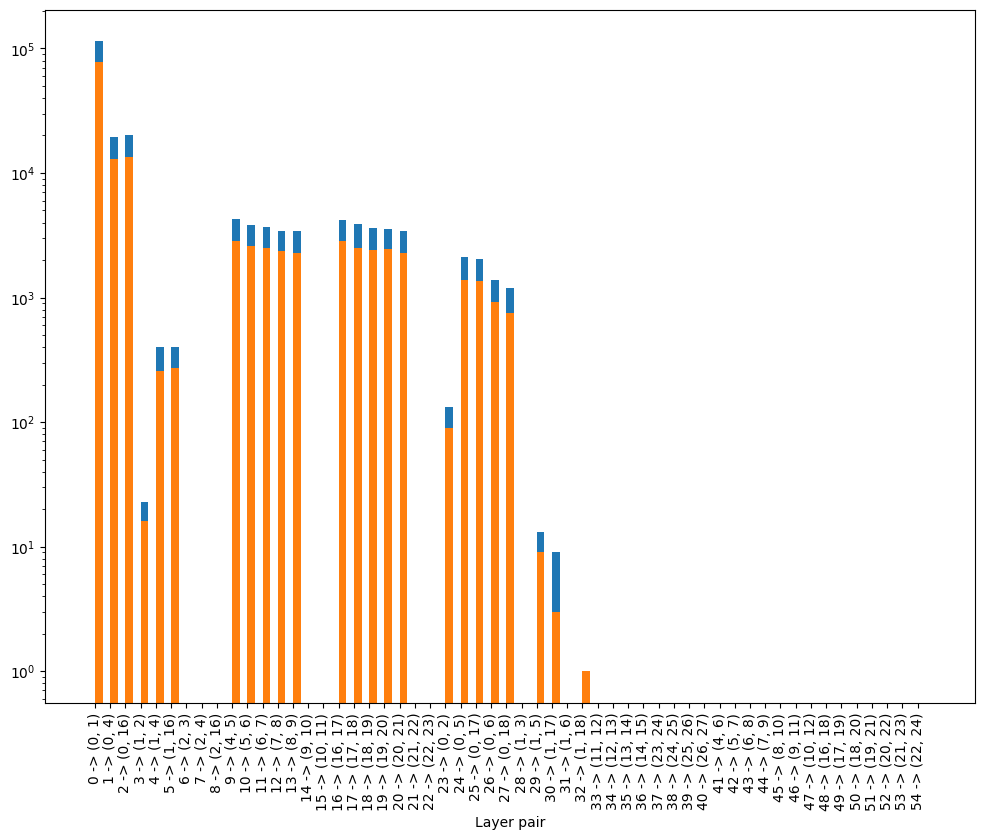

In [362]:
pixel_tracks["firstPair"].hist(range=(-0.5,len(allLayerPairs)),bins=(2*len(allLayerPairs)+1))
pixel_tracks[matched]["firstPair"].hist(range=(-0.5,len(allLayerPairs)),bins=(2*len(allLayerPairs)+1),log=True)
plt.xticks(range(len(allLayerPairs)),labels=[ str(n) + " -> " +str(f) for n,f in enumerate(allLayerPairs)]);
plt.grid(False)
plt.xlabel("Layer pair");
plt.xticks(rotation=90);

<ipython-input-363-b64be82f565d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pixel_tracks[high_eta & matched]["firstPair"].hist(range=(-0.5,len(allLayerPairs)),bins=(2*len(allLayerPairs)+1),log=True)


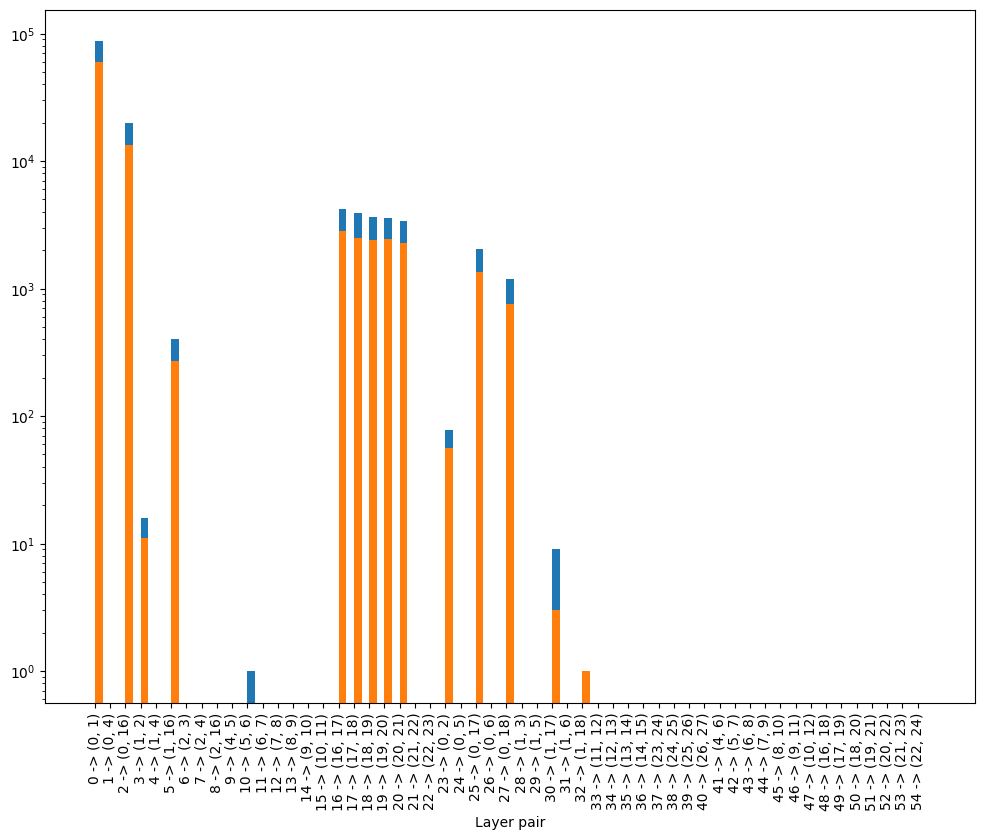

In [363]:
high_eta = pixel_tracks["eta"]<1.0
pixel_tracks[high_eta]["firstPair"].hist(range=(-0.5,len(allLayerPairs)),bins=(2*len(allLayerPairs)+1))
pixel_tracks[high_eta & matched]["firstPair"].hist(range=(-0.5,len(allLayerPairs)),bins=(2*len(allLayerPairs)+1),log=True)
plt.xticks(range(len(allLayerPairs)),labels=[ str(n) + " -> " +str(f) for n,f in enumerate(allLayerPairs)]);
plt.grid(False)
plt.xlabel("Layer pair");
plt.xticks(rotation=90);

55it [00:00, 176.51it/s]
55it [00:00, 296.99it/s]


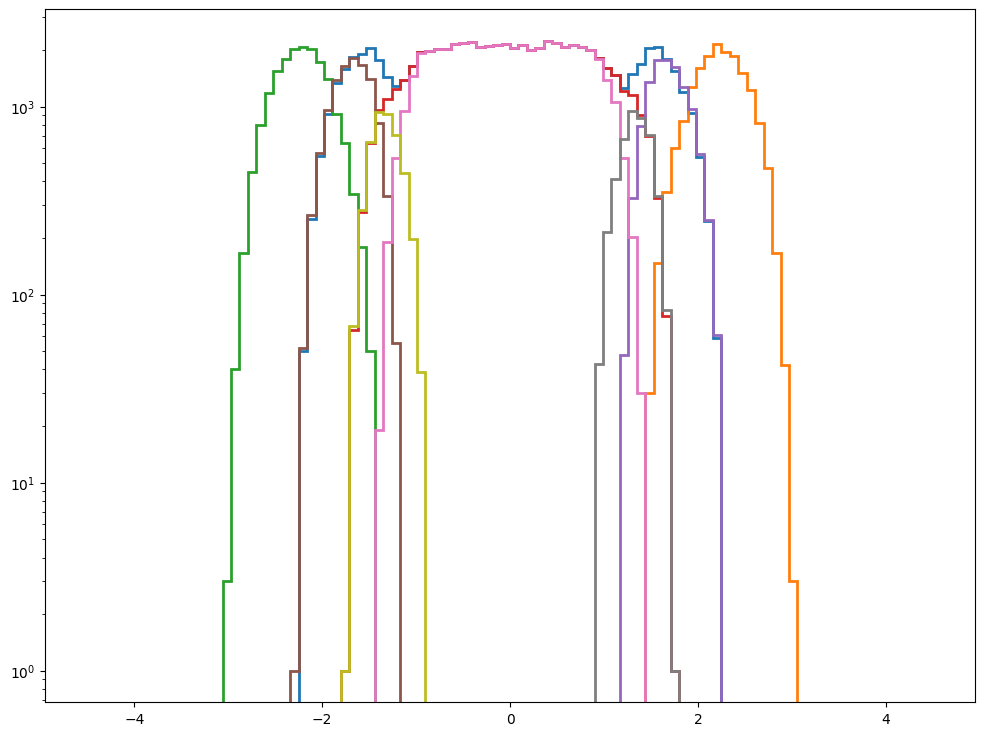

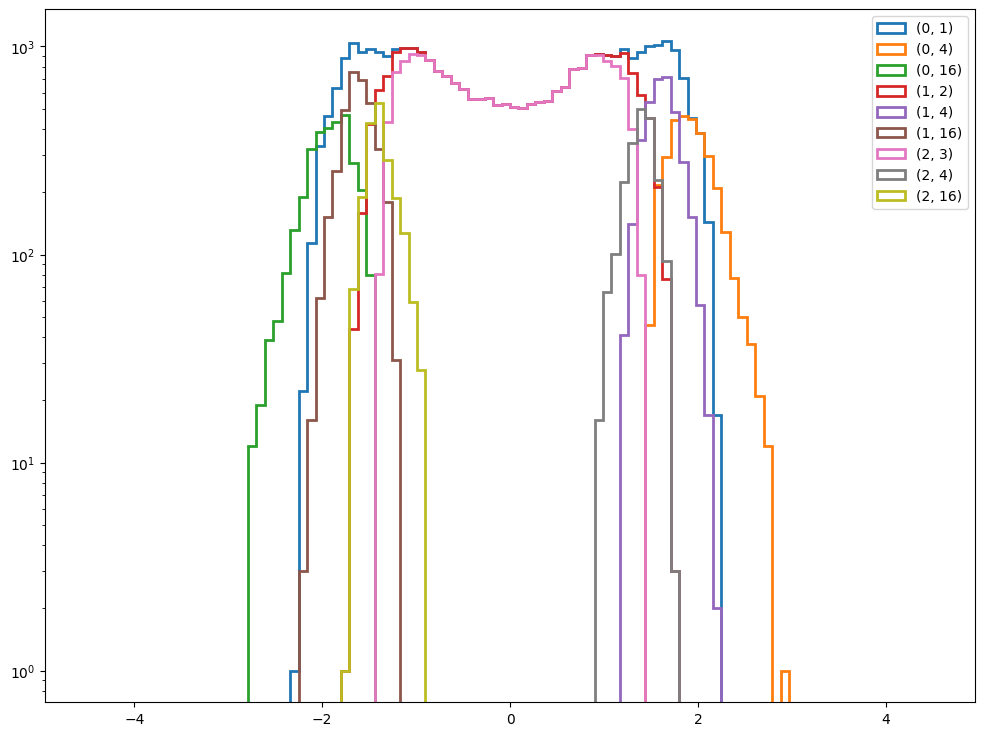

In [364]:
plt.figure()
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n >= 9:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.figure()

for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n >= 9:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[~matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.legend()

55it [00:00, 100.60it/s]
55it [00:00, 352.73it/s]


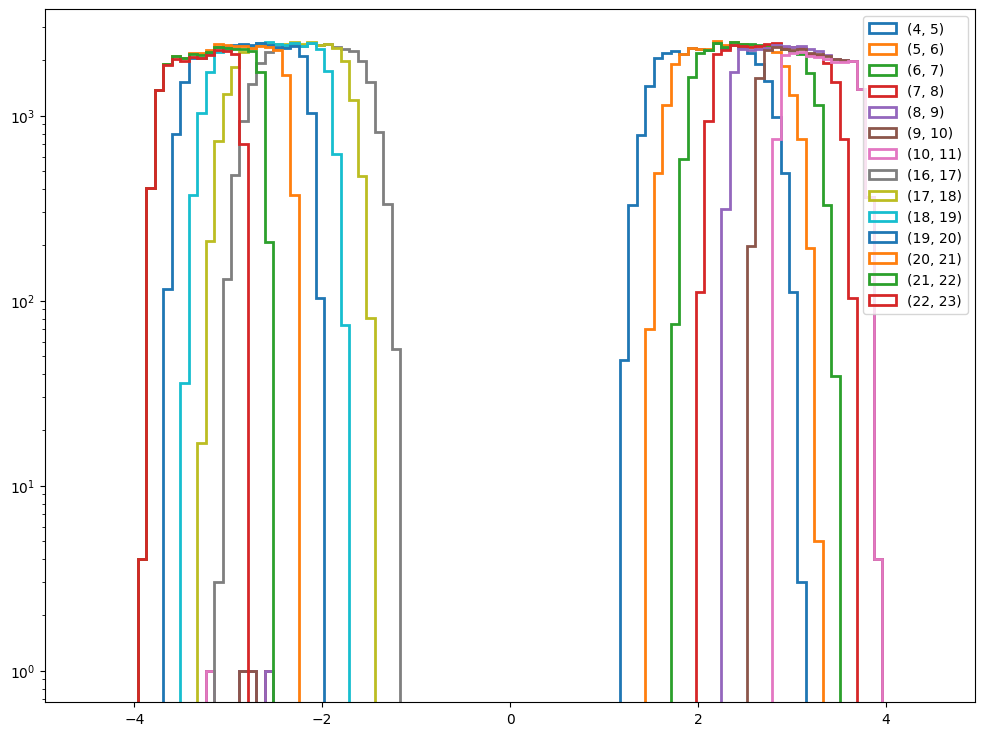

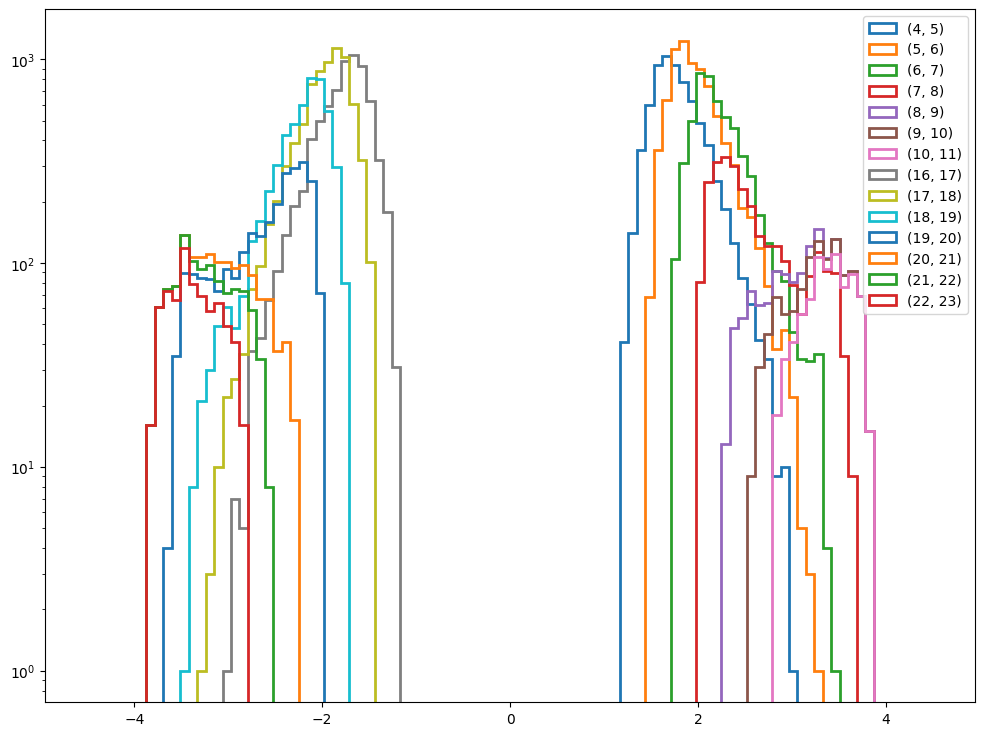

In [365]:
plt.figure()
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n < 9 or n >= 23:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.legend()

plt.figure()
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n < 9 or n >= 23:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[~matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.legend()

55it [00:00, 1188.42it/s]
55it [00:00, 923.10it/s]


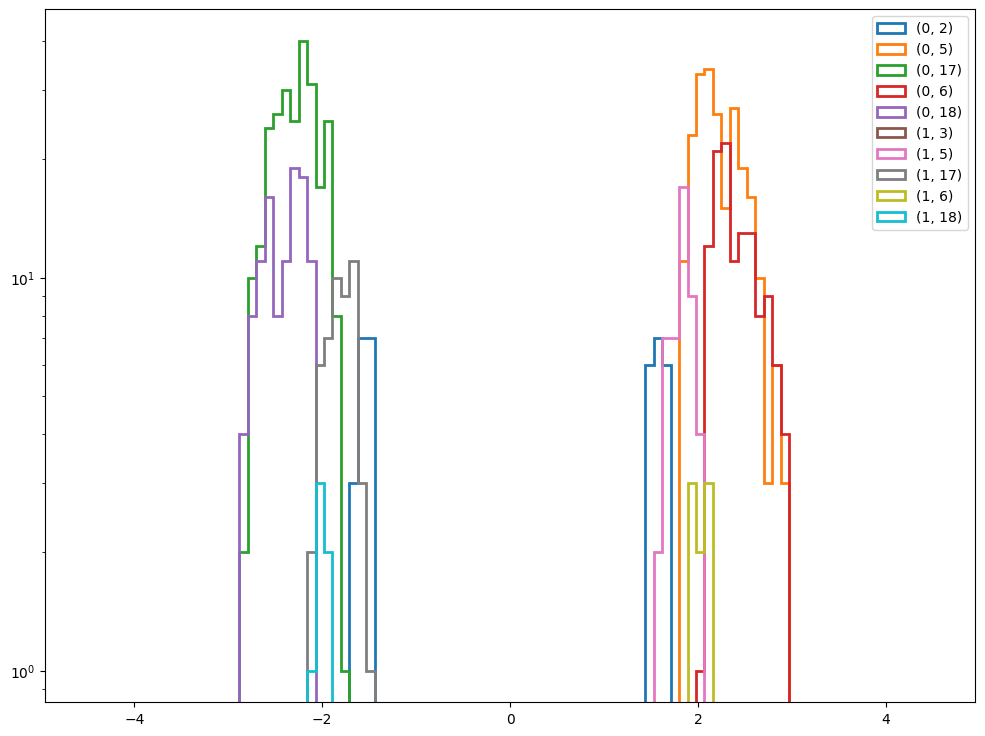

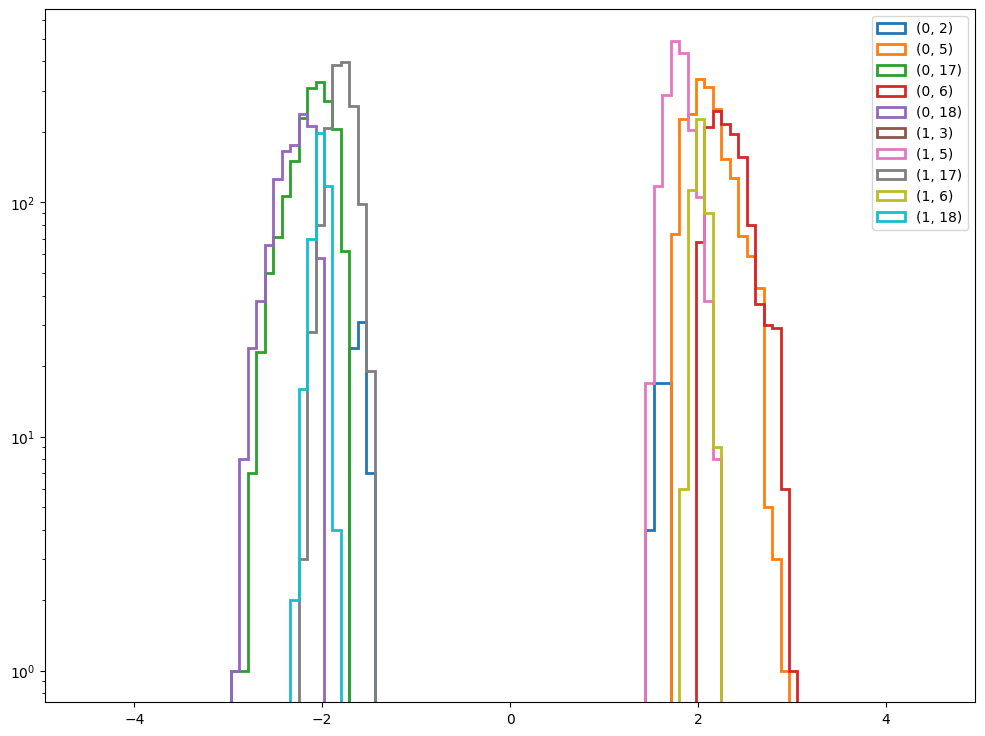

In [366]:
plt.figure()
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n < 23 or n >= 33:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.legend()
plt.figure()
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n < 23 or n >= 33:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[~matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.legend()

55it [00:00, 1507.56it/s]
55it [00:00, 1492.22it/s]


/lustre/home/adrianodif/Tools/anaconda3/envs/analysis/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


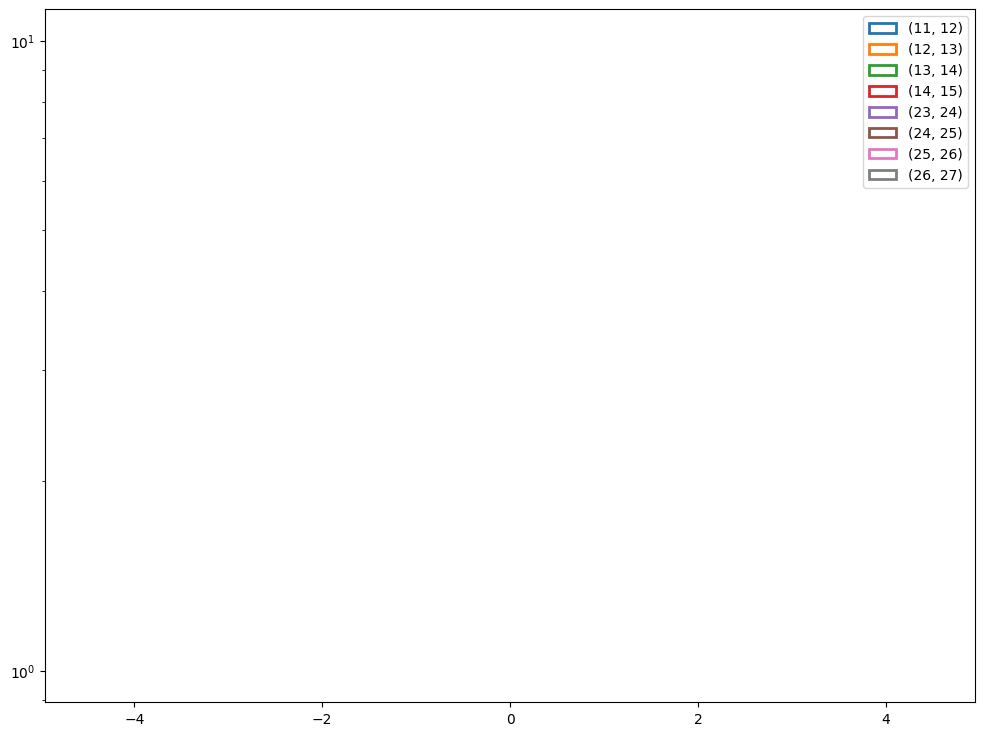

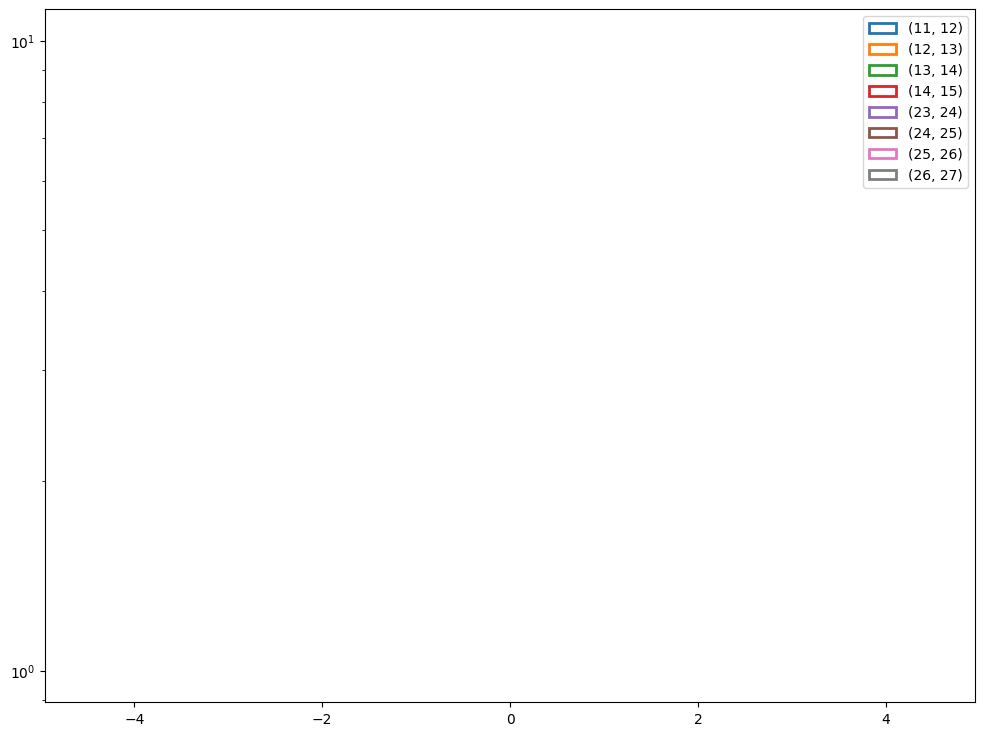

In [367]:
plt.figure()
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n < 33 or n >= 41:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.legend()
plt.figure()
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n < 33 or n >= 41:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[~matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.legend()

55it [00:00, 1083.93it/s]
55it [00:00, 1087.29it/s]


/lustre/home/adrianodif/Tools/anaconda3/envs/analysis/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


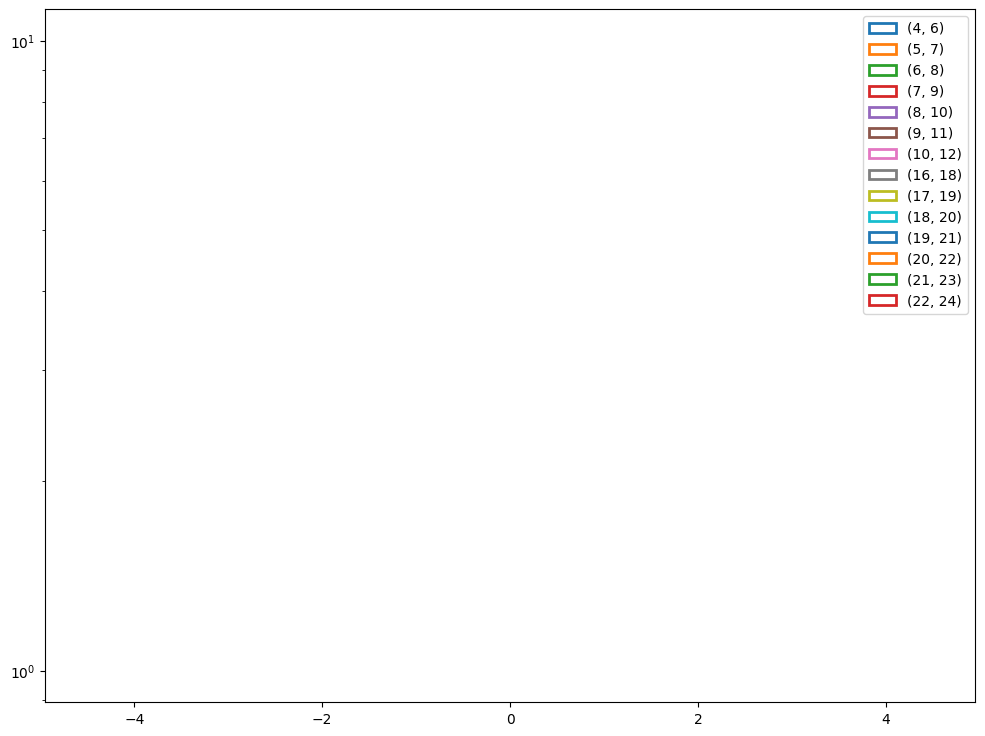

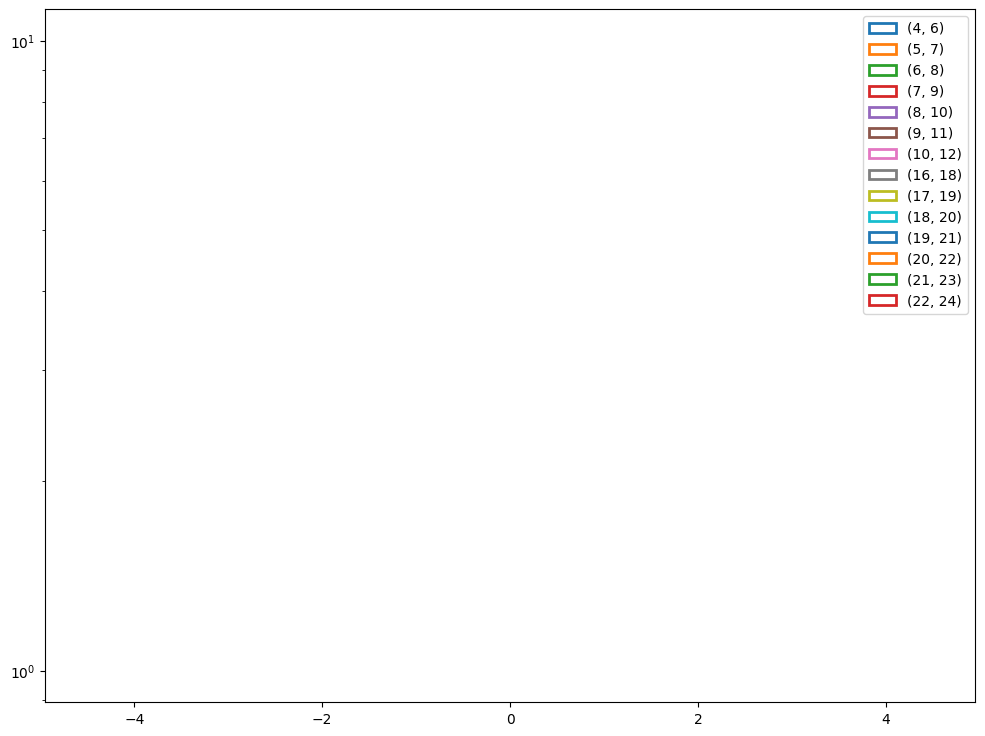

In [368]:
plt.figure()
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n < 41:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.legend()

plt.figure()
for n,i in tqdm.tqdm(enumerate(allLayerPairs)):
    if n < 41:
        continue
    thatPair = "pair_%d_used"%(n)
    cut = pixel_tracks[thatPair]>0
    #plt.hist(pixel_tracks["eta"],bins=100,range=(-4.5,4.5),log=False);
    plt.hist(pixel_tracks[~matched_tracks & cut]["eta"],bins=100,range=(-4.5,4.5),log=True, label = str(i),histtype="step",lw=2);
plt.legend()